<a href="https://colab.research.google.com/github/douglasmmachado/MedicineConsumption/blob/main/notebooks/division_approach/5_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5 - Forecasting and prediction



---



---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math as m

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,  mean_absolute_percentage_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV



df_h1_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/main/datasets/division_approach/clustered/df_h1_clustered.csv"
df_h2_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/main/datasets/division_approach/clustered/df_h2_clustered.csv"
df_h3_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/main/datasets/division_approach/clustered/df_h3_clustered.csv"
df_h4_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/main/datasets/division_approach/clustered/df_h4_clustered.csv"

df_h1 = pd.read_csv(df_h1_url)
df_h2 = pd.read_csv(df_h2_url)
df_h3 = pd.read_csv(df_h3_url)
df_h4 = pd.read_csv(df_h4_url)

medicines = [3400892088310,3400892075761,3400892203645,
             3400892065366,3400892052120,3400891996128,
             3400893826706,3400893736135,3400893875490,
             3400890837149,3400891235203,3400891225037,
             3400891191226,3400892729589,3400892745848,
             3400892697789,3400892761527,3400893022634,
             3400892761695,3400892669236,3400892508566]

In [ ]:
df_h1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HOSPI_CODE_UCD     1208 non-null   int64  
 1   LIT_HC             1208 non-null   float64
 2   LIT_HP             1208 non-null   float64
 3   N_UFS              1208 non-null   float64
 4   PN_MEDICAL         1208 non-null   float64
 5   POPULATION         1208 non-null   float64
 6   P_MEDICAL          1208 non-null   float64
 7   QUANTITY           1208 non-null   float64
 8   QUANTITY_MA        1208 non-null   float64
 9   SEJ_MCO            1208 non-null   float64
 10  SEJ_SLD            1208 non-null   float64
 11  SEJ_SSR            1208 non-null   float64
 12  YEAR               1208 non-null   float64
 13  MONTH_1.0          1208 non-null   int64  
 14  MONTH_2.0          1208 non-null   int64  
 15  MONTH_3.0          1208 non-null   int64  
 16  MONTH_4.0          1208 

In [ ]:
df_h2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HOSPI_CODE_UCD     697 non-null    int64  
 1   LIT_HC             697 non-null    float64
 2   LIT_HP             697 non-null    float64
 3   N_UFS              697 non-null    float64
 4   PN_MEDICAL         697 non-null    float64
 5   POPULATION         697 non-null    float64
 6   P_MEDICAL          697 non-null    float64
 7   QUANTITY           697 non-null    float64
 8   QUANTITY_MA        697 non-null    float64
 9   SEJ_MCO            697 non-null    float64
 10  SEJ_PSY            697 non-null    float64
 11  SEJ_SSR            697 non-null    float64
 12  YEAR               697 non-null    float64
 13  MONTH_1.0          697 non-null    int64  
 14  MONTH_2.0          697 non-null    int64  
 15  MONTH_3.0          697 non-null    int64  
 16  MONTH_4.0          697 non

In [ ]:
df_h3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HOSPI_CODE_UCD     1397 non-null   int64  
 1   LIT_HC             1397 non-null   float64
 2   LIT_HP             1397 non-null   float64
 3   N_UFS              1397 non-null   float64
 4   PN_MEDICAL         1397 non-null   float64
 5   POPULATION         1397 non-null   float64
 6   P_MEDICAL          1397 non-null   float64
 7   QUANTITY           1397 non-null   float64
 8   QUANTITY_MA        1397 non-null   float64
 9   SEJ_HAD            1397 non-null   float64
 10  SEJ_MCO            1397 non-null   float64
 11  SEJ_PSY            1397 non-null   float64
 12  SEJ_SLD            1397 non-null   float64
 13  SEJ_SSR            1397 non-null   float64
 14  YEAR               1397 non-null   float64
 15  MONTH_1.0          1397 non-null   int64  
 16  MONTH_2.0          1397 

In [ ]:
df_h4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HOSPI_CODE_UCD     770 non-null    int64  
 1   LIT_HC             770 non-null    float64
 2   LIT_HP             770 non-null    float64
 3   N_UFS              770 non-null    float64
 4   PN_MEDICAL         770 non-null    float64
 5   POPULATION         770 non-null    float64
 6   P_MEDICAL          770 non-null    float64
 7   QUANTITY           770 non-null    float64
 8   QUANTITY_MA        770 non-null    float64
 9   SEJ_MCO            770 non-null    float64
 10  SEJ_PSY            770 non-null    float64
 11  SEJ_SLD            770 non-null    float64
 12  SEJ_SSR            770 non-null    float64
 13  YEAR               770 non-null    float64
 14  MONTH_1.0          770 non-null    int64  
 15  MONTH_2.0          770 non-null    int64  
 16  MONTH_3.0          770 non

## 5.1 - New database composition based on clusters

In [2]:
features = ['HOSPI_CODE_UCD', 'LIT_HC', 'LIT_HP', 'N_ETB', 'N_UFS', 'PN_MEDICAL',
       'POPULATION', 'P_MEDICAL', 'QUANTITY', 'QUANTITY_MA', 'SEJ_HAD',
       'SEJ_MCO', 'SEJ_PSY', 'SEJ_SLD', 'SEJ_SSR', 'MONTH_1.0', 'MONTH_2.0',
       'MONTH_3.0', 'MONTH_4.0', 'MONTH_5.0', 'MONTH_6.0', 'MONTH_7.0',
       'MONTH_8.0', 'MONTH_9.0', 'MONTH_10.0', 'MONTH_11.0', 'MONTH_12.0', 'CLUSTER']

In [3]:
features_h1 = list(set(features) - {"N_ETB", "SEJ_HAD", "SEJ_PSY"})
features_h2 = list(set(features) - {'SEJ_HAD', 'SEJ_SLD', 'N_ETB'})
features_h3 = list(set(features) - {'N_ETB'})
features_h4 = list(set(features) - {'SEJ_HAD', 'N_ETB'})

## Baseline for each medicine and hospital

In [25]:
def plot_pred(y_pred, y_test, medicine):
    # Plot y_pred as scatter with confidence intervals
    x = np.arange(len(y_pred))  # x-axis values
    plt.scatter(x, y_pred, label='y_pred', marker='.')

    # Plot y_test as scatter
    plt.scatter(x, y_test, label='y_test', marker='x')

    # Set labels and title
    plt.xlabel('Test samples')
    plt.ylabel('Quantity')
    plt.title(f'y_pred and y_test for medicine: {medicine}')
    plt.grid(True)

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


In [51]:
def test_1_baseline(df, medicine, df_scores):
  print()
  print(100*'-')
  print('Medicine:' + str(medicine))

  X = df[df['HOSPI_CODE_UCD'] == medicine].drop(['QUANTITY', 'HOSPI_CODE_UCD'], axis=1).values

  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  y = df[df['HOSPI_CODE_UCD'] == medicine]['QUANTITY'].values

  X_scaled, y = shuffle(X_scaled, y, random_state=42)

  if m.ceil(len(X_scaled) * 0.1) == 1:
    print('Dataset too small')
    test_size = 2
  else:
    test_size = 0.1
  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                      test_size = test_size,
                                                      random_state = 42)
  print(f'Size of data set: {len(X)}')
  print(f'Size of training set: {len(X_train)}')
  print(f'Size of test set: {len(X_test)}')

  # Define the parameter distributions for RandomizedSearchCV
  param_grid = {
      'max_depth': np.arange(2, 8, 1),
      'n_estimators': np.arange(2, max(int(m.ceil(len(X_train)*0.1)),3), 1),
      'max_features': ['sqrt', 'log2', 1]
  }
  depth_len = param_grid['max_depth'].size
  estimators_len = param_grid['n_estimators'].size

  print(f'Size of grid search: {depth_len * estimators_len}')

  # Create the RandomizedSearchCV object
  grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                             param_grid=param_grid,
                             scoring = 'r2',
                             cv = 5,
                             n_jobs = -1)

  ''' >3 : the fold and candidate parameter indexes
      are also displayed together with the starting time of the computation.
  '''
  # Fit the RandomizedSearchCV object to the data
  grid_search.fit(X_train, y_train)

  # Get the best estimator
  best_estimator = grid_search.best_estimator_

  # Make predictions using the best estimator
  y_pred = best_estimator.predict(X_test)

  # Calculate R^2 score
  r2 = r2_score(y_test, y_pred)

  # Calculate MAE
  mae = mean_absolute_error(y_test, y_pred)

  # Calculate MAPE
  mape = mean_absolute_percentage_error(y_test, y_pred)

  # Calculate RMSE
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))

  # Print the best parameters, best score, and evaluation metrics

  print(f'Datapoints in test: {len(X_test)}')
  print('Best Parameters:', grid_search.best_params_)
  print('Training Score: R^2', round(grid_search.best_score_, 3))
  print('Test score: ')
  print('R^2 Score:', round(r2, 3))
  print('MAE:', round(mae, 3))
  print('MAPE:', round(mape, 3))
  print('RMSE:', round(rmse, 3))
  print()


  # Create the new row as a DataFrame
  new_row = pd.DataFrame({'HOSPI_CODE_UCD': ['CODE_UCD_'+str(medicine)],
                          'R2': [r2],
                          'RMSE': [rmse],
                          'MAE': [mae],
                          'MAPE': [mape]})

  # Append the new row to the DataFrame
  df_scores = pd.concat([df_scores, new_row], ignore_index=True)

  # plot pred x test
  plot_pred(y_pred, y_test, medicine)
  print()

  # Return the updated DataFrame
  return df_scores



----------------------------------------------------------------------------------------------------
Medicine:3400892088310
Size of data set: 47
Size of training set: 42
Size of test set: 5
Size of grid search: 18
Datapoints in test: 5
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 4}
Training Score: R^2 0.532
Test score: 
R^2 Score: 0.768
MAE: 368.131
MAPE: 2.116
RMSE: 493.899



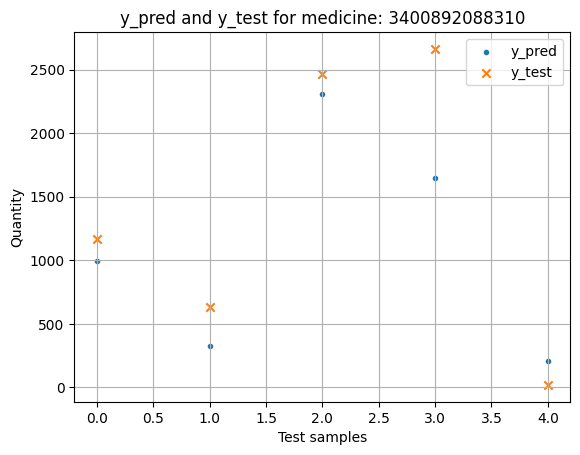



----------------------------------------------------------------------------------------------------
Medicine:3400892075761
Size of data set: 63
Size of training set: 56
Size of test set: 7
Size of grid search: 24
Datapoints in test: 7
Best Parameters: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 4}
Training Score: R^2 0.391
Test score: 
R^2 Score: 0.8
MAE: 127.785
MAPE: 0.215
RMSE: 160.913



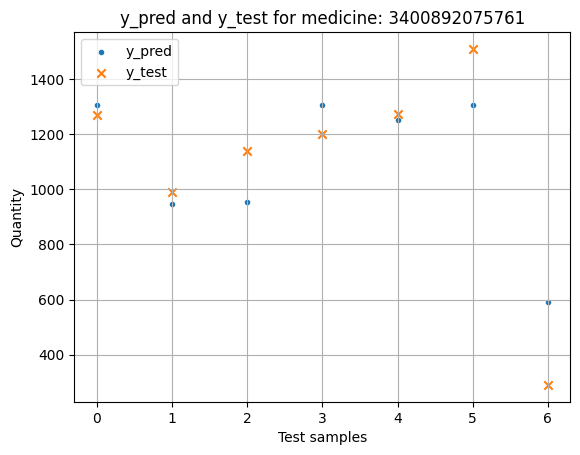



----------------------------------------------------------------------------------------------------
Medicine:3400892203645
Size of data set: 60
Size of training set: 54
Size of test set: 6
Size of grid search: 24
Datapoints in test: 6
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 5}
Training Score: R^2 0.578
Test score: 
R^2 Score: 0.939
MAE: 103.333
MAPE: 0.167
RMSE: 135.228



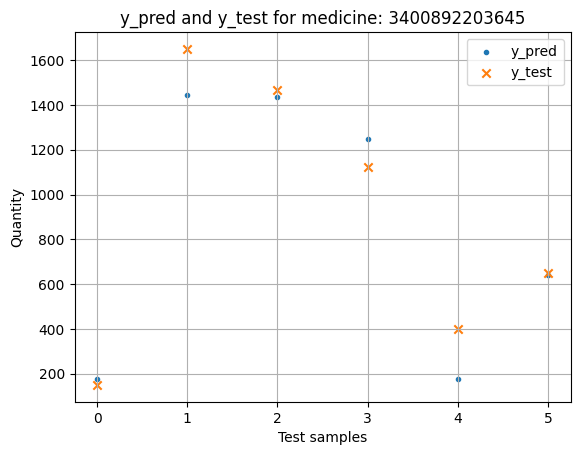



----------------------------------------------------------------------------------------------------
Medicine:3400892065366
Size of data set: 60
Size of training set: 54
Size of test set: 6
Size of grid search: 24
Datapoints in test: 6
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 5}
Training Score: R^2 0.627
Test score: 
R^2 Score: 0.742
MAE: 566.765
MAPE: 0.176
RMSE: 663.594



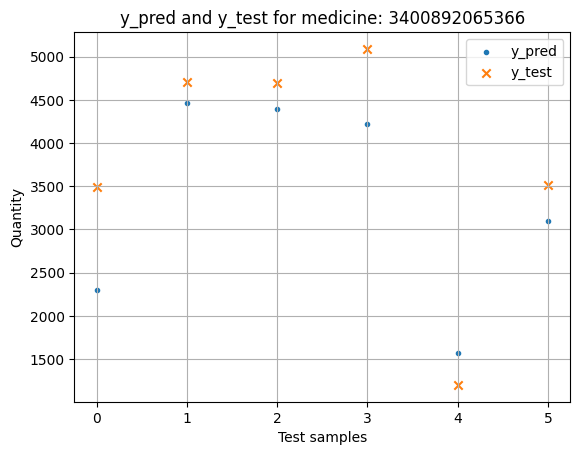



----------------------------------------------------------------------------------------------------
Medicine:3400892052120
Size of data set: 54
Size of training set: 48
Size of test set: 6
Size of grid search: 18
Datapoints in test: 6
Best Parameters: {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 4}
Training Score: R^2 0.048
Test score: 
R^2 Score: -0.131
MAE: 411.106
MAPE: 0.154
RMSE: 498.508



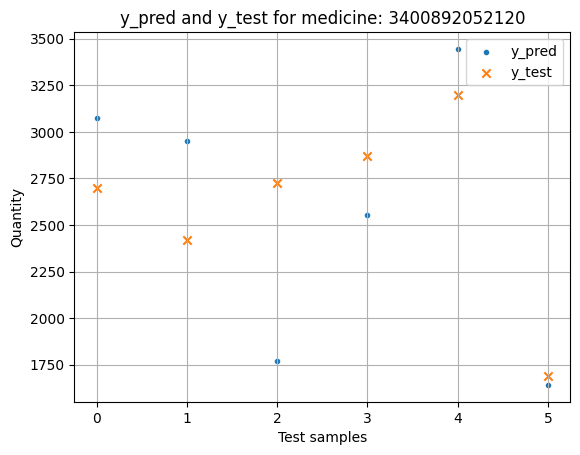



----------------------------------------------------------------------------------------------------
Medicine:3400891996128
Size of data set: 64
Size of training set: 57
Size of test set: 7
Size of grid search: 24
Datapoints in test: 7
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 5}
Training Score: R^2 0.859
Test score: 
R^2 Score: 0.956
MAE: 3522.346
MAPE: 0.154
RMSE: 3992.544



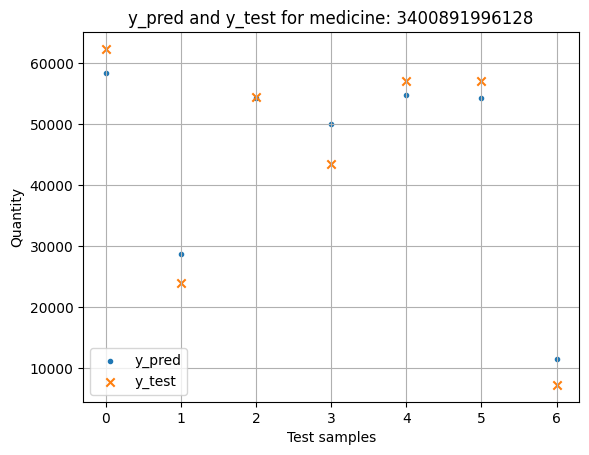



----------------------------------------------------------------------------------------------------
Medicine:3400893826706
Size of data set: 60
Size of training set: 54
Size of test set: 6
Size of grid search: 24
Datapoints in test: 6
Best Parameters: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 5}
Training Score: R^2 0.479
Test score: 
R^2 Score: 0.939
MAE: 330.925
MAPE: 5.559
RMSE: 373.648



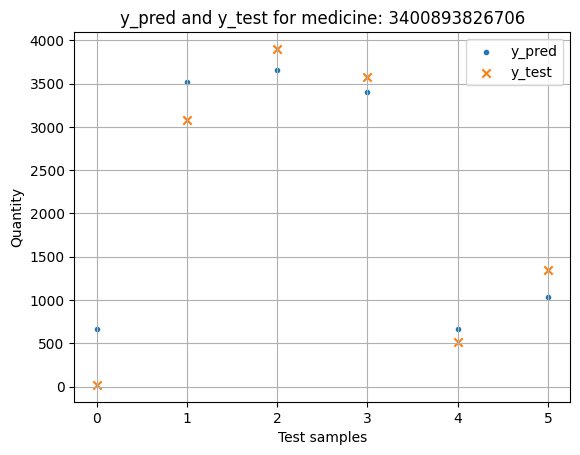



----------------------------------------------------------------------------------------------------
Medicine:3400893736135
Size of data set: 59
Size of training set: 53
Size of test set: 6
Size of grid search: 24
Datapoints in test: 6
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 4}
Training Score: R^2 0.682
Test score: 
R^2 Score: 0.916
MAE: 231.556
MAPE: 1.015
RMSE: 260.626



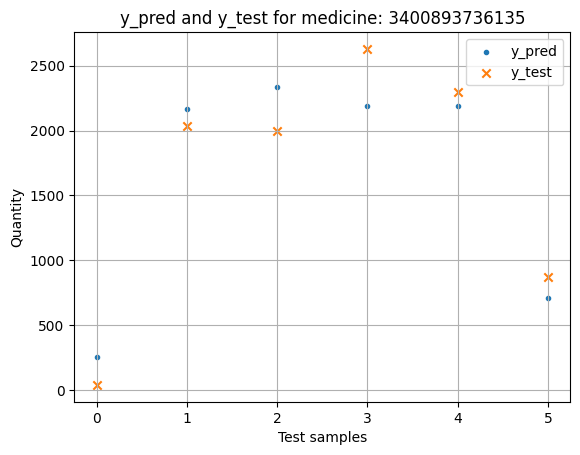



----------------------------------------------------------------------------------------------------
Medicine:3400893875490
Size of data set: 60
Size of training set: 54
Size of test set: 6
Size of grid search: 24
Datapoints in test: 6
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 4}
Training Score: R^2 0.635
Test score: 
R^2 Score: 0.954
MAE: 680.42
MAPE: 1.987
RMSE: 802.532



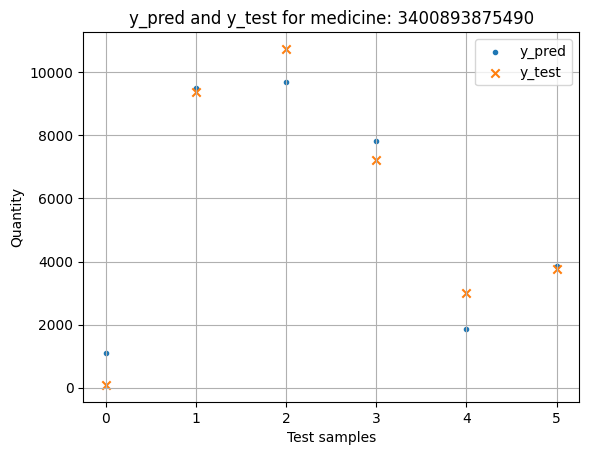



----------------------------------------------------------------------------------------------------
Medicine:3400890837149
Size of data set: 66
Size of training set: 59
Size of test set: 7
Size of grid search: 24
Datapoints in test: 7
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 5}
Training Score: R^2 0.767
Test score: 
R^2 Score: 0.896
MAE: 297.6
MAPE: 0.982
RMSE: 342.676



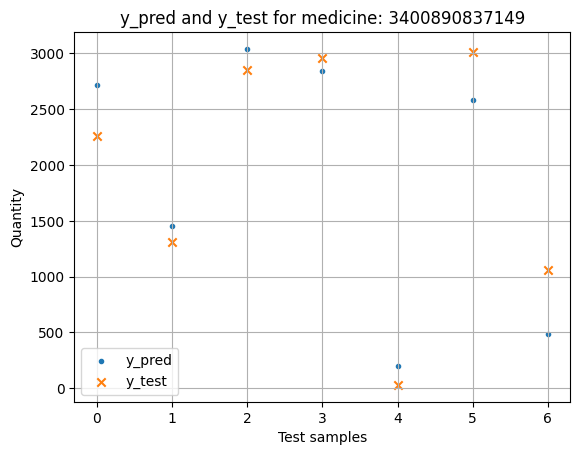



----------------------------------------------------------------------------------------------------
Medicine:3400891235203
Size of data set: 56
Size of training set: 50
Size of test set: 6
Size of grid search: 18
Datapoints in test: 6
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 4}
Training Score: R^2 0.508
Test score: 
R^2 Score: -0.168
MAE: 333.608
MAPE: 0.23
RMSE: 451.538



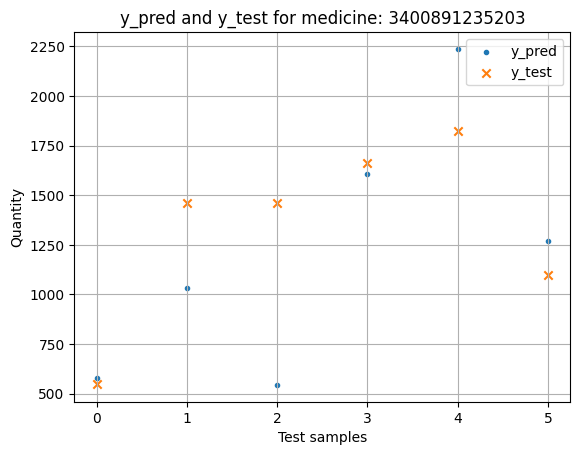



----------------------------------------------------------------------------------------------------
Medicine:3400891225037
Size of data set: 68
Size of training set: 61
Size of test set: 7
Size of grid search: 30
Datapoints in test: 7
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 6}
Training Score: R^2 0.76
Test score: 
R^2 Score: 0.693
MAE: 2324.927
MAPE: 35.886
RMSE: 3906.609



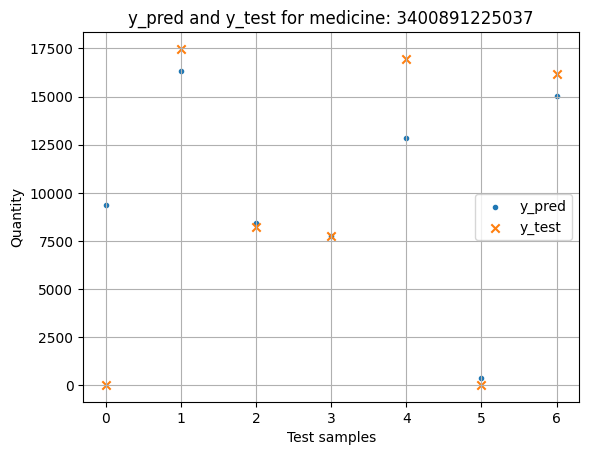



----------------------------------------------------------------------------------------------------
Medicine:3400891191226
Size of data set: 60
Size of training set: 54
Size of test set: 6
Size of grid search: 24
Datapoints in test: 6
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 5}
Training Score: R^2 0.429
Test score: 
R^2 Score: 0.289
MAE: 343.327
MAPE: 0.13
RMSE: 373.088



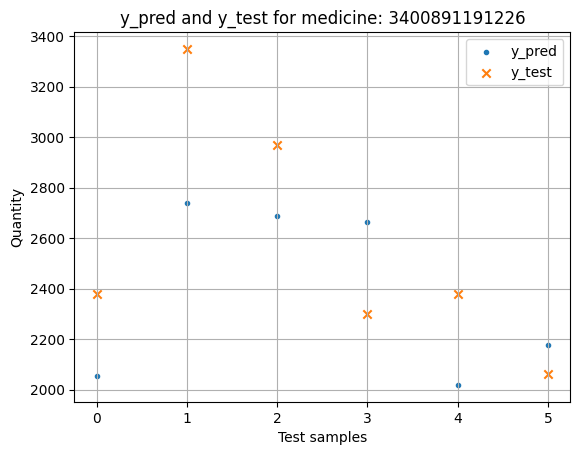



----------------------------------------------------------------------------------------------------
Medicine:3400892729589
Size of data set: 54
Size of training set: 48
Size of test set: 6
Size of grid search: 18
Datapoints in test: 6
Best Parameters: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 4}
Training Score: R^2 0.482
Test score: 
R^2 Score: 0.276
MAE: 794.943
MAPE: 0.234
RMSE: 1019.717



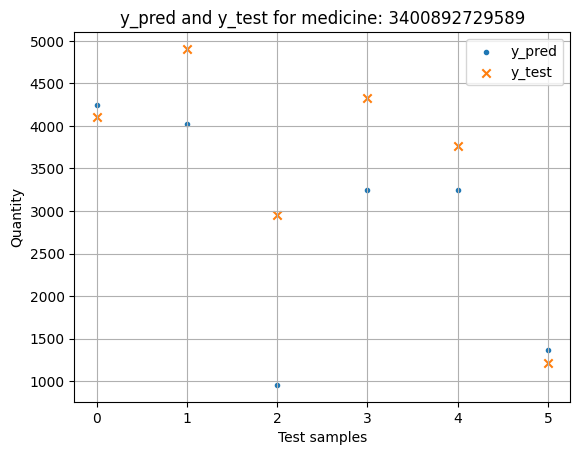



----------------------------------------------------------------------------------------------------
Medicine:3400892745848
Size of data set: 34
Size of training set: 30
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 7, 'max_features': 1, 'n_estimators': 2}
Training Score: R^2 0.154
Test score: 
R^2 Score: 0.079
MAE: 1011.2
MAPE: 0.152
RMSE: 1107.371



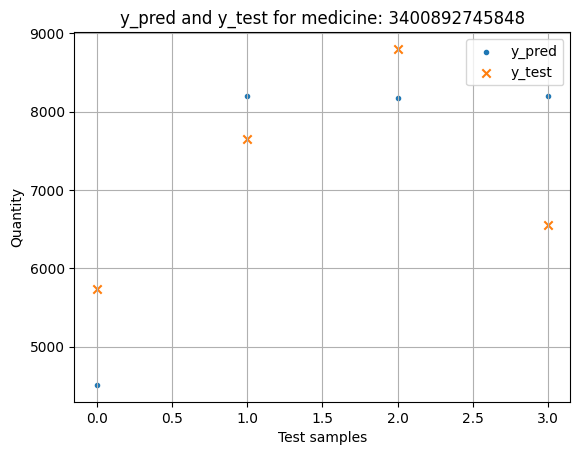



----------------------------------------------------------------------------------------------------
Medicine:3400892697789
Size of data set: 63
Size of training set: 56
Size of test set: 7
Size of grid search: 24
Datapoints in test: 7
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 5}
Training Score: R^2 0.442
Test score: 
R^2 Score: -0.295
MAE: 238.608
MAPE: 6.374
RMSE: 452.36



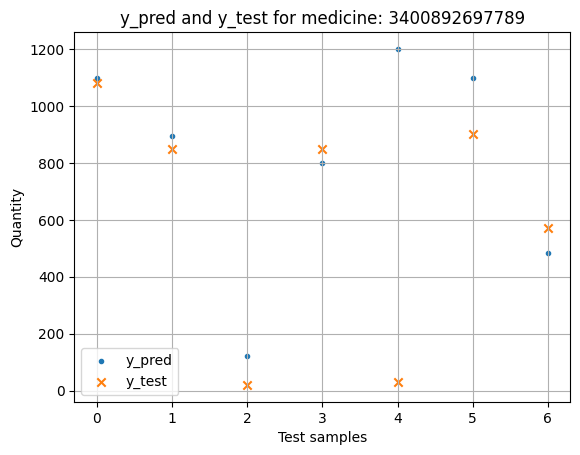



----------------------------------------------------------------------------------------------------
Medicine:3400892761527
Size of data set: 59
Size of training set: 53
Size of test set: 6
Size of grid search: 24
Datapoints in test: 6
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 4}
Training Score: R^2 0.666
Test score: 
R^2 Score: 0.791
MAE: 818.079
MAPE: 3.471
RMSE: 899.307



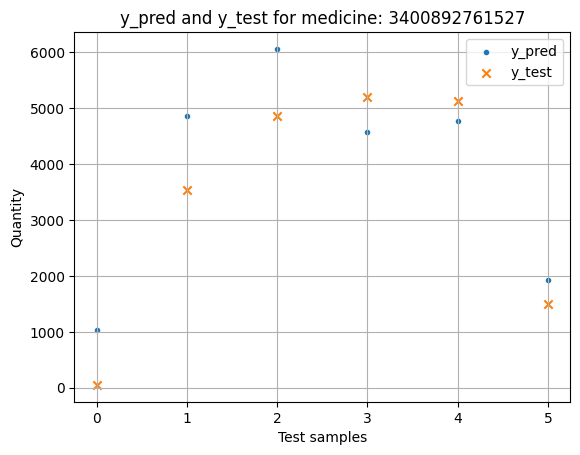



----------------------------------------------------------------------------------------------------
Medicine:3400893022634
Size of data set: 68
Size of training set: 61
Size of test set: 7
Size of grid search: 30
Datapoints in test: 7
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 6}
Training Score: R^2 0.817
Test score: 
R^2 Score: 0.784
MAE: 497.24
MAPE: 8.512
RMSE: 609.172



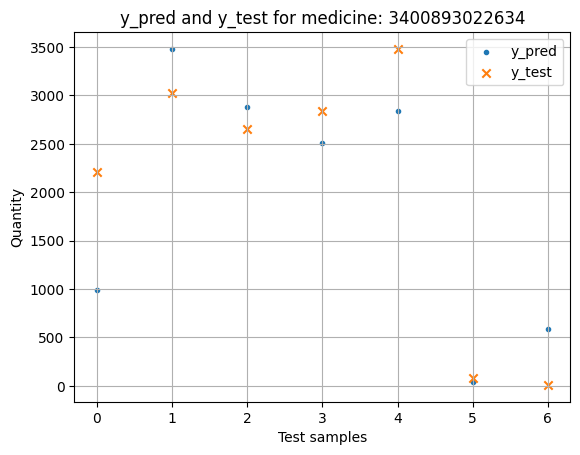



----------------------------------------------------------------------------------------------------
Medicine:3400892761695
Size of data set: 60
Size of training set: 54
Size of test set: 6
Size of grid search: 24
Datapoints in test: 6
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 4}
Training Score: R^2 0.117
Test score: 
R^2 Score: -0.552
MAE: 203.848
MAPE: 0.118
RMSE: 224.801



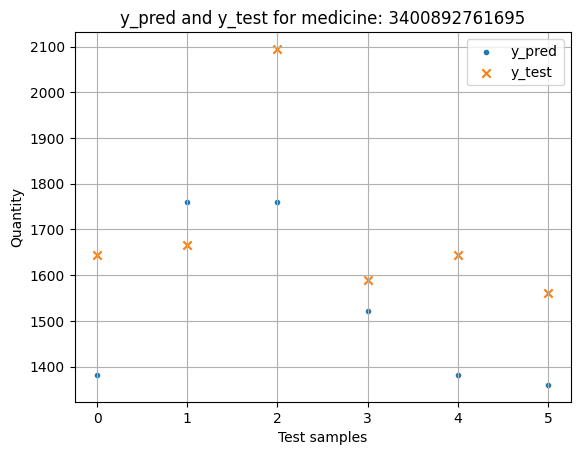



----------------------------------------------------------------------------------------------------
Medicine:3400892669236
Size of data set: 33
Size of training set: 29
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 2}
Training Score: R^2 0.594
Test score: 
R^2 Score: 0.784
MAE: 1177.083
MAPE: 0.346
RMSE: 1752.956



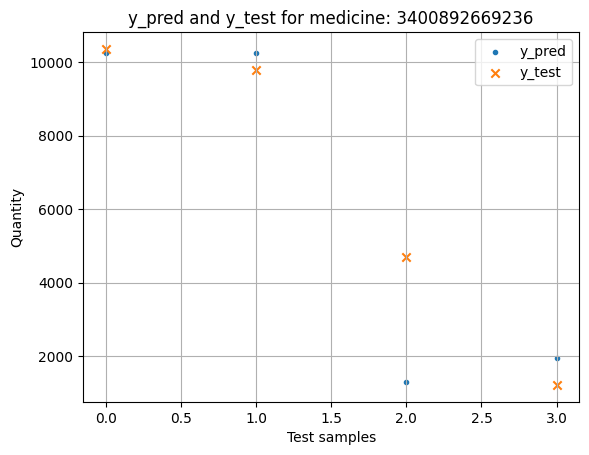



----------------------------------------------------------------------------------------------------
Medicine:3400892508566
Size of data set: 60
Size of training set: 54
Size of test set: 6
Size of grid search: 24
Datapoints in test: 6
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 5}
Training Score: R^2 0.674
Test score: 
R^2 Score: 0.733
MAE: 642.189
MAPE: 0.567
RMSE: 708.768



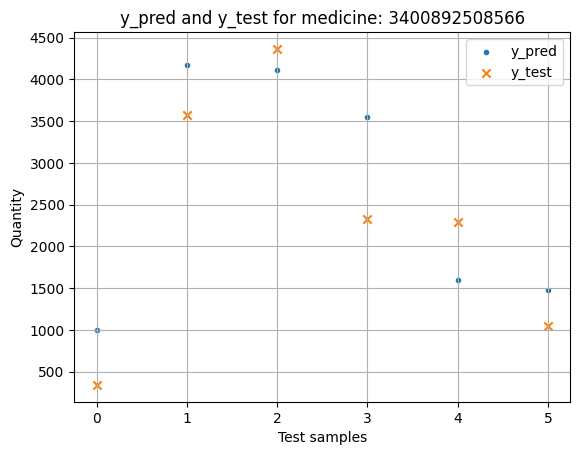

HOSPI_CODE_UCD        R2         RMSE          MAE       MAPE
0   CODE_UCD_3400892088310  0.768337   493.898922   368.130833   2.115634
1   CODE_UCD_3400892075761  0.800239   160.912847   127.785410   0.215440
2   CODE_UCD_3400892203645  0.939283   135.228475   103.333344   0.167467
3   CODE_UCD_3400892065366  0.741711   663.593674   566.764834   0.176347
4   CODE_UCD_3400892052120 -0.130641   498.507628   411.105655   0.153824
5   CODE_UCD_3400891996128  0.956140  3992.543554  3522.346349   0.154469
6   CODE_UCD_3400893826706  0.939175   373.648274   330.925238   5.558809
7   CODE_UCD_3400893736135  0.915890   260.626493   231.555952   1.014686
8   CODE_UCD_3400893875490  0.953878   802.532404   680.419511   1.987416
9   CODE_UCD_3400890837149  0.896394   342.675917   297.599729   0.981991
10  CODE_UCD_3400891235203 -0.168267   451.537971   333.607955   0.229937
11  CODE_UCD_3400891225037  0.693057  3906.608621  2324.927305  35.885568
12  CODE_UCD_3400891191226  0.288801   373.087594   343.326587   0.130103
13  CODE_UCD_3400892729589  0.275805  1019.717011   794.943149   0.234057
14  CODE_UCD_3400892745848  0.079251  1107.370785  1011.200000   0.151921
15  CODE_UCD_3400892697789 -0.294924   452.360148   238.607619   6.374097
16  CODE_UCD_3400892761527  0.790844   899.306543   818.078901   3.471251
17  CODE_UCD_3400893022634  0.784173   609.172244   497.240410   8.511802
18  CODE_UCD_3400892761695 -0.551934   224.801012   203.848153   0.117934
19  CODE_UCD_3400892669236  0.784180  1752.956191  1177.083333   0.346132
20  CODE_UCD_3400892508566  0.733269   708.767909   642.188611   0.567047

In [47]:
df_prediction_scores_h1 = pd.DataFrame(columns=['HOSPI_CODE_UCD', 'R2', 'RMSE', 'MAE', 'MAPE'])

for medicine in medicines:

  df_prediction_scores_h1 = test_1_baseline(df_h1[features_h1], medicine, df_prediction_scores_h1)

df_prediction_scores_h1


----------------------------------------------------------------------------------------------------
Medicine:3400892088310
Size of data set: 34
Size of training set: 30
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 2}
Training Score: R^2 0.105
Test score: 
R^2 Score: 0.666
MAE: 110.502
MAPE: 0.04
RMSE: 135.459



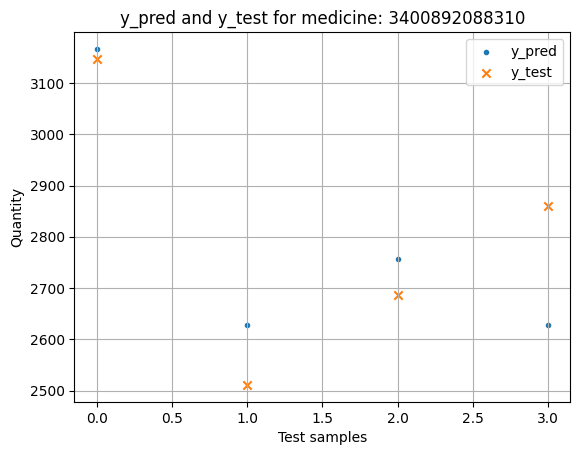



----------------------------------------------------------------------------------------------------
Medicine:3400892075761
Size of data set: 34
Size of training set: 30
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 2}
Training Score: R^2 -0.375
Test score: 
R^2 Score: -0.397
MAE: 218.656
MAPE: 0.091
RMSE: 304.468



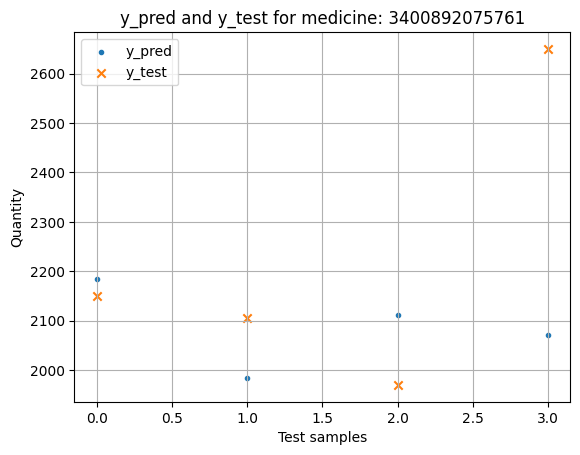



----------------------------------------------------------------------------------------------------
Medicine:3400892203645
Size of data set: 33
Size of training set: 29
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 3, 'max_features': 1, 'n_estimators': 2}
Training Score: R^2 -0.961
Test score: 
R^2 Score: -0.617
MAE: 185.649
MAPE: 0.061
RMSE: 247.316



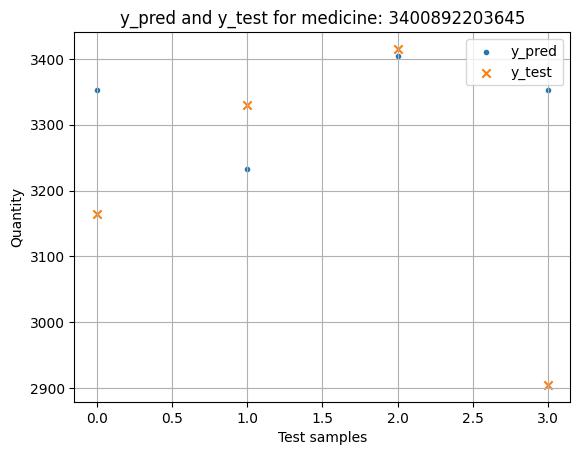



----------------------------------------------------------------------------------------------------
Medicine:3400892065366
Size of data set: 34
Size of training set: 30
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 4, 'max_features': 1, 'n_estimators': 2}
Training Score: R^2 0.433
Test score: 
R^2 Score: 0.568
MAE: 1207.377
MAPE: 0.195
RMSE: 1393.718



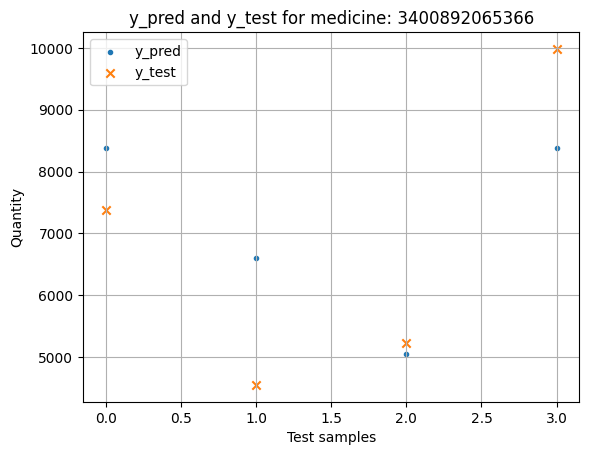



----------------------------------------------------------------------------------------------------
Medicine:3400892052120
Size of data set: 34
Size of training set: 30
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 2}
Training Score: R^2 -0.363
Test score: 
R^2 Score: -0.47
MAE: 241.172
MAPE: 0.16
RMSE: 305.868



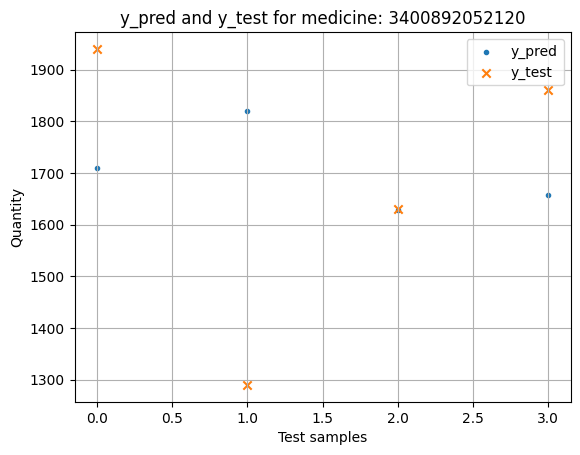



----------------------------------------------------------------------------------------------------
Medicine:3400891996128
Size of data set: 34
Size of training set: 30
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 2, 'max_features': 1, 'n_estimators': 2}
Training Score: R^2 -0.769
Test score: 
R^2 Score: -0.331
MAE: 6510.0
MAPE: 0.089
RMSE: 7778.574



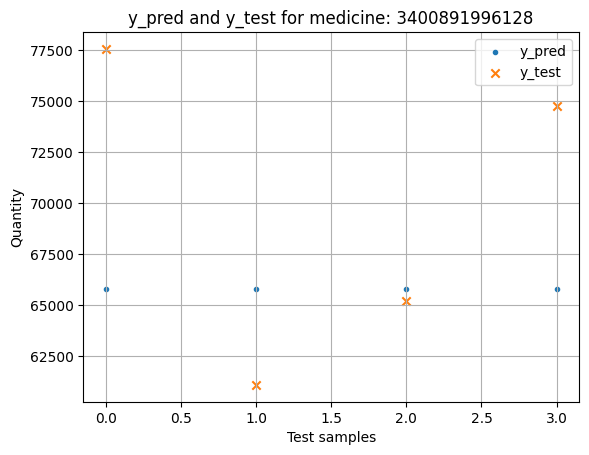



----------------------------------------------------------------------------------------------------
Medicine:3400893826706
Size of data set: 34
Size of training set: 30
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 6, 'max_features': 1, 'n_estimators': 2}
Training Score: R^2 0.127
Test score: 
R^2 Score: -0.325
MAE: 141.269
MAPE: 0.074
RMSE: 163.224



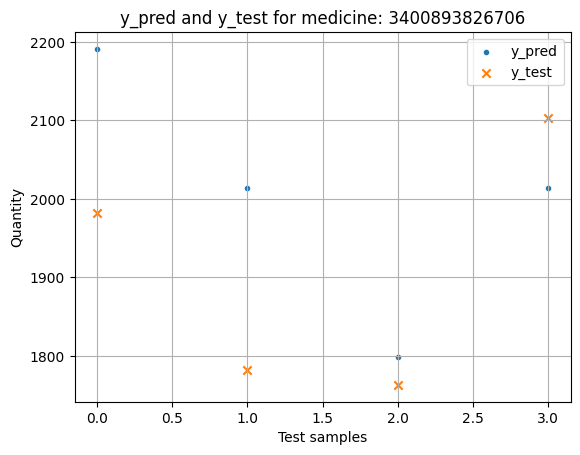



----------------------------------------------------------------------------------------------------
Medicine:3400893736135
Size of data set: 31
Size of training set: 27
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 2, 'max_features': 1, 'n_estimators': 2}
Training Score: R^2 -0.293
Test score: 
R^2 Score: -0.015
MAE: 670.0
MAPE: 0.183
RMSE: 727.843



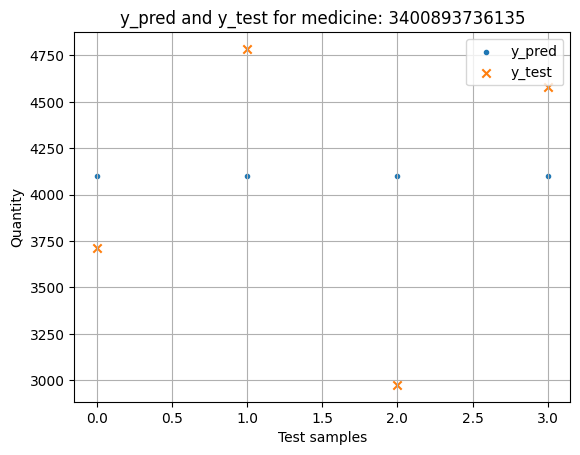



----------------------------------------------------------------------------------------------------
Medicine:3400893875490
Size of data set: 34
Size of training set: 30
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 3, 'max_features': 1, 'n_estimators': 2}
Training Score: R^2 -0.153
Test score: 
R^2 Score: -0.594
MAE: 449.5
MAPE: 0.049
RMSE: 594.403



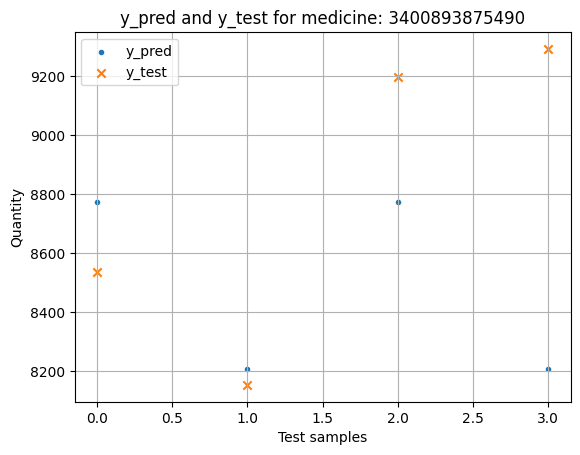



----------------------------------------------------------------------------------------------------
Medicine:3400890837149
Size of data set: 34
Size of training set: 30
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 6, 'max_features': 1, 'n_estimators': 2}
Training Score: R^2 0.112
Test score: 
R^2 Score: 0.084
MAE: 241.111
MAPE: 0.102
RMSE: 320.571



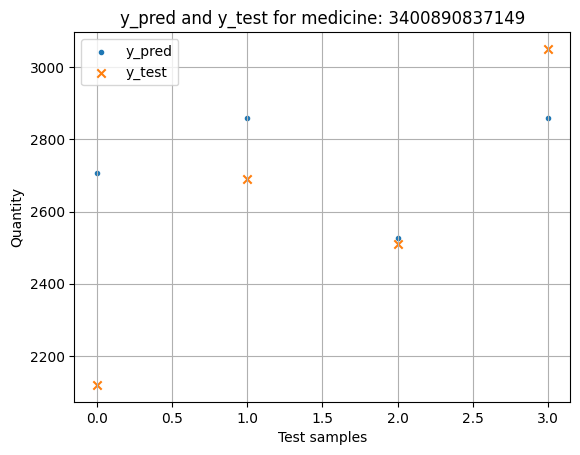



----------------------------------------------------------------------------------------------------
Medicine:3400891235203
Size of data set: 34
Size of training set: 30
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 3, 'max_features': 1, 'n_estimators': 2}
Training Score: R^2 -0.468
Test score: 
R^2 Score: -1.602
MAE: 227.834
MAPE: 0.225
RMSE: 289.921



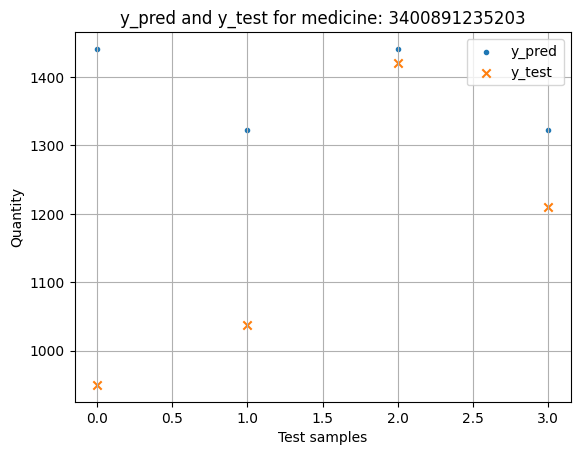



----------------------------------------------------------------------------------------------------
Medicine:3400891225037
Size of data set: 34
Size of training set: 30
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 4, 'max_features': 1, 'n_estimators': 2}
Training Score: R^2 0.121
Test score: 
R^2 Score: 0.284
MAE: 1586.92
MAPE: 0.109
RMSE: 1903.358



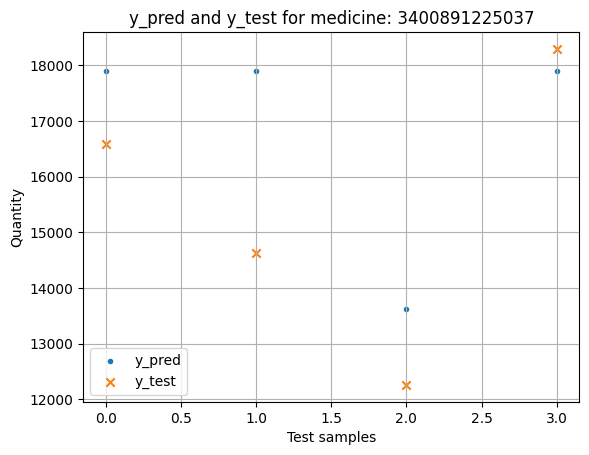



----------------------------------------------------------------------------------------------------
Medicine:3400891191226
Size of data set: 33
Size of training set: 29
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 5, 'max_features': 1, 'n_estimators': 2}
Training Score: R^2 0.252
Test score: 
R^2 Score: -0.544
MAE: 421.774
MAPE: 0.247
RMSE: 649.372



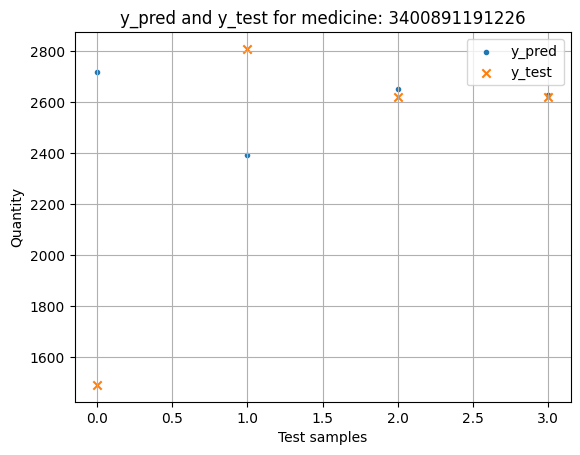



----------------------------------------------------------------------------------------------------
Medicine:3400892729589
Size of data set: 33
Size of training set: 29
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 3, 'max_features': 1, 'n_estimators': 2}
Training Score: R^2 -0.138
Test score: 
R^2 Score: -1.641
MAE: 620.462
MAPE: 0.142
RMSE: 674.757



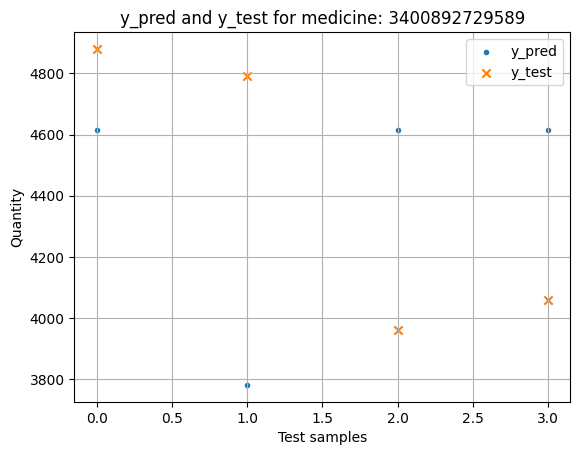



----------------------------------------------------------------------------------------------------
Medicine:3400892745848
Size of data set: 34
Size of training set: 30
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 3, 'max_features': 1, 'n_estimators': 2}
Training Score: R^2 0.113
Test score: 
R^2 Score: -0.15
MAE: 718.604
MAPE: 0.27
RMSE: 921.983



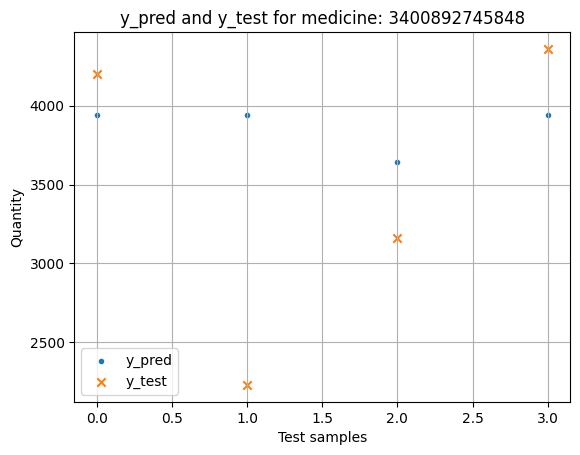



----------------------------------------------------------------------------------------------------
Medicine:3400892697789
Size of data set: 34
Size of training set: 30
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 2}
Training Score: R^2 -0.179
Test score: 
R^2 Score: 0.629
MAE: 91.875
MAPE: 0.128
RMSE: 93.215



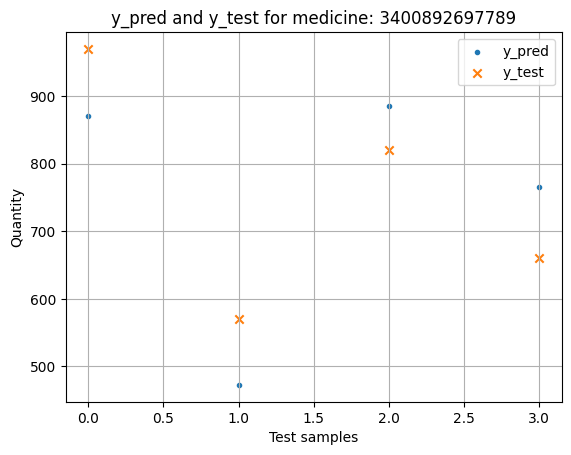



----------------------------------------------------------------------------------------------------
Medicine:3400892761527
Size of data set: 34
Size of training set: 30
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 5, 'max_features': 1, 'n_estimators': 2}
Training Score: R^2 -0.141
Test score: 
R^2 Score: -4.009
MAE: 1246.6
MAPE: 0.116
RMSE: 1405.785



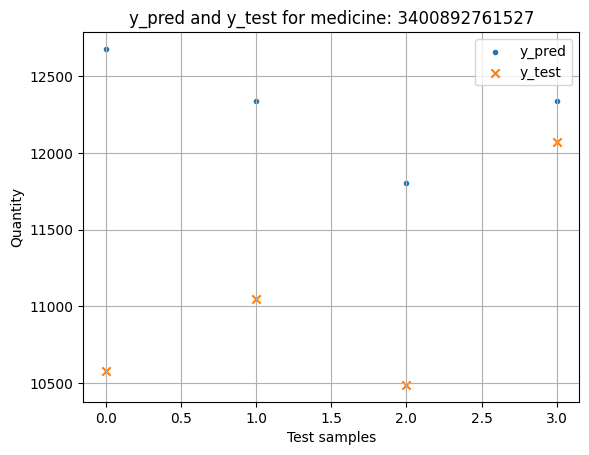



----------------------------------------------------------------------------------------------------
Medicine:3400893022634
Size of data set: 34
Size of training set: 30
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 6, 'max_features': 1, 'n_estimators': 2}
Training Score: R^2 -0.032
Test score: 
R^2 Score: -0.657
MAE: 368.008
MAPE: 0.07
RMSE: 386.846



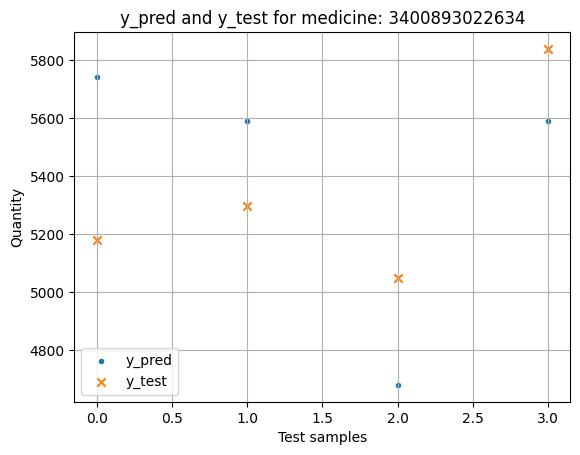



----------------------------------------------------------------------------------------------------
Medicine:3400892761695
Size of data set: 34
Size of training set: 30
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 3, 'max_features': 1, 'n_estimators': 2}
Training Score: R^2 -0.648
Test score: 
R^2 Score: -1.087
MAE: 1214.872
MAPE: 0.09
RMSE: 1579.835



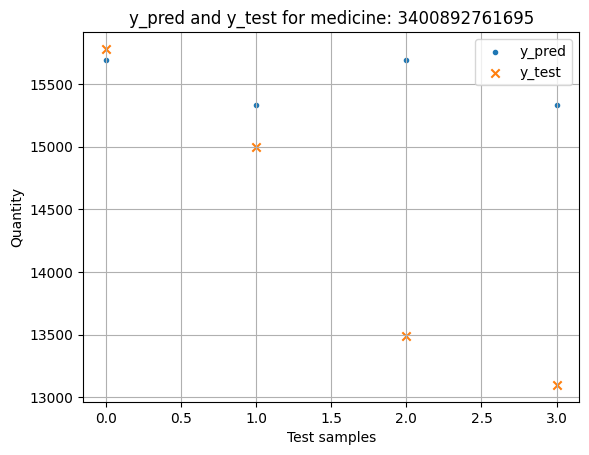



----------------------------------------------------------------------------------------------------
Medicine:3400892669236
Size of data set: 34
Size of training set: 30
Size of test set: 4
Size of grid search: 6
Datapoints in test: 4
Best Parameters: {'max_depth': 3, 'max_features': 1, 'n_estimators': 2}
Training Score: R^2 0.147
Test score: 
R^2 Score: -0.007
MAE: 558.396
MAPE: 0.07
RMSE: 636.659



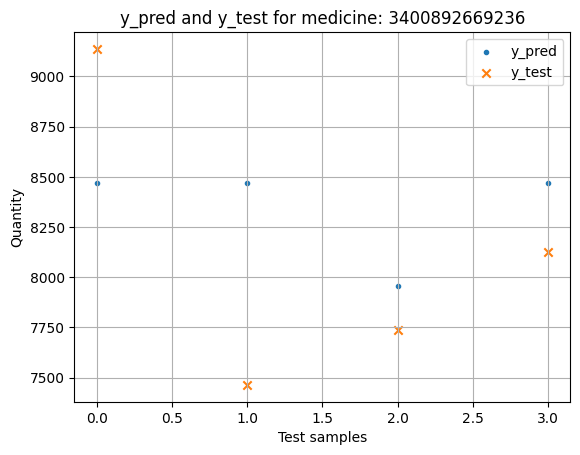



----------------------------------------------------------------------------------------------------
Medicine:3400892508566
Size of data set: 23
Size of training set: 20
Size of test set: 3
Size of grid search: 6
Datapoints in test: 3
Best Parameters: {'max_depth': 2, 'max_features': 1, 'n_estimators': 2}
Training Score: R^2 -0.326
Test score: 
R^2 Score: -1.155
MAE: 9.833
MAPE: 0.184
RMSE: 11.987



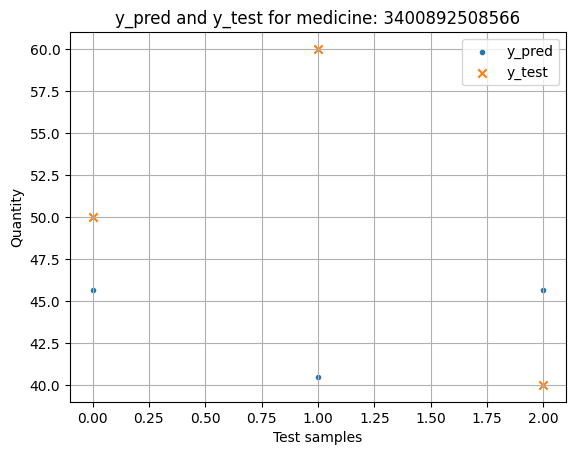

HOSPI_CODE_UCD        R2         RMSE          MAE      MAPE
0   CODE_UCD_3400892088310  0.666304   135.458852   110.502451  0.040300
1   CODE_UCD_3400892075761 -0.396523   304.467963   218.655506  0.090794
2   CODE_UCD_3400892203645 -0.616862   247.316370   185.649351  0.061375
3   CODE_UCD_3400892065366  0.567945  1393.717690  1207.376786  0.195117
4   CODE_UCD_3400892052120 -0.469842   305.868345   241.171875  0.159859
5   CODE_UCD_3400891996128 -0.330744  7778.574406  6510.000000  0.089428
6   CODE_UCD_3400893826706 -0.325462   163.224147   141.269345  0.074460
7   CODE_UCD_3400893736135 -0.015477   727.842889   670.000000  0.182913
8   CODE_UCD_3400893875490 -0.594136   594.403186   449.500000  0.049263
9   CODE_UCD_3400890837149  0.084236   320.571139   241.111111  0.102322
10  CODE_UCD_3400891235203 -1.602371   289.921498   227.834211  0.225279
11  CODE_UCD_3400891225037  0.283677  1903.357560  1586.919643  0.109050
12  CODE_UCD_3400891191226 -0.544489   649.372185   421.773810  0.247310
13  CODE_UCD_3400892729589 -1.640645   674.756720   620.461538  0.141623
14  CODE_UCD_3400892745848 -0.149701   921.983154   718.604167  0.269524
15  CODE_UCD_3400892697789  0.629069    93.215141    91.875000  0.128126
16  CODE_UCD_3400892761527 -4.008780  1405.784583  1246.599874  0.116025
17  CODE_UCD_3400893022634 -0.657184   386.845569   368.008333  0.069847
18  CODE_UCD_3400892761695 -1.087384  1579.834690  1214.871711  0.090461
19  CODE_UCD_3400892669236 -0.007185   636.659025   558.396382  0.069521
20  CODE_UCD_3400892508566 -1.155156    11.986538     9.833333  0.184375

In [48]:
df_prediction_scores_h2 = pd.DataFrame(columns=['HOSPI_CODE_UCD', 'R2', 'RMSE', 'MAE', 'MAPE'])

for medicine in medicines:

  df_prediction_scores_h2 = test_1_baseline(df_h2[features_h2], medicine, df_prediction_scores_h2)

df_prediction_scores_h2


----------------------------------------------------------------------------------------------------
Medicine:3400892088310
Size of data set: 68
Size of training set: 61
Size of test set: 7
Size of grid search: 30
Datapoints in test: 7
Best Parameters: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 3}
Training Score: R^2 0.219
Test score: 
R^2 Score: -0.825
MAE: 458.462
MAPE: 0.107
RMSE: 535.065



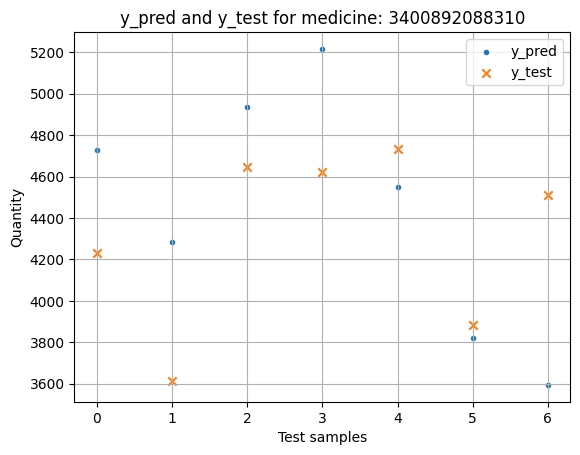



----------------------------------------------------------------------------------------------------
Medicine:3400892075761
Size of data set: 68
Size of training set: 61
Size of test set: 7
Size of grid search: 30
Datapoints in test: 7
Best Parameters: {'max_depth': 2, 'max_features': 'log2', 'n_estimators': 5}
Training Score: R^2 0.16
Test score: 
R^2 Score: 0.376
MAE: 257.374
MAPE: 0.094
RMSE: 292.445



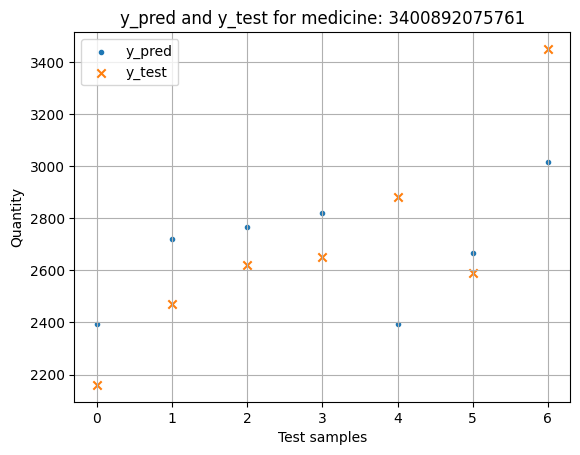



----------------------------------------------------------------------------------------------------
Medicine:3400892203645
Size of data set: 68
Size of training set: 61
Size of test set: 7
Size of grid search: 30
Datapoints in test: 7
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 5}
Training Score: R^2 0.082
Test score: 
R^2 Score: -0.89
MAE: 441.231
MAPE: 0.092
RMSE: 540.379



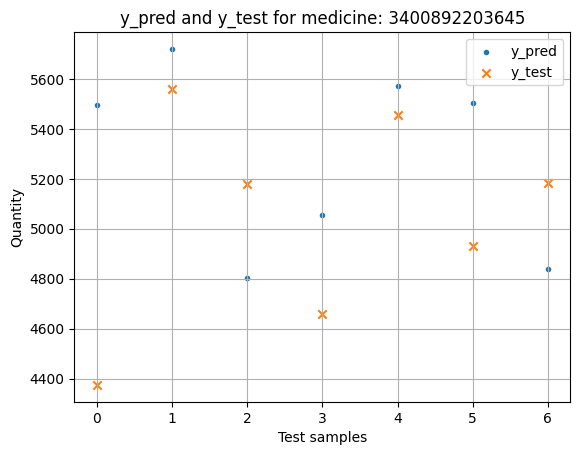



----------------------------------------------------------------------------------------------------
Medicine:3400892065366
Size of data set: 68
Size of training set: 61
Size of test set: 7
Size of grid search: 30
Datapoints in test: 7
Best Parameters: {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 3}
Training Score: R^2 0.202
Test score: 
R^2 Score: -0.066
MAE: 555.576
MAPE: 0.08
RMSE: 649.909



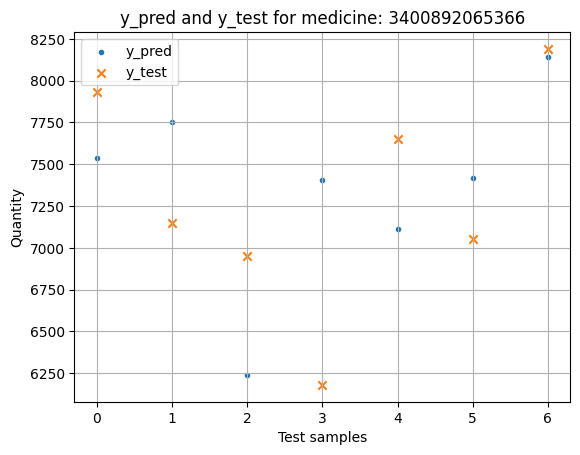



----------------------------------------------------------------------------------------------------
Medicine:3400892052120
Size of data set: 68
Size of training set: 61
Size of test set: 7
Size of grid search: 30
Datapoints in test: 7
Best Parameters: {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 6}
Training Score: R^2 0.461
Test score: 
R^2 Score: 0.747
MAE: 156.485
MAPE: 0.171
RMSE: 237.679



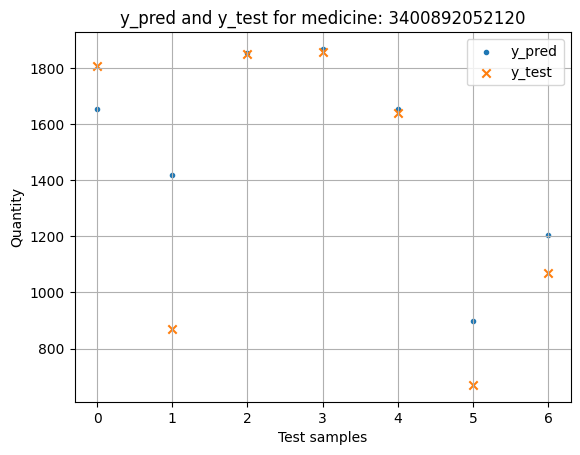



----------------------------------------------------------------------------------------------------
Medicine:3400891996128
Size of data set: 68
Size of training set: 61
Size of test set: 7
Size of grid search: 30
Datapoints in test: 7
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 5}
Training Score: R^2 0.082
Test score: 
R^2 Score: 0.152
MAE: 4690.84
MAPE: 0.046
RMSE: 4955.202



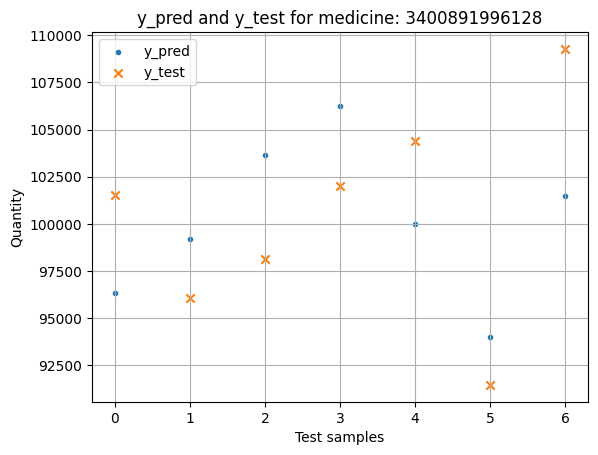



----------------------------------------------------------------------------------------------------
Medicine:3400893826706
Size of data set: 68
Size of training set: 61
Size of test set: 7
Size of grid search: 30
Datapoints in test: 7
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 4}
Training Score: R^2 0.661
Test score: 
R^2 Score: 0.206
MAE: 843.681
MAPE: 0.152
RMSE: 1200.27



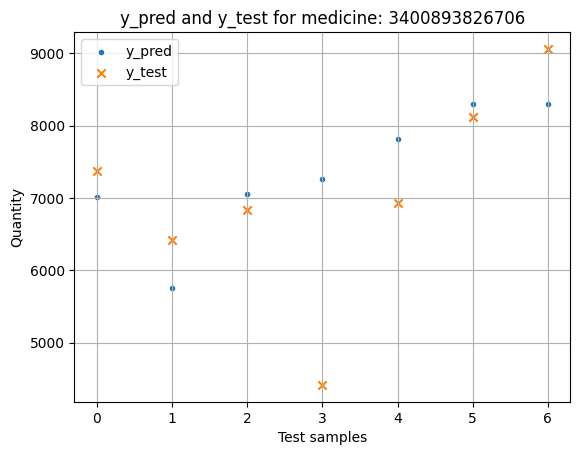



----------------------------------------------------------------------------------------------------
Medicine:3400893736135
Size of data set: 68
Size of training set: 61
Size of test set: 7
Size of grid search: 30
Datapoints in test: 7
Best Parameters: {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 4}
Training Score: R^2 0.29
Test score: 
R^2 Score: -7.932
MAE: 631.641
MAPE: 0.136
RMSE: 715.679



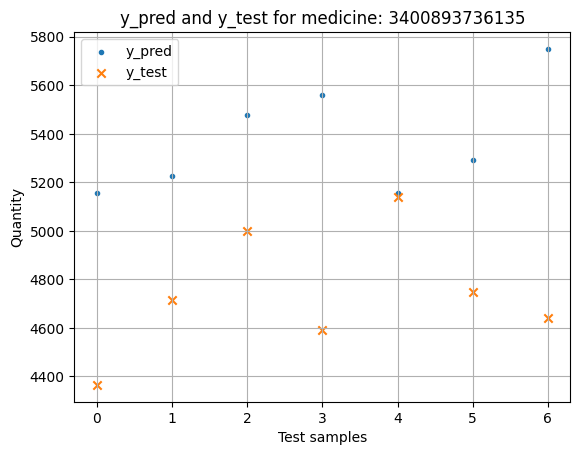



----------------------------------------------------------------------------------------------------
Medicine:3400893875490
Size of data set: 68
Size of training set: 61
Size of test set: 7
Size of grid search: 30
Datapoints in test: 7
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 6}
Training Score: R^2 0.152
Test score: 
R^2 Score: 0.46
MAE: 493.467
MAPE: 0.037
RMSE: 508.524



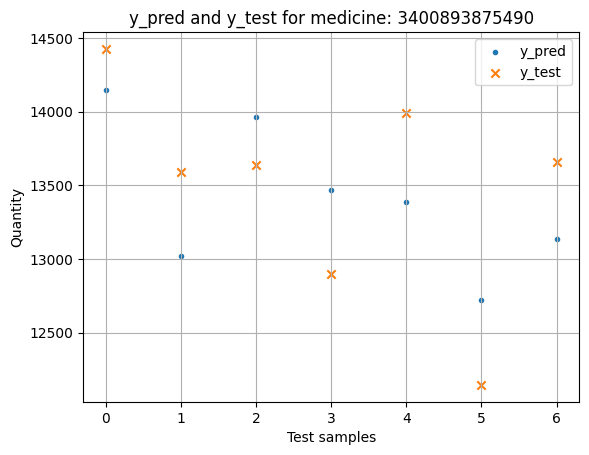



----------------------------------------------------------------------------------------------------
Medicine:3400890837149
Size of data set: 68
Size of training set: 61
Size of test set: 7
Size of grid search: 30
Datapoints in test: 7
Best Parameters: {'max_depth': 2, 'max_features': 'log2', 'n_estimators': 6}
Training Score: R^2 -0.001
Test score: 
R^2 Score: 0.087
MAE: 279.156
MAPE: 0.076
RMSE: 349.365



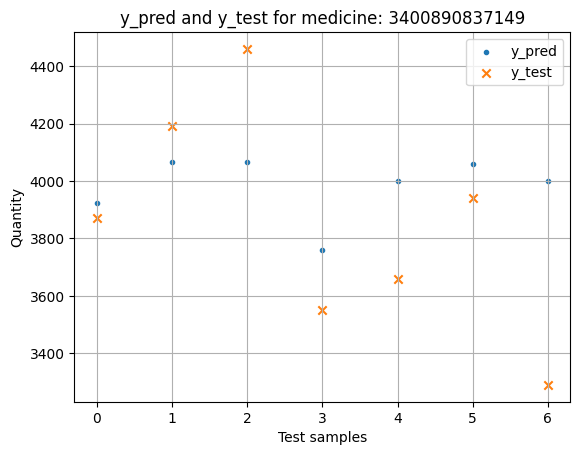



----------------------------------------------------------------------------------------------------
Medicine:3400891235203
Size of data set: 59
Size of training set: 53
Size of test set: 6
Size of grid search: 24
Datapoints in test: 6
Best Parameters: {'max_depth': 4, 'max_features': 'log2', 'n_estimators': 4}
Training Score: R^2 0.887
Test score: 
R^2 Score: 0.651
MAE: 713.461
MAPE: 0.395
RMSE: 958.553



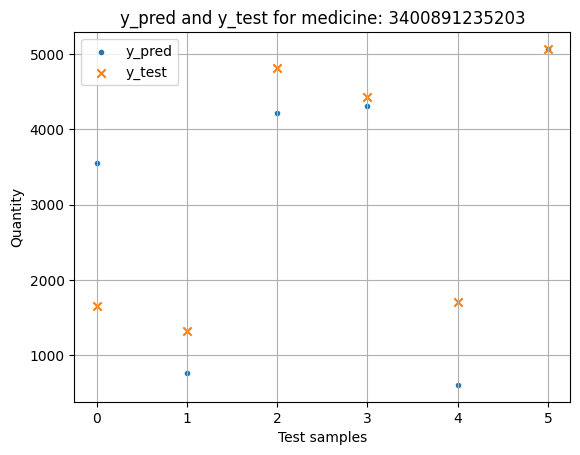



----------------------------------------------------------------------------------------------------
Medicine:3400891225037
Size of data set: 68
Size of training set: 61
Size of test set: 7
Size of grid search: 30
Datapoints in test: 7
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 4}
Training Score: R^2 0.659
Test score: 
R^2 Score: 0.945
MAE: 380.042
MAPE: 0.036
RMSE: 455.298



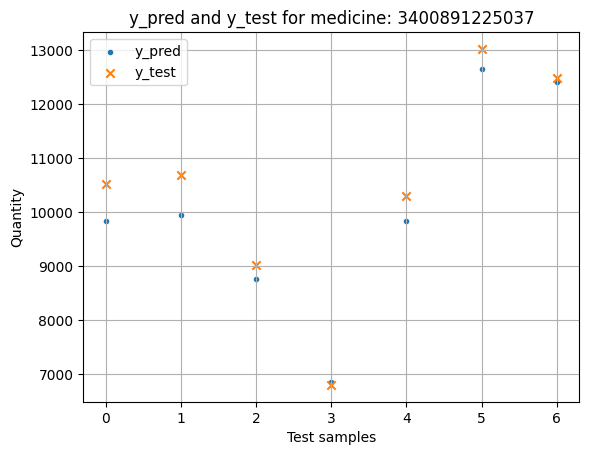



----------------------------------------------------------------------------------------------------
Medicine:3400891191226
Size of data set: 68
Size of training set: 61
Size of test set: 7
Size of grid search: 30
Datapoints in test: 7
Best Parameters: {'max_depth': 6, 'max_features': 'log2', 'n_estimators': 6}
Training Score: R^2 0.314
Test score: 
R^2 Score: -0.002
MAE: 664.4
MAPE: 0.11
RMSE: 877.313



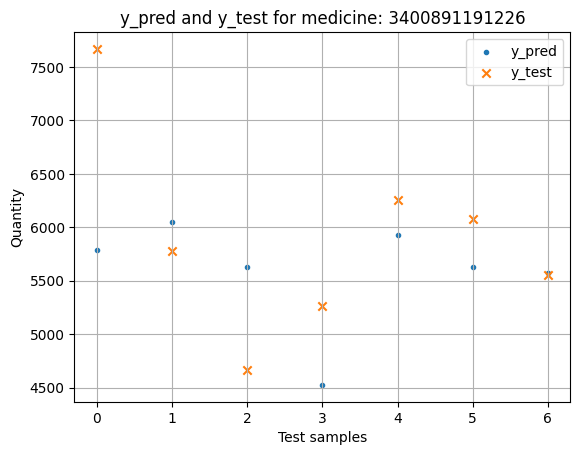



----------------------------------------------------------------------------------------------------
Medicine:3400892729589
Size of data set: 68
Size of training set: 61
Size of test set: 7
Size of grid search: 30
Datapoints in test: 7
Best Parameters: {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 5}
Training Score: R^2 0.327
Test score: 
R^2 Score: 0.642
MAE: 181.168
MAPE: 0.027
RMSE: 223.21



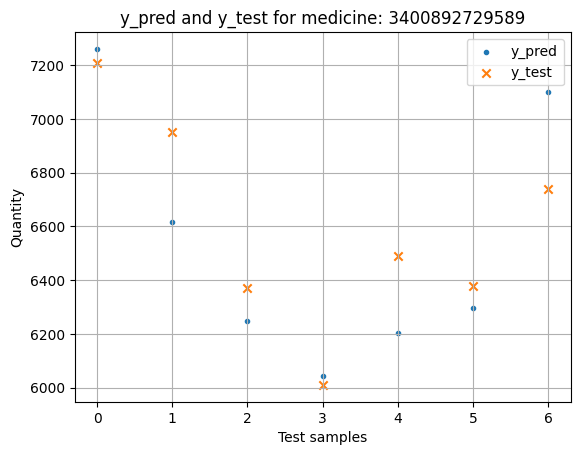



----------------------------------------------------------------------------------------------------
Medicine:3400892745848
Size of data set: 68
Size of training set: 61
Size of test set: 7
Size of grid search: 30
Datapoints in test: 7
Best Parameters: {'max_depth': 7, 'max_features': 'log2', 'n_estimators': 5}
Training Score: R^2 0.224
Test score: 
R^2 Score: 0.221
MAE: 130.802
MAPE: 0.426
RMSE: 138.185



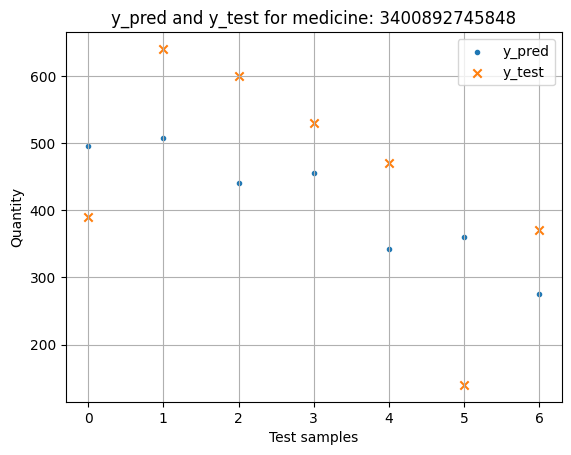



----------------------------------------------------------------------------------------------------
Medicine:3400892697789
Size of data set: 68
Size of training set: 61
Size of test set: 7
Size of grid search: 30
Datapoints in test: 7
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 6}
Training Score: R^2 0.344
Test score: 
R^2 Score: 0.456
MAE: 241.068
MAPE: 0.161
RMSE: 279.194



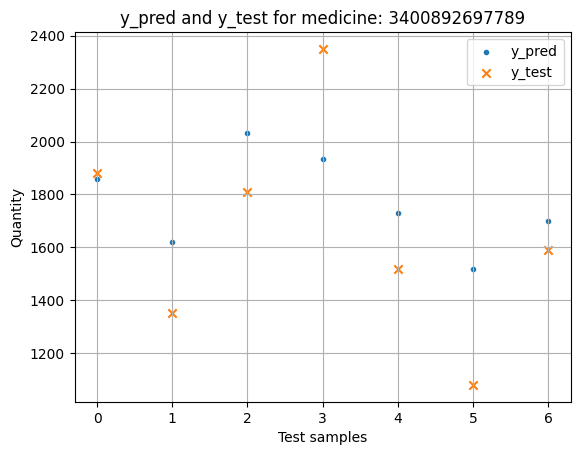



----------------------------------------------------------------------------------------------------
Medicine:3400892761527
Size of data set: 68
Size of training set: 61
Size of test set: 7
Size of grid search: 30
Datapoints in test: 7
Best Parameters: {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 6}
Training Score: R^2 0.224
Test score: 
R^2 Score: 0.132
MAE: 1555.767
MAPE: 0.05
RMSE: 2069.2



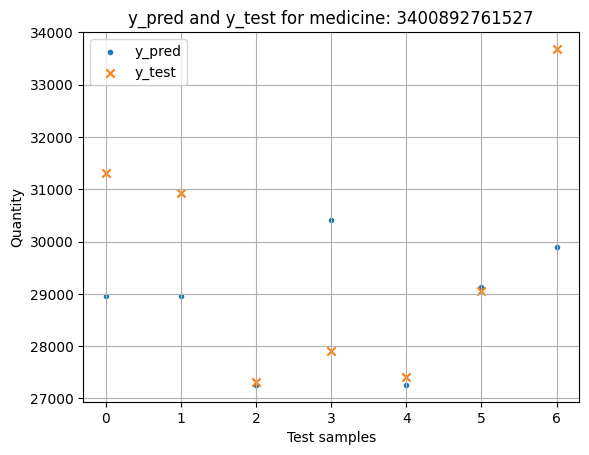



----------------------------------------------------------------------------------------------------
Medicine:3400893022634
Size of data set: 46
Size of training set: 41
Size of test set: 5
Size of grid search: 18
Datapoints in test: 5
Best Parameters: {'max_depth': 4, 'max_features': 'log2', 'n_estimators': 3}
Training Score: R^2 0.014
Test score: 
R^2 Score: 0.138
MAE: 257.373
MAPE: 0.072
RMSE: 324.137



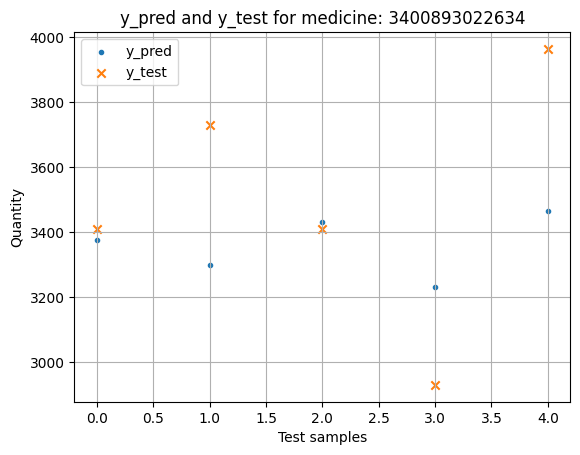



----------------------------------------------------------------------------------------------------
Medicine:3400892761695
Size of data set: 68
Size of training set: 61
Size of test set: 7
Size of grid search: 30
Datapoints in test: 7
Best Parameters: {'max_depth': 2, 'max_features': 'log2', 'n_estimators': 6}
Training Score: R^2 0.017
Test score: 
R^2 Score: 0.23
MAE: 815.452
MAPE: 0.032
RMSE: 856.998



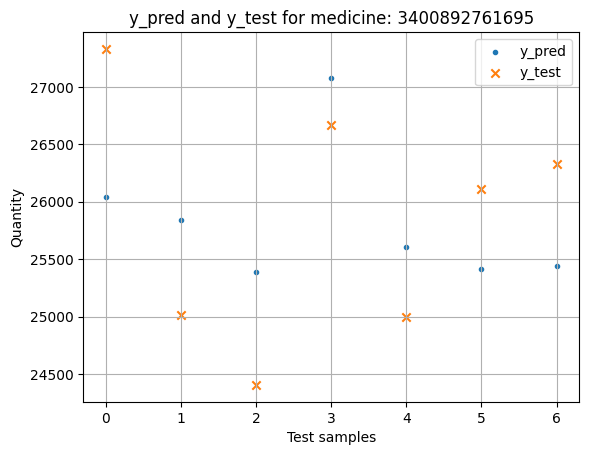



----------------------------------------------------------------------------------------------------
Medicine:3400892669236
Size of data set: 68
Size of training set: 61
Size of test set: 7
Size of grid search: 30
Datapoints in test: 7
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 6}
Training Score: R^2 0.088
Test score: 
R^2 Score: -0.113
MAE: 581.593
MAPE: 0.055
RMSE: 678.692



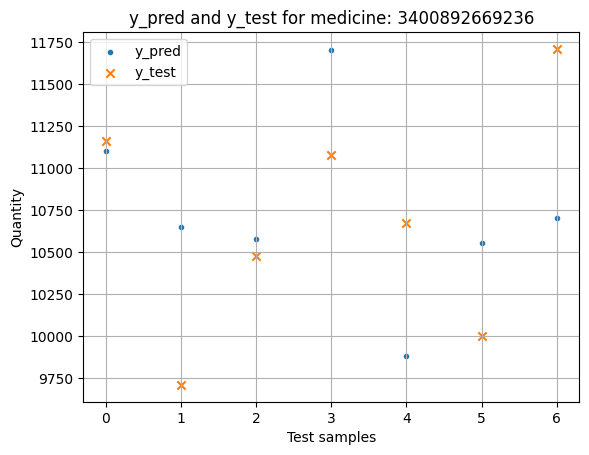



----------------------------------------------------------------------------------------------------
Medicine:3400892508566
Size of data set: 68
Size of training set: 61
Size of test set: 7
Size of grid search: 30
Datapoints in test: 7
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 6}
Training Score: R^2 0.053
Test score: 
R^2 Score: -0.365
MAE: 633.661
MAPE: 0.128
RMSE: 718.957



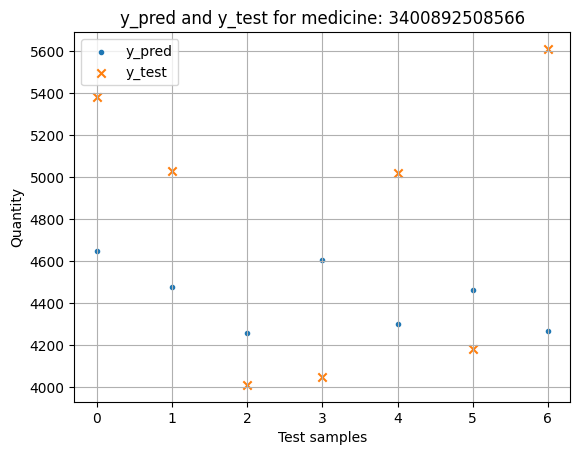

HOSPI_CODE_UCD        R2         RMSE          MAE      MAPE
0   CODE_UCD_3400892088310 -0.825105   535.065252   458.462132  0.107252
1   CODE_UCD_3400892075761  0.376053   292.445035   257.374301  0.093665
2   CODE_UCD_3400892203645 -0.890254   540.379008   441.231227  0.092417
3   CODE_UCD_3400892065366 -0.066084   649.909492   555.575714  0.080469
4   CODE_UCD_3400892052120  0.746898   237.678998   156.484880  0.171272
5   CODE_UCD_3400891996128  0.151515  4955.201551  4690.840083  0.046138
6   CODE_UCD_3400893826706  0.206137  1200.269948   843.681019  0.151602
7   CODE_UCD_3400893736135 -7.932324   715.678599   631.640885  0.136245
8   CODE_UCD_3400893875490  0.459608   508.523975   493.466898  0.036958
9   CODE_UCD_3400890837149  0.087078   349.364918   279.155831  0.075832
10  CODE_UCD_3400891235203  0.650738   958.552882   713.461302  0.394848
11  CODE_UCD_3400891225037  0.944615   455.298349   380.041667  0.035968
12  CODE_UCD_3400891191226 -0.001668   877.312695   664.399797  0.109878
13  CODE_UCD_3400892729589  0.642426   223.209576   181.168330  0.027159
14  CODE_UCD_3400892745848  0.220544   138.184923   130.802381  0.426471
15  CODE_UCD_3400892697789  0.456407   279.193512   241.068335  0.160608
16  CODE_UCD_3400892761527  0.132475  2069.199703  1555.767053  0.050142
17  CODE_UCD_3400893022634  0.137601   324.137456   257.372605  0.072126
18  CODE_UCD_3400892761695  0.229869   856.997588   815.451739  0.031553
19  CODE_UCD_3400892669236 -0.113483   678.691767   581.592800  0.054740
20  CODE_UCD_3400892508566 -0.365306   718.956978   633.660957  0.127942

In [53]:
df_prediction_scores_h3 = pd.DataFrame(columns=['HOSPI_CODE_UCD', 'R2', 'RMSE', 'MAE', 'MAPE'])

for medicine in medicines:

  df_prediction_scores_h3 = test_1_baseline(df_h3[features_h3], medicine, df_prediction_scores_h3)

df_prediction_scores_h3


----------------------------------------------------------------------------------------------------
Medicine:3400892088310
Size of data set: 22
Size of training set: 19
Size of test set: 3
Size of grid search: 6
Datapoints in test: 3
Best Parameters: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 2}
Training Score: R^2 -0.2
Test score: 
R^2 Score: 0.63
MAE: 1546.301
MAPE: 0.446
RMSE: 1721.143



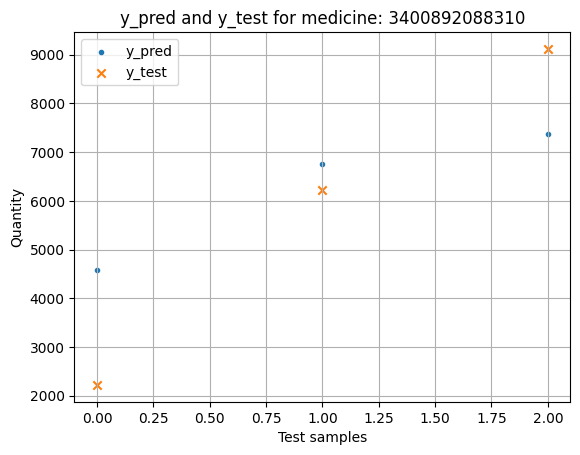



----------------------------------------------------------------------------------------------------
Medicine:3400892075761
Size of data set: 39
Size of training set: 35
Size of test set: 4
Size of grid search: 12
Datapoints in test: 4
Best Parameters: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 3}
Training Score: R^2 -0.242
Test score: 
R^2 Score: 0.091
MAE: 829.523
MAPE: 0.08
RMSE: 1051.349



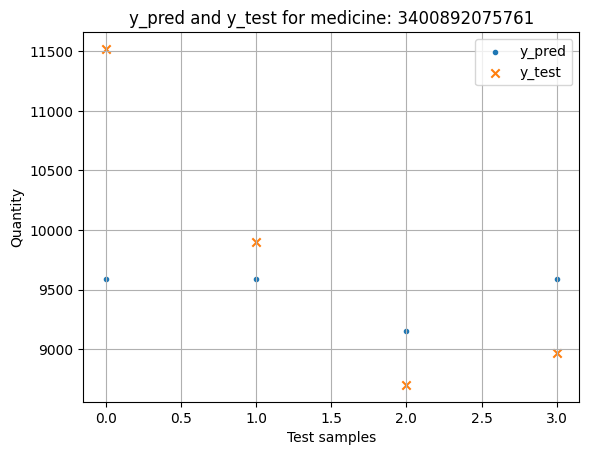



----------------------------------------------------------------------------------------------------
Medicine:3400892203645
Size of data set: 39
Size of training set: 35
Size of test set: 4
Size of grid search: 12
Datapoints in test: 4
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 3}
Training Score: R^2 -2.533
Test score: 
R^2 Score: 0.005
MAE: 1104.167
MAPE: 0.108
RMSE: 1229.269



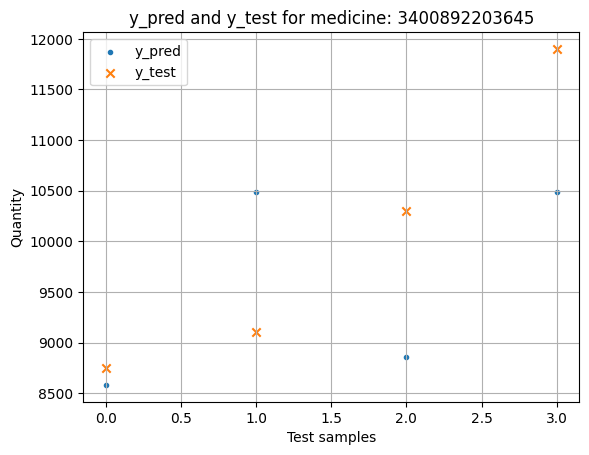



----------------------------------------------------------------------------------------------------
Medicine:3400892065366
Size of data set: 39
Size of training set: 35
Size of test set: 4
Size of grid search: 12
Datapoints in test: 4
Best Parameters: {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 3}
Training Score: R^2 -0.038
Test score: 
R^2 Score: -0.093
MAE: 3015.371
MAPE: 0.147
RMSE: 3762.686



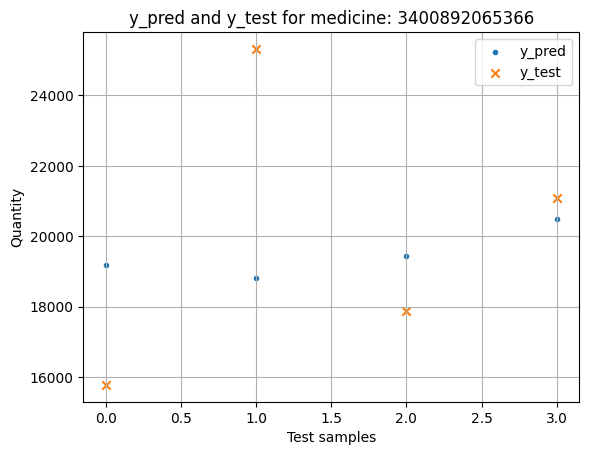



----------------------------------------------------------------------------------------------------
Medicine:3400892052120
Size of data set: 39
Size of training set: 35
Size of test set: 4
Size of grid search: 12
Datapoints in test: 4
Best Parameters: {'max_depth': 2, 'max_features': 1, 'n_estimators': 3}
Training Score: R^2 -0.104
Test score: 
R^2 Score: -0.427
MAE: 1123.269
MAPE: 0.133
RMSE: 1280.417



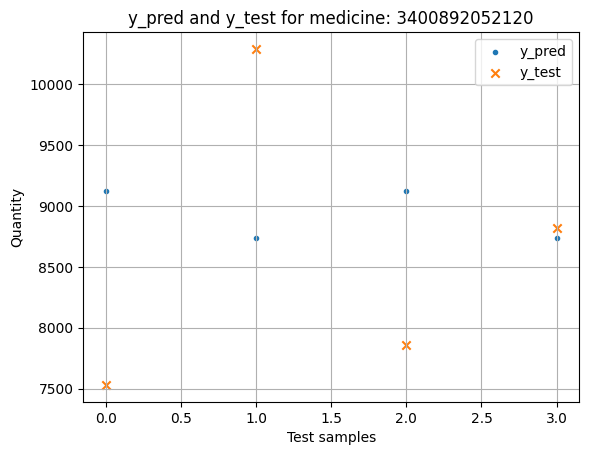



----------------------------------------------------------------------------------------------------
Medicine:3400891996128
Size of data set: 39
Size of training set: 35
Size of test set: 4
Size of grid search: 12
Datapoints in test: 4
Best Parameters: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 2}
Training Score: R^2 -0.358
Test score: 
R^2 Score: -2.148
MAE: 20103.245
MAPE: 0.103
RMSE: 23125.178



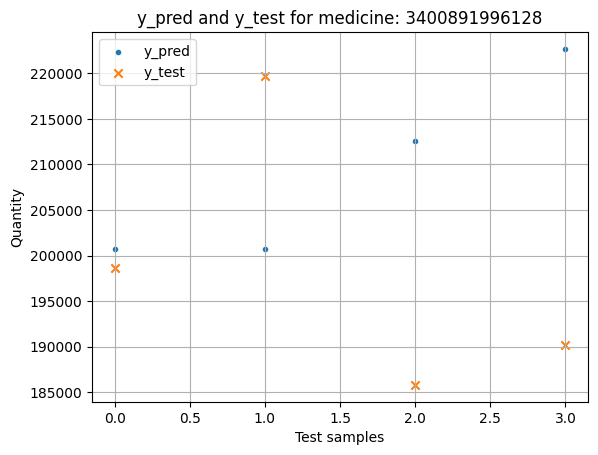



----------------------------------------------------------------------------------------------------
Medicine:3400893826706
Size of data set: 39
Size of training set: 35
Size of test set: 4
Size of grid search: 12
Datapoints in test: 4
Best Parameters: {'max_depth': 4, 'max_features': 1, 'n_estimators': 2}
Training Score: R^2 0.081
Test score: 
R^2 Score: 0.317
MAE: 707.917
MAPE: 0.124
RMSE: 862.501



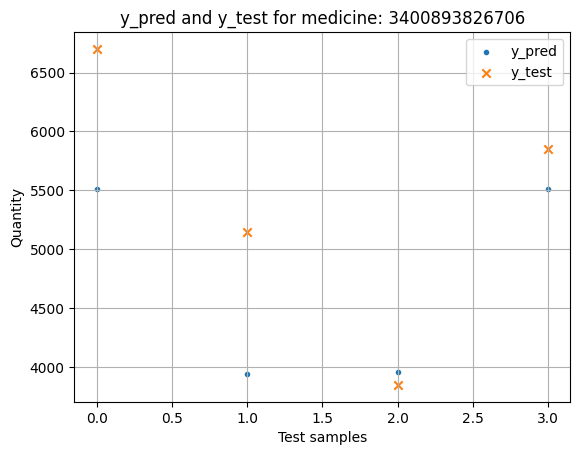



----------------------------------------------------------------------------------------------------
Medicine:3400893736135
Size of data set: 39
Size of training set: 35
Size of test set: 4
Size of grid search: 12
Datapoints in test: 4
Best Parameters: {'max_depth': 5, 'max_features': 1, 'n_estimators': 3}
Training Score: R^2 -0.31
Test score: 
R^2 Score: -1.1
MAE: 898.77
MAPE: 0.118
RMSE: 990.494



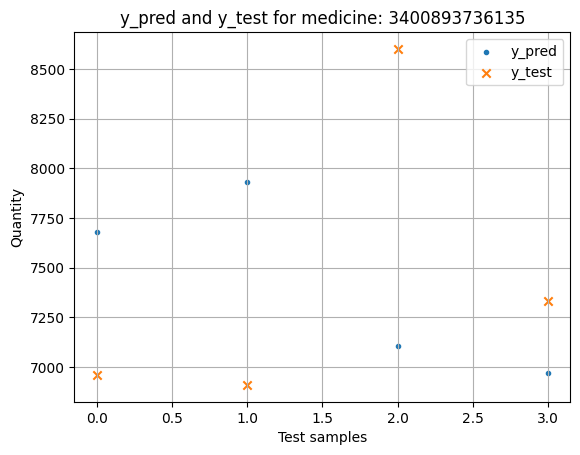



----------------------------------------------------------------------------------------------------
Medicine:3400893875490
Size of data set: 39
Size of training set: 35
Size of test set: 4
Size of grid search: 12
Datapoints in test: 4
Best Parameters: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 3}
Training Score: R^2 -0.553
Test score: 
R^2 Score: -0.284
MAE: 2069.688
MAPE: 0.097
RMSE: 2818.977



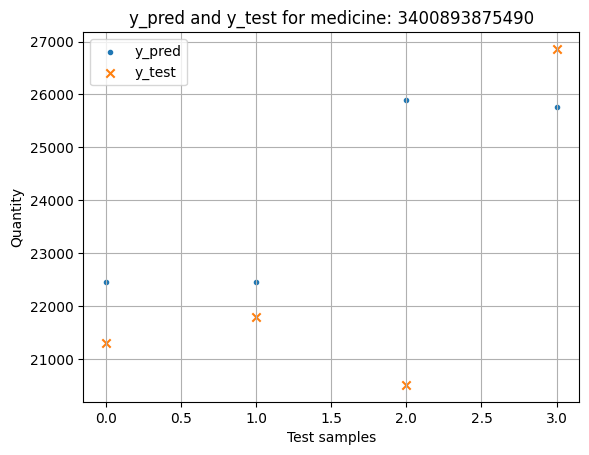



----------------------------------------------------------------------------------------------------
Medicine:3400890837149
Size of data set: 39
Size of training set: 35
Size of test set: 4
Size of grid search: 12
Datapoints in test: 4
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 2}
Training Score: R^2 -0.074
Test score: 
R^2 Score: 0.256
MAE: 2408.75
MAPE: 0.158
RMSE: 2828.347



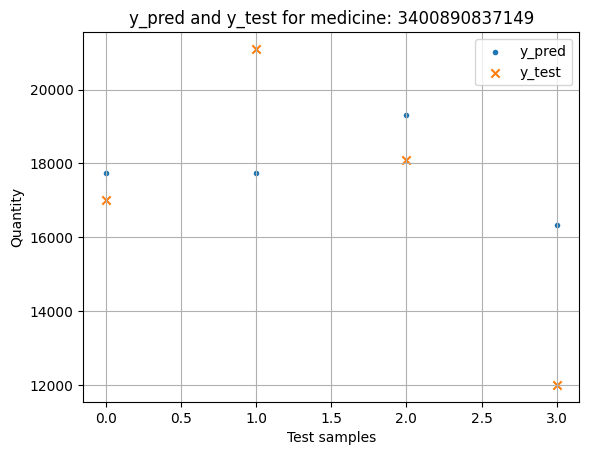



----------------------------------------------------------------------------------------------------
Medicine:3400891235203
Size of data set: 39
Size of training set: 35
Size of test set: 4
Size of grid search: 12
Datapoints in test: 4
Best Parameters: {'max_depth': 3, 'max_features': 1, 'n_estimators': 3}
Training Score: R^2 -0.007
Test score: 
R^2 Score: 0.114
MAE: 1608.878
MAPE: 0.344
RMSE: 1787.386



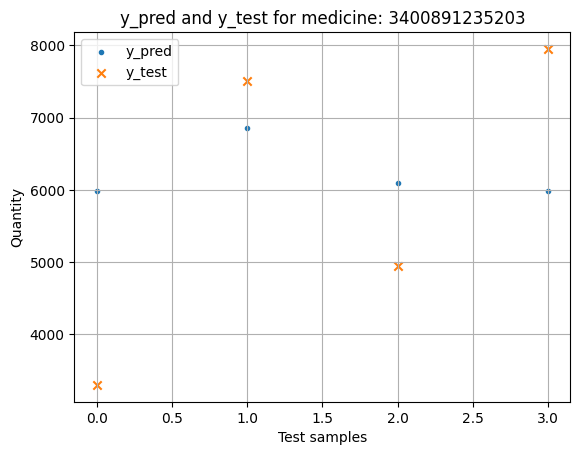



----------------------------------------------------------------------------------------------------
Medicine:3400891225037
Size of data set: 39
Size of training set: 35
Size of test set: 4
Size of grid search: 12
Datapoints in test: 4
Best Parameters: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 3}
Training Score: R^2 0.085
Test score: 
R^2 Score: -6.55
MAE: 3585.544
MAPE: 0.164
RMSE: 3675.243



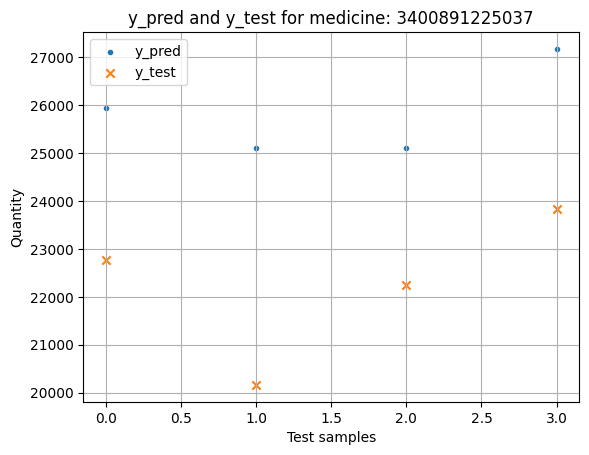



----------------------------------------------------------------------------------------------------
Medicine:3400891191226
Size of data set: 39
Size of training set: 35
Size of test set: 4
Size of grid search: 12
Datapoints in test: 4
Best Parameters: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 2}
Training Score: R^2 0.205
Test score: 
R^2 Score: -1.581
MAE: 1109.458
MAPE: 0.129
RMSE: 1249.506



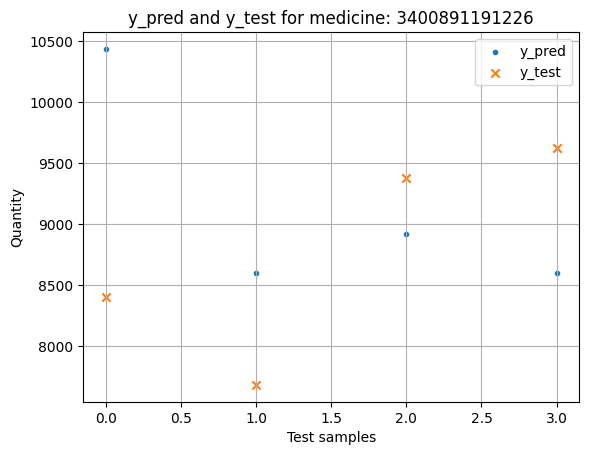



----------------------------------------------------------------------------------------------------
Medicine:3400892729589
Size of data set: 39
Size of training set: 35
Size of test set: 4
Size of grid search: 12
Datapoints in test: 4
Best Parameters: {'max_depth': 2, 'max_features': 1, 'n_estimators': 2}
Training Score: R^2 0.197
Test score: 
R^2 Score: -0.209
MAE: 2461.834
MAPE: 0.199
RMSE: 2809.308



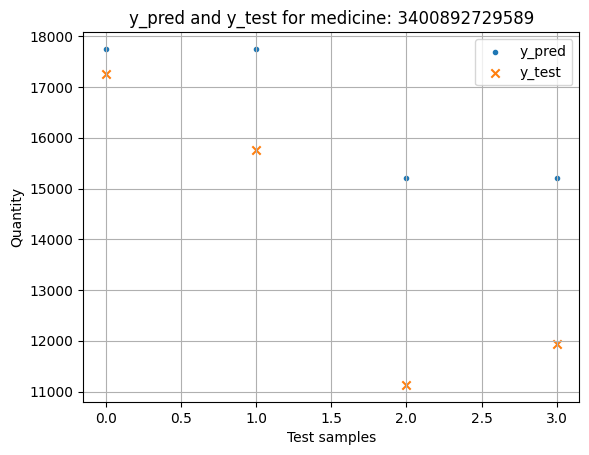



----------------------------------------------------------------------------------------------------
Medicine:3400892745848
Size of data set: 39
Size of training set: 35
Size of test set: 4
Size of grid search: 12
Datapoints in test: 4
Best Parameters: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 2}
Training Score: R^2 -0.07
Test score: 
R^2 Score: 0.884
MAE: 825.628
MAPE: 0.066
RMSE: 927.29



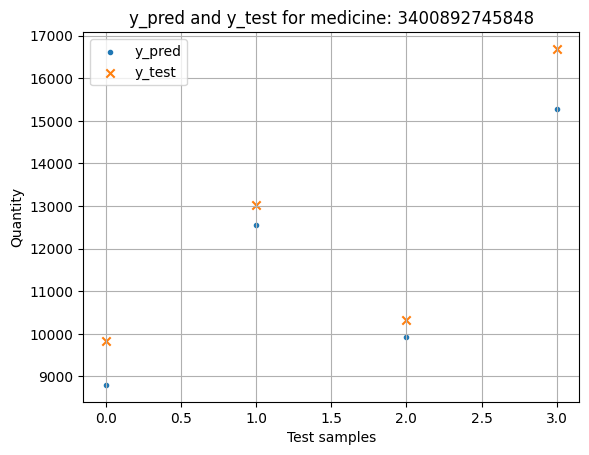



----------------------------------------------------------------------------------------------------
Medicine:3400892697789
Size of data set: 39
Size of training set: 35
Size of test set: 4
Size of grid search: 12
Datapoints in test: 4
Best Parameters: {'max_depth': 2, 'max_features': 1, 'n_estimators': 3}
Training Score: R^2 -0.406
Test score: 
R^2 Score: -1.518
MAE: 797.357
MAPE: 0.064
RMSE: 865.731



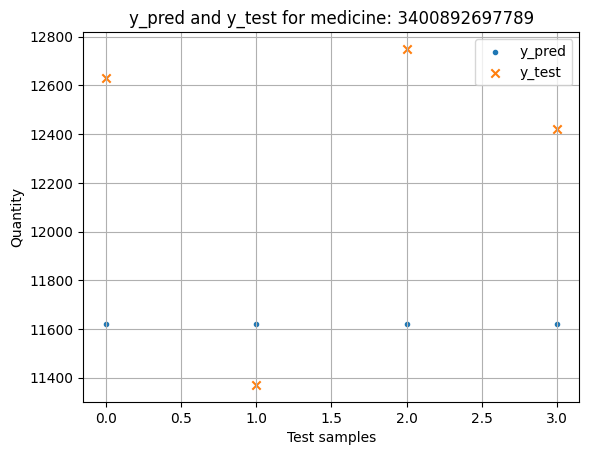



----------------------------------------------------------------------------------------------------
Medicine:3400892761527
Size of data set: 39
Size of training set: 35
Size of test set: 4
Size of grid search: 12
Datapoints in test: 4
Best Parameters: {'max_depth': 5, 'max_features': 1, 'n_estimators': 2}
Training Score: R^2 0.346
Test score: 
R^2 Score: -0.171
MAE: 1292.083
MAPE: 0.171
RMSE: 1650.114



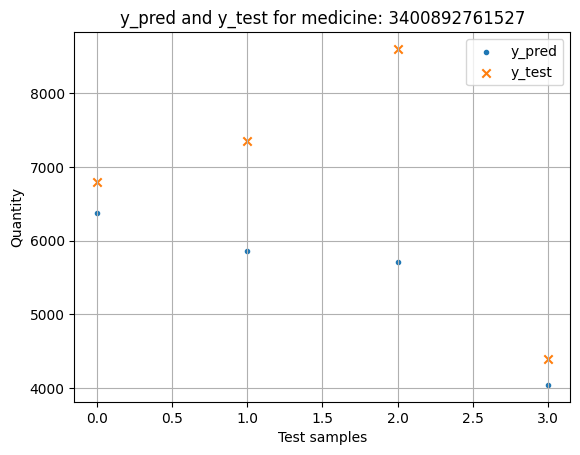



----------------------------------------------------------------------------------------------------
Medicine:3400893022634
Dataset too small
Size of data set: 8
Size of training set: 6
Size of test set: 2
Size of grid search: 6


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Datapoints in test: 2
Best Parameters: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 2}
Training Score: R^2 nan
Test score: 
R^2 Score: -161.588
MAE: 761.25
MAPE: 0.255
RMSE: 765.059



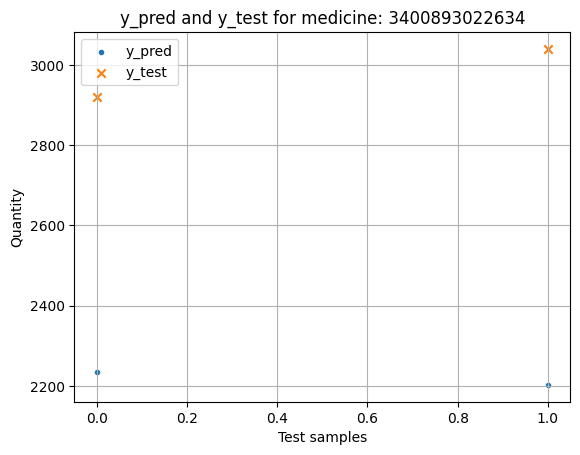



----------------------------------------------------------------------------------------------------
Medicine:3400892761695
Size of data set: 39
Size of training set: 35
Size of test set: 4
Size of grid search: 12
Datapoints in test: 4
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 3}
Training Score: R^2 0.062
Test score: 
R^2 Score: -1.891
MAE: 2185.833
MAPE: 0.217
RMSE: 2317.806



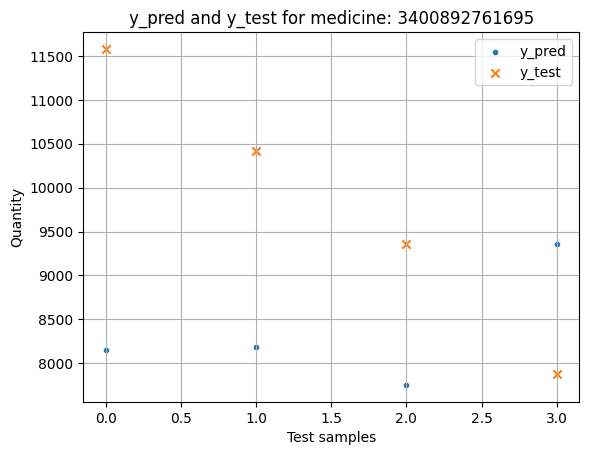



----------------------------------------------------------------------------------------------------
Medicine:3400892669236
Size of data set: 38
Size of training set: 34
Size of test set: 4
Size of grid search: 12
Datapoints in test: 4
Best Parameters: {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 3}
Training Score: R^2 -0.196
Test score: 
R^2 Score: -0.448
MAE: 3962.076
MAPE: 0.146
RMSE: 4921.574



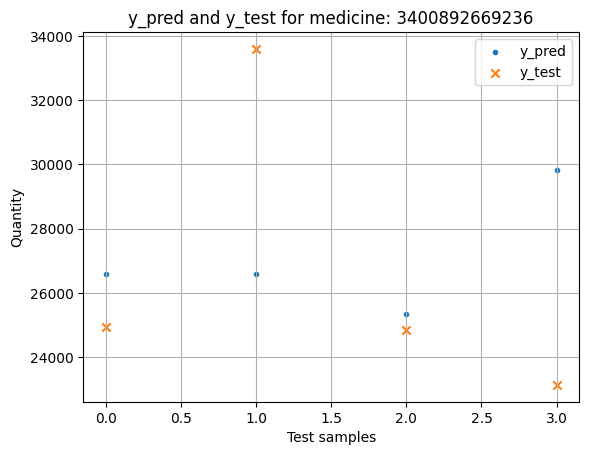



----------------------------------------------------------------------------------------------------
Medicine:3400892508566
Size of data set: 39
Size of training set: 35
Size of test set: 4
Size of grid search: 12
Datapoints in test: 4
Best Parameters: {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 3}
Training Score: R^2 0.104
Test score: 
R^2 Score: 0.679
MAE: 572.076
MAPE: 0.091
RMSE: 715.875



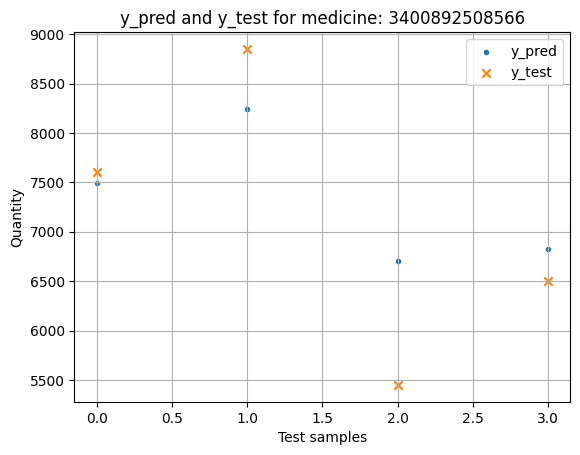

HOSPI_CODE_UCD          R2          RMSE           MAE      MAPE
0   CODE_UCD_3400892088310    0.629811   1721.143218   1546.300505  0.446173
1   CODE_UCD_3400892075761    0.091060   1051.348689    829.523173  0.080130
2   CODE_UCD_3400892203645    0.004524   1229.268847   1104.166667  0.107770
3   CODE_UCD_3400892065366   -0.093434   3762.686226   3015.370879  0.147009
4   CODE_UCD_3400892052120   -0.427331   1280.417317   1123.269231  0.133195
5   CODE_UCD_3400891996128   -2.147545  23125.178401  20103.245370  0.103065
6   CODE_UCD_3400893826706    0.317026    862.501203    707.916667  0.123998
7   CODE_UCD_3400893736135   -1.100134    990.493724    898.769841  0.118500
8   CODE_UCD_3400893875490   -0.283801   2818.977258   2069.688158  0.096706
9   CODE_UCD_3400890837149    0.256029   2828.347451   2408.750000  0.157514
10  CODE_UCD_3400891235203    0.113954   1787.386086   1608.877841  0.344054
11  CODE_UCD_3400891225037   -6.549837   3675.243390   3585.543616  0.163632
12  CODE_UCD_3400891191226   -1.581031   1249.506239   1109.458333  0.129352
13  CODE_UCD_3400892729589   -0.209336   2809.308113   2461.834165  0.199045
14  CODE_UCD_3400892745848    0.883933    927.290426    825.628005  0.065850
15  CODE_UCD_3400892697789   -1.518292    865.731365    797.357143  0.063738
16  CODE_UCD_3400892761527   -0.170894   1650.114264   1292.083333  0.170855
17  CODE_UCD_3400893022634 -161.587674    765.059230    761.250000  0.255041
18  CODE_UCD_3400892761695   -1.891246   2317.806075   2185.833333  0.217305
19  CODE_UCD_3400892669236   -0.447706   4921.573759   3962.076389  0.146015
20  CODE_UCD_3400892508566    0.679451    715.874993    572.075667  0.090544

In [52]:
df_prediction_scores_h4 = pd.DataFrame(columns=['HOSPI_CODE_UCD', 'R2', 'RMSE', 'MAE', 'MAPE'])

for medicine in medicines:

  df_prediction_scores_h4 = test_1_baseline(df_h4[features_h4], medicine, df_prediction_scores_h4)

df_prediction_scores_h4

## 5.2 - Building forecasting models based on clusters

In [63]:
def test_2_clustering(df, df_scores, medicines):
  for cluster in df.CLUSTER.unique():
    print()
    print(100*'-')
    print(f'Cluster: {cluster}')

    X = df[df['CLUSTER'] == cluster].drop(['QUANTITY', 'QUANTITY_MA', 'CLUSTER'], axis=1).copy().values
    y = df[df['CLUSTER'] == cluster]['QUANTITY'].copy().values

    X, y = shuffle(X, y, random_state = 42)

    if m.ceil(len(X) * 0.1) == 1:
      print('Dataset too small')
      test_size = 2
    else:
      test_size = 0.1

    # Perform the train-test split with shuffled samples
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                      test_size = test_size,
                                                      random_state = 42)
    print(f'Size of data set: {len(X)}')
    print(f'Size of training set: {len(X_train)}')
    print(f'Size of test set: {len(X_test)}')

    df_test = pd.DataFrame(X_test, columns = df.drop(['QUANTITY', 'QUANTITY_MA', 'CLUSTER'], axis=1).copy().columns)
    df_test['QUANTITY'] = y_test

    # Define the parameter distributions for RandomizedSearchCV
    param_grid = {
        'max_depth': np.arange(2, 8, 1),
        'n_estimators': np.arange(2, max(int(m.ceil(len(X_train)*0.1)),3), 1),
        'max_features': ['sqrt']
    }

    depth_len = param_grid['max_depth'].size
    estimators_len = param_grid['n_estimators'].size

    print(f'Size of grid search: {depth_len * estimators_len}')

    # Create the RandomizedSearchCV object
    grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid,
                              scoring = 'r2',
                              cv = 5,
                              n_jobs = -1)

    ''' >3 : the fold and candidate parameter indexes
        are also displayed together with the starting time of the computation.
    '''

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Fit the RandomizedSearchCV object to the data
    grid_search.fit(X_train_scaled, y_train)
    print("Finished training")

    # Get the best estimator
    best_estimator = grid_search.best_estimator_

    for medicine in df_test.HOSPI_CODE_UCD.unique():
      print()
      print(100*'-')
      print('Medicine:' + str(medicine))

      X_test_medicine = df_test[df_test['HOSPI_CODE_UCD'] == medicine].drop(['QUANTITY'], axis=1).copy().values

      scaler = StandardScaler()
      X_test_scaled = scaler.fit_transform(X_test_medicine)

      y_test_medicine = df_test[df_test['HOSPI_CODE_UCD'] == medicine]['QUANTITY'].copy().values

      # Make predictions using the best estimator
      y_pred = best_estimator.predict(X_test_scaled)

      # Calculate R^2 score
      r2 = r2_score(y_test_medicine, y_pred)

      # Calculate MAE
      mae = mean_absolute_error(y_test_medicine, y_pred)

      # Calculate MAPE
      mape = mean_absolute_percentage_error(y_test_medicine, y_pred)

      # Calculate RMSE
      rmse = np.sqrt(mean_squared_error(y_test_medicine, y_pred))

      # Print the best parameters, best score, and evaluation metrics

      print(f'Datapoints in test: {len(X_test)}')
      print('Best Parameters:', grid_search.best_params_)
      print('Training Score: R^2', round(grid_search.best_score_, 3))
      print('Test score: ')
      print('R^2 Score:', round(r2, 3))
      print('MAE:', round(mae, 3))
      print('MAPE:', round(mape, 3))
      print('RMSE:', round(rmse, 3))
      print()


      # Create the new row as a DataFrame
      new_row = pd.DataFrame({'CLUSTER': [cluster],
                              'HOSPI_CODE_UCD': ['CODE_UCD_'+str(int(medicine))],
                              'R2': [r2],
                              'RMSE': [rmse],
                              'MAE': [mae],
                              'MAPE': [mape]})

      # Append the new row to the DataFrame
      df_scores = pd.concat([df_scores, new_row], ignore_index=True)

      plot_pred(y_pred, y_test_medicine, medicine)
      print()

  # Return the updated DataFrame
  return df_scores


----------------------------------------------------------------------------------------------------
Cluster: 0
Size of data set: 1157
Size of training set: 1041
Size of test set: 116
Size of grid search: 618
Finished training

----------------------------------------------------------------------------------------------------
Medicine:3400892052120.0
Datapoints in test: 116
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 84}
Training Score: R^2 0.634
Test score: 
R^2 Score: -5.563
MAE: 818.363
MAPE: 0.279
RMSE: 1261.755



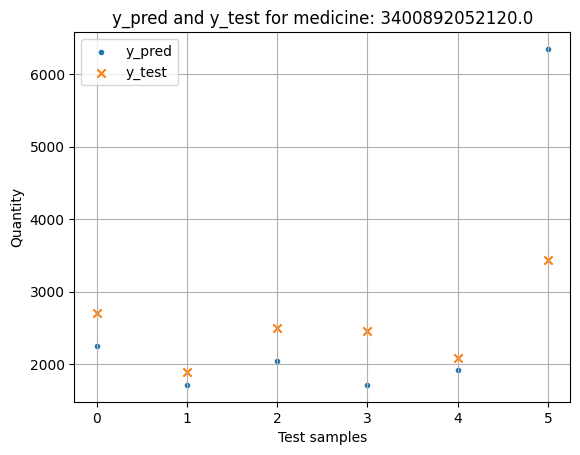



----------------------------------------------------------------------------------------------------
Medicine:3400893022634.0
Datapoints in test: 116
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 84}
Training Score: R^2 0.634
Test score: 
R^2 Score: -0.666
MAE: 660.865
MAPE: 0.245
RMSE: 852.32



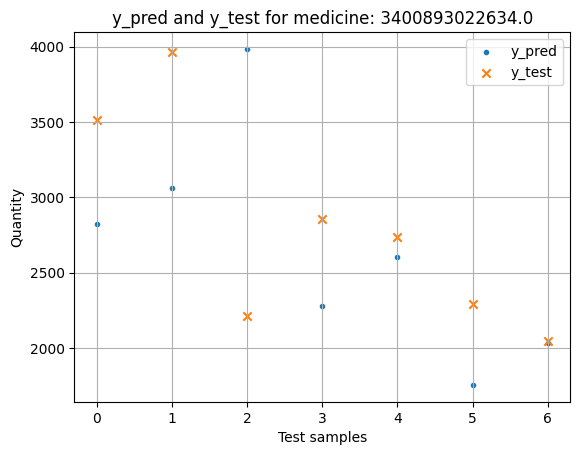



----------------------------------------------------------------------------------------------------
Medicine:3400891225037.0
Datapoints in test: 116
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 84}
Training Score: R^2 0.634
Test score: 
R^2 Score: -0.624
MAE: 7812.582
MAPE: 27.148
RMSE: 8974.878



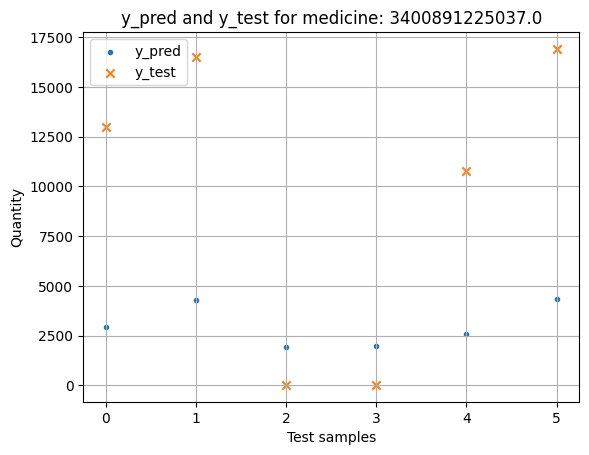



----------------------------------------------------------------------------------------------------
Medicine:3400892075761.0
Datapoints in test: 116
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 84}
Training Score: R^2 0.634
Test score: 
R^2 Score: -91.2
MAE: 2285.618
MAPE: 3.206
RMSE: 3005.678



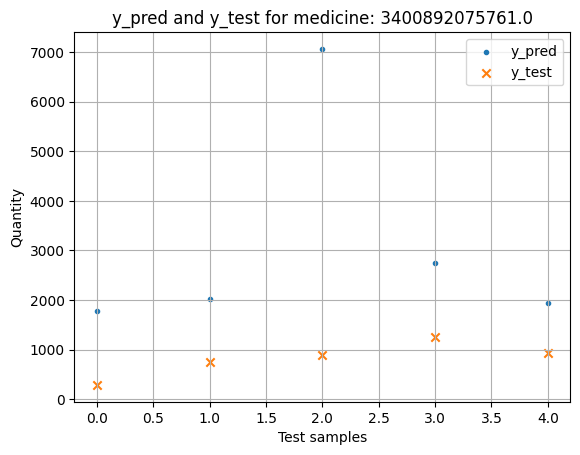



----------------------------------------------------------------------------------------------------
Medicine:3400893826706.0
Datapoints in test: 116
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 84}
Training Score: R^2 0.634
Test score: 
R^2 Score: -1.023
MAE: 787.422
MAPE: 0.251
RMSE: 1133.363



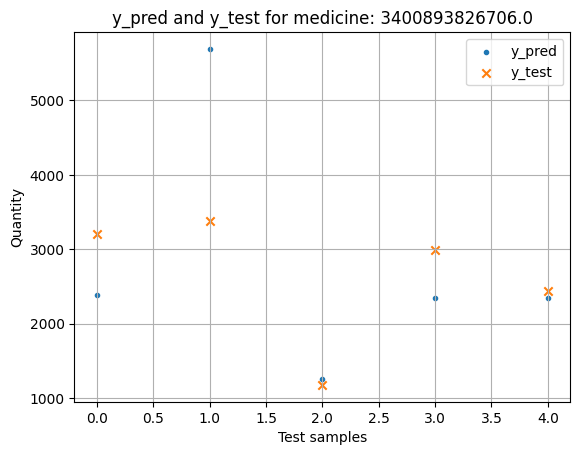



----------------------------------------------------------------------------------------------------
Medicine:3400893875490.0
Datapoints in test: 116
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 84}
Training Score: R^2 0.634
Test score: 
R^2 Score: 0.642
MAE: 1691.379
MAPE: 14.803
RMSE: 1896.606



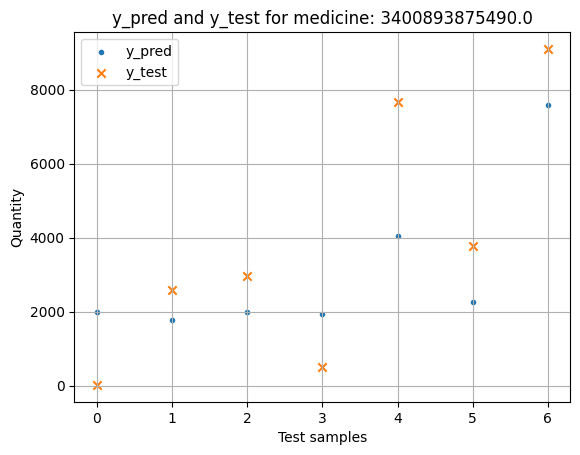



----------------------------------------------------------------------------------------------------
Medicine:3400892508566.0
Datapoints in test: 116
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 84}
Training Score: R^2 0.634
Test score: 
R^2 Score: -17.442
MAE: 1400.263
MAPE: 0.414
RMSE: 1459.035



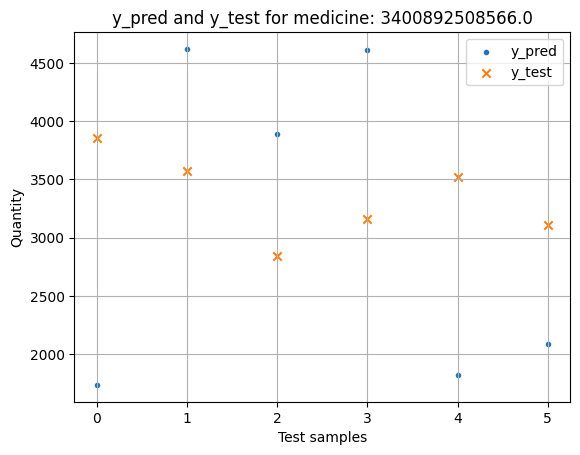



----------------------------------------------------------------------------------------------------
Medicine:3400892203645.0
Datapoints in test: 116
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 84}
Training Score: R^2 0.634
Test score: 
R^2 Score: -59.433
MAE: 1786.767
MAPE: 1.406
RMSE: 1992.818



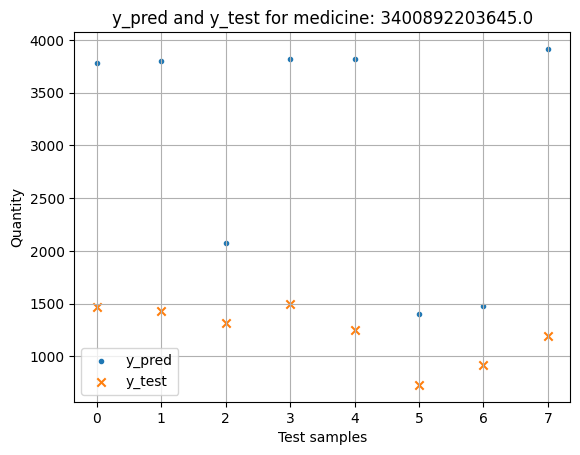



----------------------------------------------------------------------------------------------------
Medicine:3400892761695.0
Datapoints in test: 116
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 84}
Training Score: R^2 0.634
Test score: 
R^2 Score: -364.058
MAE: 2064.23
MAPE: 1.362
RMSE: 3409.851



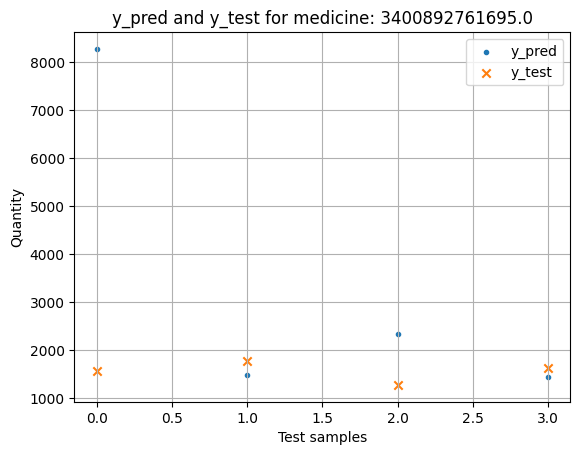



----------------------------------------------------------------------------------------------------
Medicine:3400892761527.0
Datapoints in test: 116
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 84}
Training Score: R^2 0.634
Test score: 
R^2 Score: -0.528
MAE: 1375.928
MAPE: 0.366
RMSE: 1402.085



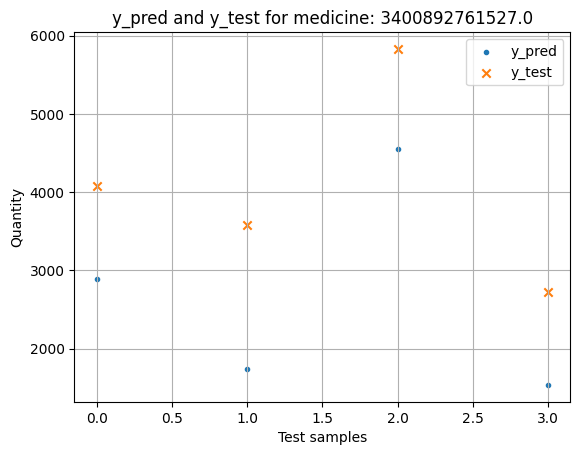



----------------------------------------------------------------------------------------------------
Medicine:3400892088310.0
Datapoints in test: 116
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 84}
Training Score: R^2 0.634
Test score: 
R^2 Score: -3.651
MAE: 983.122
MAPE: 0.629
RMSE: 1379.2



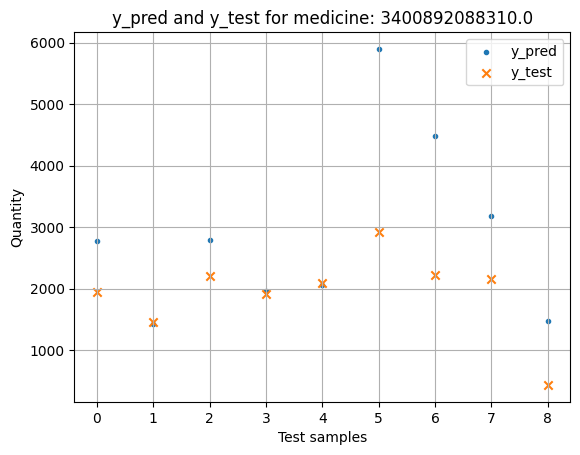



----------------------------------------------------------------------------------------------------
Medicine:3400891235203.0
Datapoints in test: 116
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 84}
Training Score: R^2 0.634
Test score: 
R^2 Score: -159.729
MAE: 1899.804
MAPE: 1.173
RMSE: 2998.126



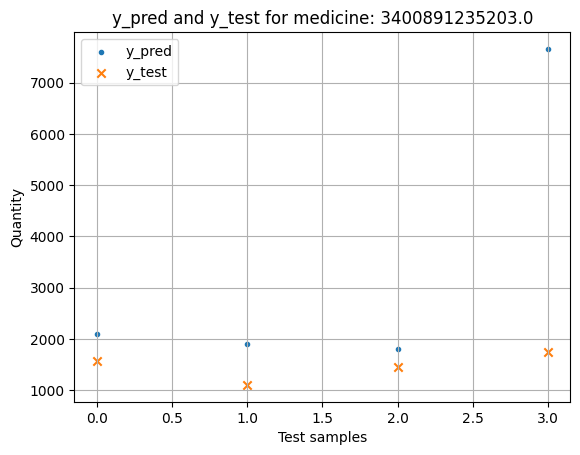



----------------------------------------------------------------------------------------------------
Medicine:3400892745848.0
Datapoints in test: 116
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 84}
Training Score: R^2 0.634
Test score: 
R^2 Score: -7.443
MAE: 2574.142
MAPE: 0.395
RMSE: 3534.022



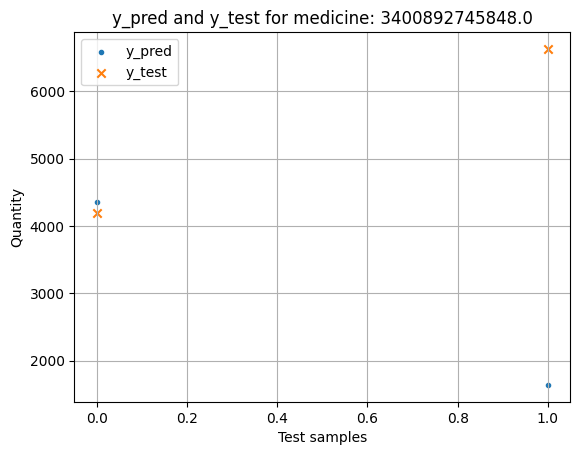



----------------------------------------------------------------------------------------------------
Medicine:3400892065366.0
Datapoints in test: 116
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 84}
Training Score: R^2 0.634
Test score: 
R^2 Score: -0.498
MAE: 1128.017
MAPE: 0.328
RMSE: 1300.242



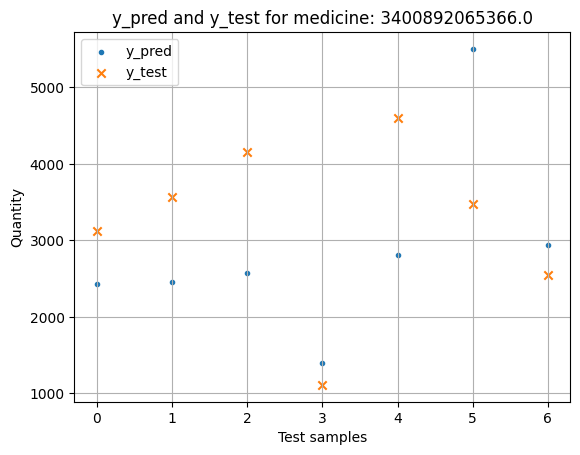



----------------------------------------------------------------------------------------------------
Medicine:3400891996128.0
Datapoints in test: 116
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 84}
Training Score: R^2 0.634
Test score: 
R^2 Score: -0.443
MAE: 7656.757
MAPE: 0.638
RMSE: 10552.214



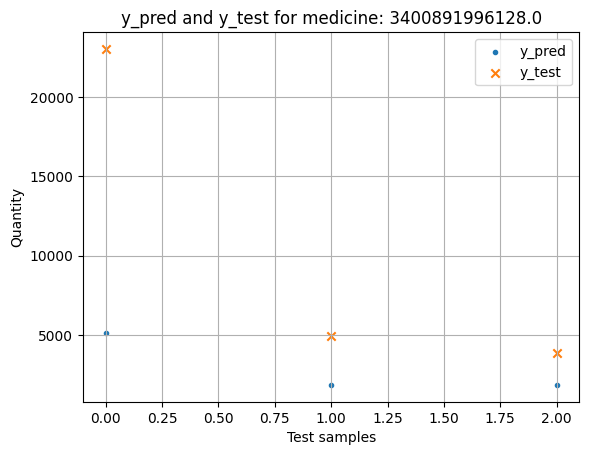



----------------------------------------------------------------------------------------------------
Medicine:3400892669236.0
Datapoints in test: 116
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 84}
Training Score: R^2 0.634
Test score: 
R^2 Score: -0.781
MAE: 3635.79
MAPE: 0.544
RMSE: 4223.771



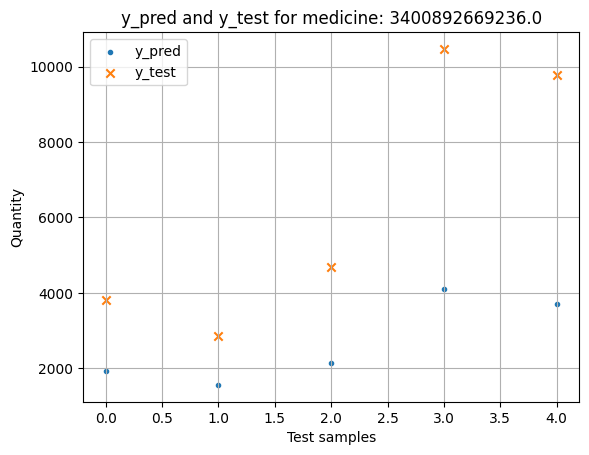



----------------------------------------------------------------------------------------------------
Medicine:3400892729589.0
Datapoints in test: 116
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 84}
Training Score: R^2 0.634
Test score: 
R^2 Score: 0.187
MAE: 1320.794
MAPE: 32.117
RMSE: 1493.189



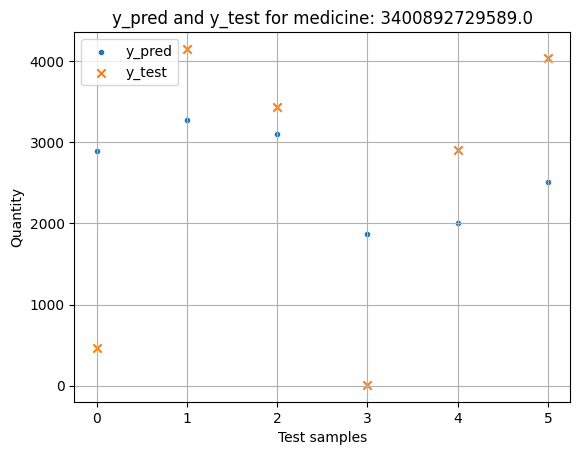



----------------------------------------------------------------------------------------------------
Medicine:3400890837149.0
Datapoints in test: 116
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 84}
Training Score: R^2 0.634
Test score: 
R^2 Score: -0.281
MAE: 982.39
MAPE: 0.669
RMSE: 1077.477



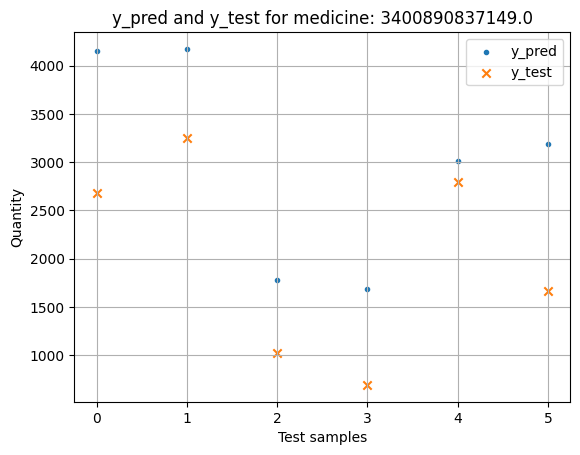



----------------------------------------------------------------------------------------------------
Medicine:3400893736135.0
Datapoints in test: 116
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 84}
Training Score: R^2 0.634
Test score: 
R^2 Score: -2.877
MAE: 1178.557
MAPE: 1.108
RMSE: 1393.86



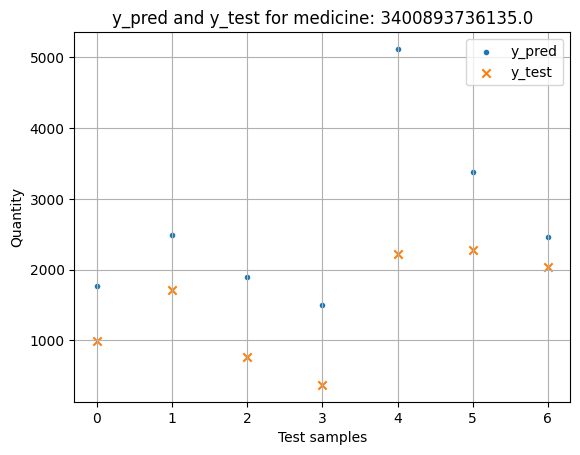



----------------------------------------------------------------------------------------------------
Medicine:3400891191226.0
Datapoints in test: 116
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 84}
Training Score: R^2 0.634
Test score: 
R^2 Score: -3.389
MAE: 814.711
MAPE: 0.343
RMSE: 1331.103



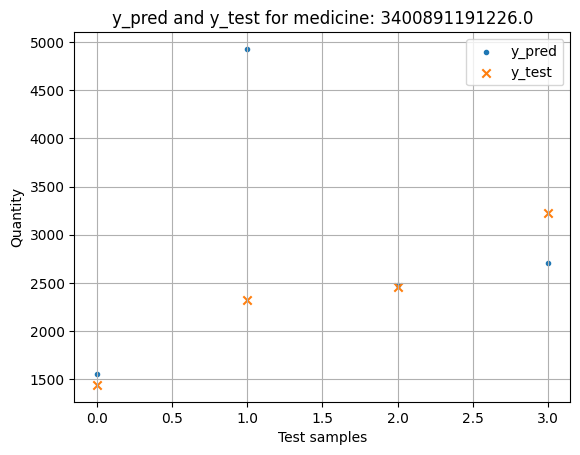



----------------------------------------------------------------------------------------------------
Medicine:3400892697789.0
Datapoints in test: 116
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 84}
Training Score: R^2 0.634
Test score: 
R^2 Score: -32.903
MAE: 1833.212
MAPE: 2.353
RMSE: 2306.928



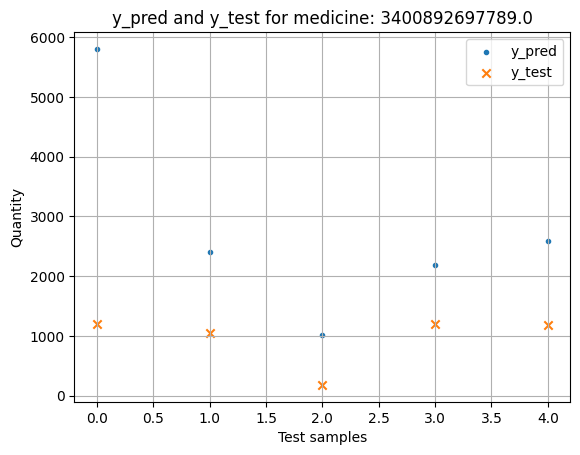



----------------------------------------------------------------------------------------------------
Cluster: 1
Size of data set: 51
Size of training set: 45
Size of test set: 6
Size of grid search: 18
Finished training

----------------------------------------------------------------------------------------------------
Medicine:3400891996128.0
Datapoints in test: 6
Best Parameters: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 2}
Training Score: R^2 0.416
Test score: 
R^2 Score: 0.697
MAE: 5999.945
MAPE: 0.144
RMSE: 6961.125



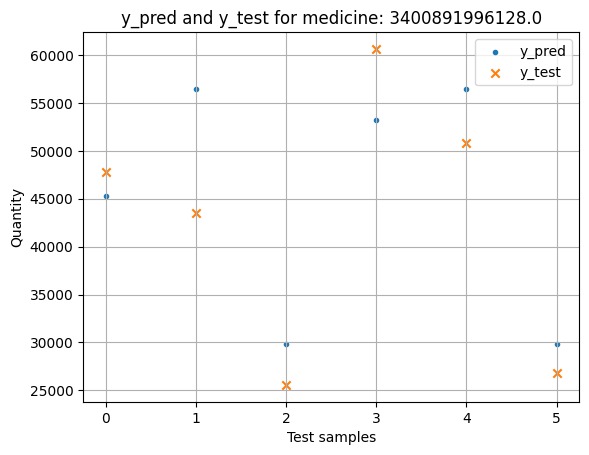

CLUSTER          HOSPI_CODE_UCD          R2          RMSE          MAE  \
0        0  CODE_UCD_3400892052120   -5.562875   1261.755039   818.362839   
1        0  CODE_UCD_3400893022634   -0.665559    852.319535   660.865453   
2        0  CODE_UCD_3400891225037   -0.623776   8974.878332  7812.582174   
3        0  CODE_UCD_3400892075761  -91.199763   3005.678224  2285.617900   
4        0  CODE_UCD_3400893826706   -1.023486   1133.363344   787.422185   
5        0  CODE_UCD_3400893875490    0.641690   1896.605992  1691.378508   
6        0  CODE_UCD_3400892508566  -17.441686   1459.035199  1400.262660   
7        0  CODE_UCD_3400892203645  -59.432751   1992.817889  1786.766760   
8        0  CODE_UCD_3400892761695 -364.057583   3409.851028  2064.230135   
9        0  CODE_UCD_3400892761527   -0.528124   1402.085106  1375.927986   
10       0  CODE_UCD_3400892088310   -3.651322   1379.200222   983.121966   
11       0  CODE_UCD_3400891235203 -159.728782   2998.125602  1899.804298   
12       0  CODE_UCD_3400892745848   -7.442923   3534.022147  2574.142420   
13       0  CODE_UCD_3400892065366   -0.497878   1300.242292  1128.016698   
14       0  CODE_UCD_3400891996128   -0.442705  10552.214023  7656.757287   
15       0  CODE_UCD_3400892669236   -0.780647   4223.771380  3635.789933   
16       0  CODE_UCD_3400892729589    0.186673   1493.188841  1320.793519   
17       0  CODE_UCD_3400890837149   -0.280526   1077.477103   982.389875   
18       0  CODE_UCD_3400893736135   -2.876583   1393.860444  1178.556542   
19       0  CODE_UCD_3400891191226   -3.388783   1331.102553   814.711079   
20       0  CODE_UCD_3400892697789  -32.903297   2306.928088  1833.211755   
21       1  CODE_UCD_3400891996128    0.696953   6961.124937  5999.945073   

         MAPE  
0    0.279420  
1    0.245364  
2   27.147762  
3    3.206065  
4    0.250957  
5   14.803441  
6    0.414304  
7    1.406153  
8    1.362480  
9    0.365735  
10   0.629275  
11   1.173081  
12   0.394780  
13   0.328445  
14   0.638486  
15   0.544318  
16  32.117416  
17   0.669354  
18   1.107892  
19   0.342556  
20   2.353056  
21   0.144371

In [64]:
df_prediction_scores_h1_clustered = pd.DataFrame(columns=['CLUSTER', 'HOSPI_CODE_UCD', 'R2', 'RMSE', 'MAE', 'MAPE'])

df_prediction_scores_h1_clustered = test_2_clustering(df_h1[features_h1], df_prediction_scores_h1_clustered, medicines)

df_prediction_scores_h1_clustered


----------------------------------------------------------------------------------------------------
Cluster: 1
Size of data set: 479
Size of training set: 431
Size of test set: 48
Size of grid search: 252
Finished training

----------------------------------------------------------------------------------------------------
Medicine:3400891191226.0
Datapoints in test: 48
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 31}
Training Score: R^2 0.585
Test score: 
R^2 Score: -0.984
MAE: 383.938
MAPE: 0.153
RMSE: 535.302



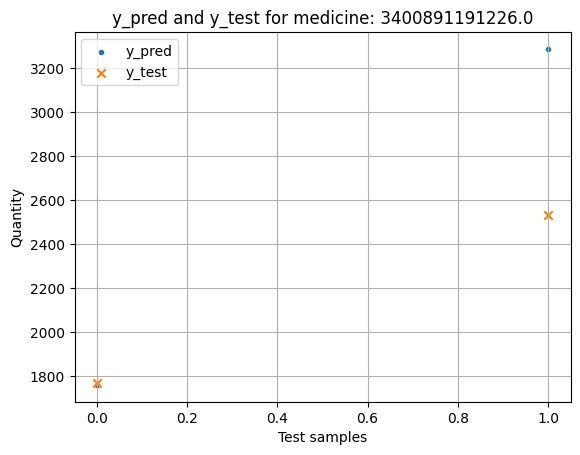



----------------------------------------------------------------------------------------------------
Medicine:3400892075761.0
Datapoints in test: 48
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 31}
Training Score: R^2 0.585
Test score: 
R^2 Score: -8.482
MAE: 520.272
MAPE: 0.215
RMSE: 581.177



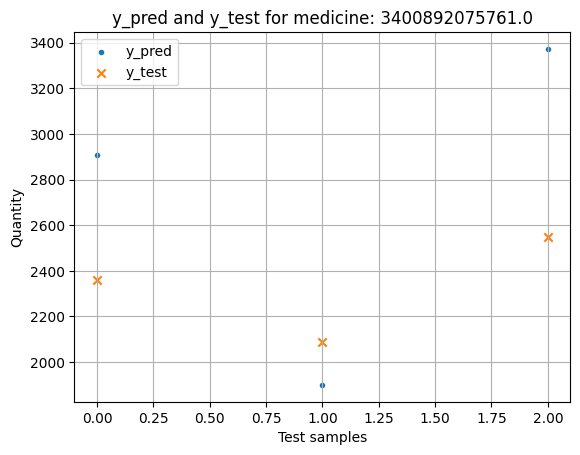



----------------------------------------------------------------------------------------------------
Medicine:3400893736135.0
Datapoints in test: 48
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 31}
Training Score: R^2 0.585
Test score: 
R^2 Score: -3.876
MAE: 1083.621
MAPE: 0.283
RMSE: 1309.483



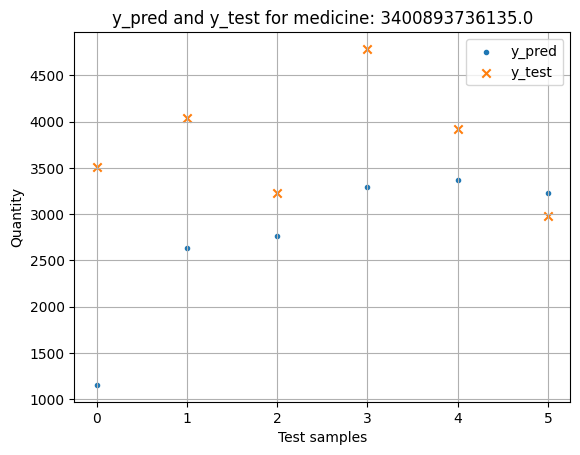



----------------------------------------------------------------------------------------------------
Medicine:3400892729589.0
Datapoints in test: 48
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 31}
Training Score: R^2 0.585
Test score: 
R^2 Score: -3.314
MAE: 1789.686
MAPE: 0.399
RMSE: 1852.844



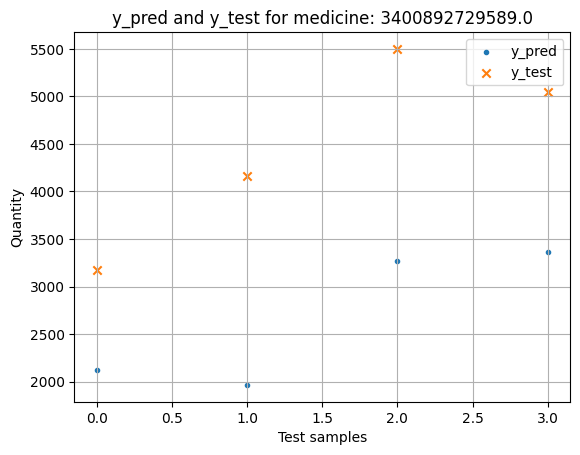



----------------------------------------------------------------------------------------------------
Medicine:3400892052120.0
Datapoints in test: 48
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 31}
Training Score: R^2 0.585
Test score: 
R^2 Score: -29.044
MAE: 1147.314
MAPE: 0.71
RMSE: 1247.999



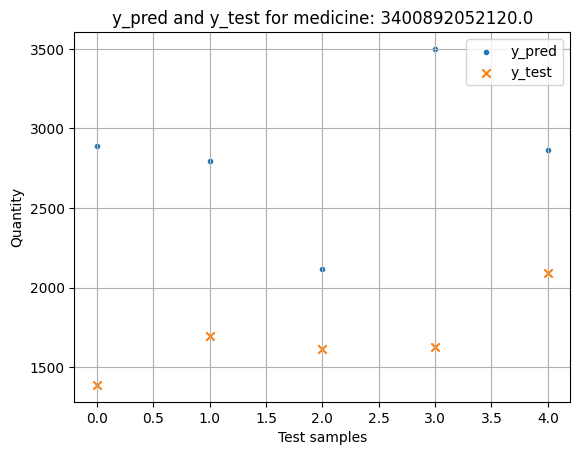



----------------------------------------------------------------------------------------------------
Medicine:3400891235203.0
Datapoints in test: 48
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 31}
Training Score: R^2 0.585
Test score: 
R^2 Score: -36.112
MAE: 1576.053
MAPE: 1.344
RMSE: 1636.737



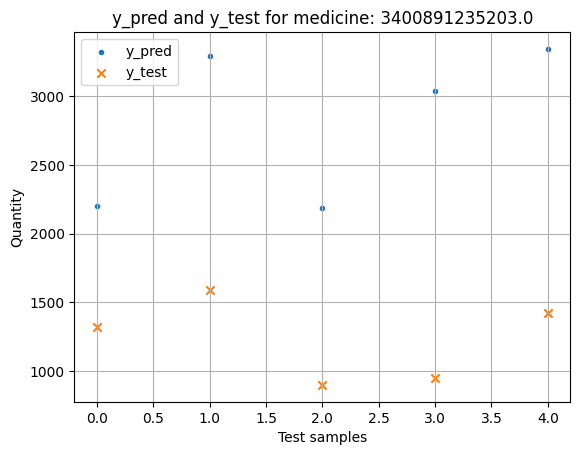



----------------------------------------------------------------------------------------------------
Medicine:3400892088310.0
Datapoints in test: 48
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 31}
Training Score: R^2 0.585
Test score: 
R^2 Score: -106.536
MAE: 825.975
MAPE: 0.319
RMSE: 834.78



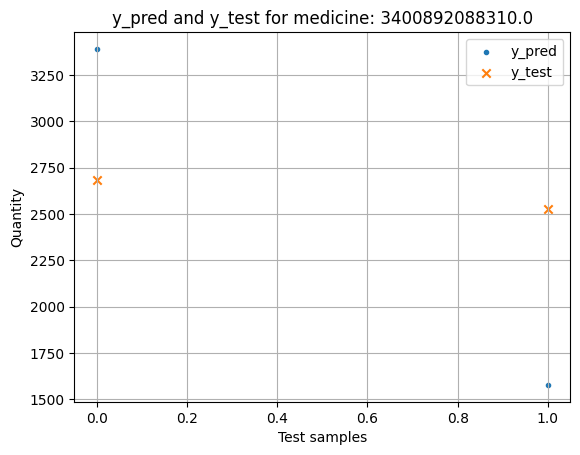



----------------------------------------------------------------------------------------------------
Medicine:3400892697789.0
Datapoints in test: 48
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 31}
Training Score: R^2 0.585
Test score: 
R^2 Score: -125.631
MAE: 2137.019
MAPE: 3.558
RMSE: 2177.861



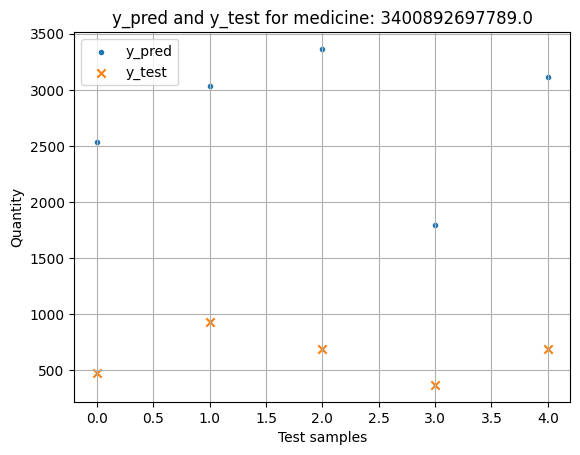



----------------------------------------------------------------------------------------------------
Medicine:3400890837149.0
Datapoints in test: 48
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 31}
Training Score: R^2 0.585
Test score: 
R^2 Score: -7.65
MAE: 706.794
MAPE: 0.308
RMSE: 770.33



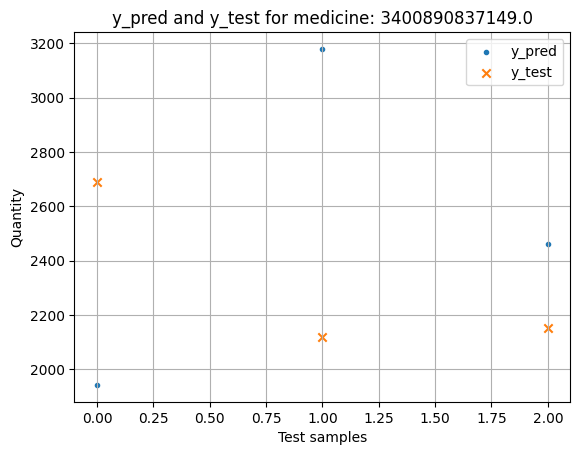



----------------------------------------------------------------------------------------------------
Medicine:3400893022634.0
Datapoints in test: 48
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 31}
Training Score: R^2 0.585
Test score: 
R^2 Score: -509.836
MAE: 1533.44
MAPE: 0.355
RMSE: 1681.292



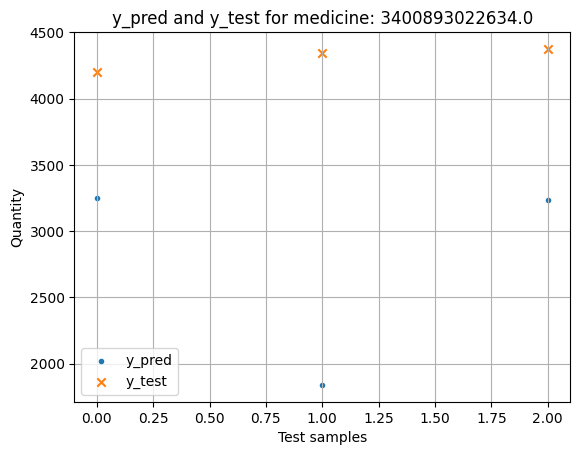



----------------------------------------------------------------------------------------------------
Medicine:3400892065366.0
Datapoints in test: 48
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 31}
Training Score: R^2 0.585
Test score: 
R^2 Score: -112.159
MAE: 2674.11
MAPE: 0.488
RMSE: 2781.743



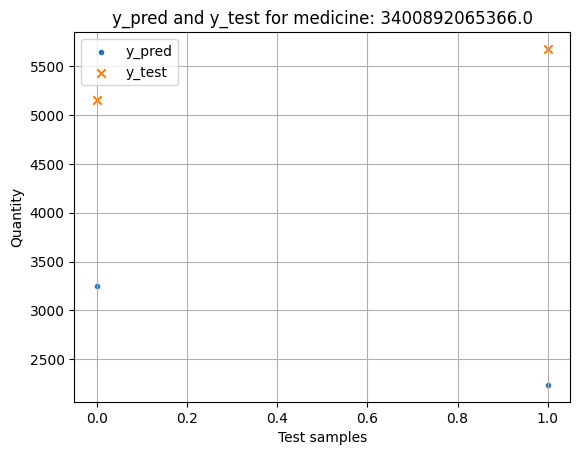



----------------------------------------------------------------------------------------------------
Medicine:3400892203645.0
Datapoints in test: 48
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 31}
Training Score: R^2 0.585
Test score: 
R^2 Score: -63.887
MAE: 641.398
MAPE: 0.183
RMSE: 644.422



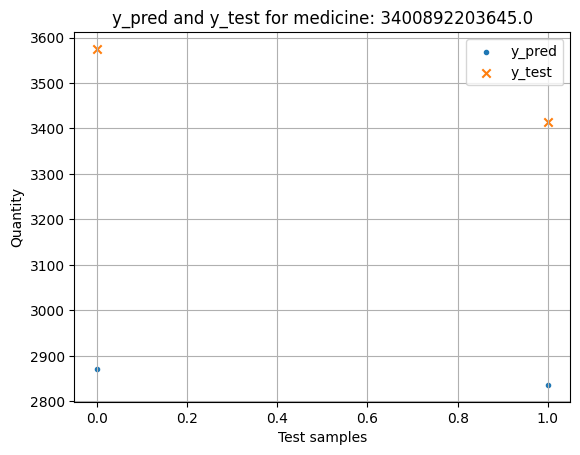



----------------------------------------------------------------------------------------------------
Medicine:3400893826706.0
Datapoints in test: 48
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 31}
Training Score: R^2 0.585
Test score: 
R^2 Score: -21.631
MAE: 1068.346
MAPE: 0.632
RMSE: 1159.69



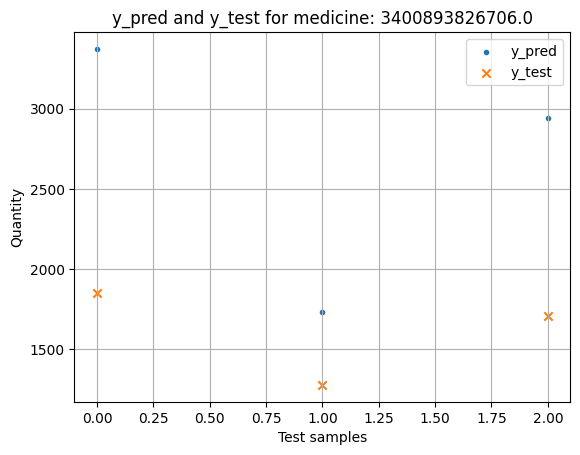



----------------------------------------------------------------------------------------------------
Medicine:3400892508566.0
Datapoints in test: 48
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 31}
Training Score: R^2 0.585
Test score: 
R^2 Score: -36345.06
MAE: 2859.657
MAPE: 100.313
RMSE: 2859.696



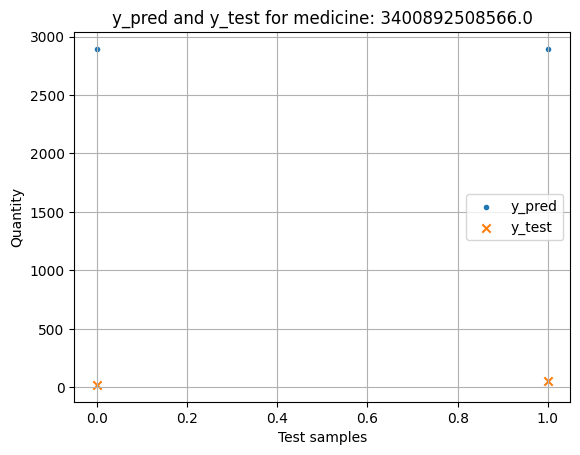



----------------------------------------------------------------------------------------------------
Medicine:3400892745848.0
Datapoints in test: 48
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 31}
Training Score: R^2 0.585
Test score: 
R^2 Score: nan
MAE: 1095.343
MAPE: 0.275
RMSE: 1095.343



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


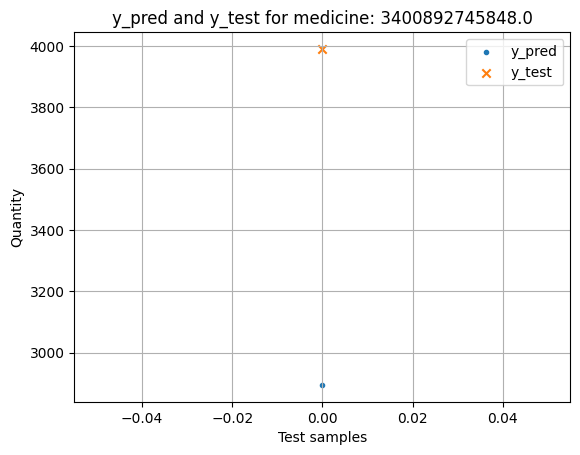



----------------------------------------------------------------------------------------------------
Cluster: 0
Size of data set: 218
Size of training set: 196
Size of test set: 22
Size of grid search: 108
Finished training

----------------------------------------------------------------------------------------------------
Medicine:3400892669236.0
Datapoints in test: 22
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 15}
Training Score: R^2 0.859
Test score: 
R^2 Score: -91.02
MAE: 3416.341
MAPE: 0.412
RMSE: 3848.672



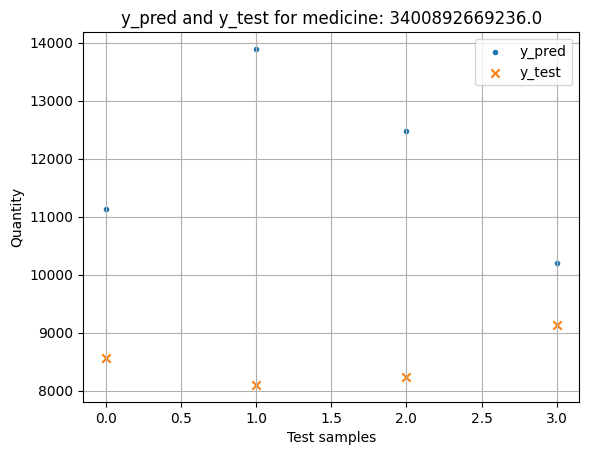



----------------------------------------------------------------------------------------------------
Medicine:3400892761695.0
Datapoints in test: 22
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 15}
Training Score: R^2 0.859
Test score: 
R^2 Score: -36.329
MAE: 5019.778
MAPE: 0.333
RMSE: 5856.924



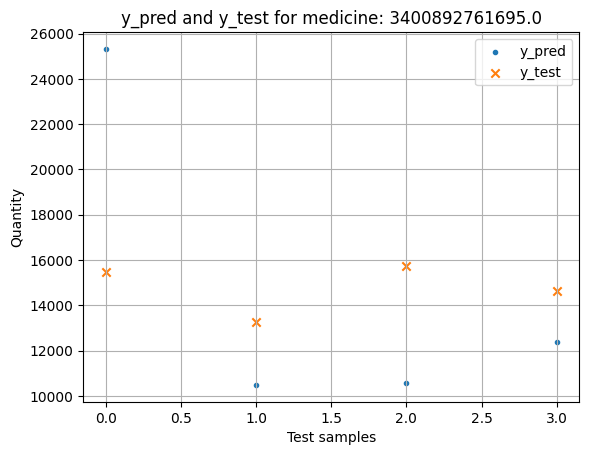



----------------------------------------------------------------------------------------------------
Medicine:3400892761527.0
Datapoints in test: 22
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 15}
Training Score: R^2 0.859
Test score: 
R^2 Score: -764.605
MAE: 11835.611
MAPE: 0.899
RMSE: 22054.757



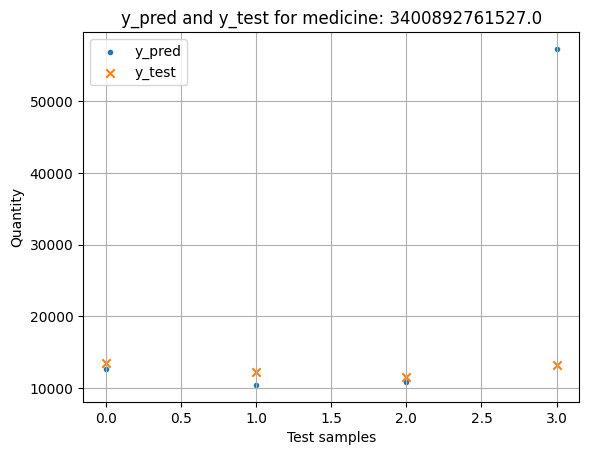



----------------------------------------------------------------------------------------------------
Medicine:3400891225037.0
Datapoints in test: 22
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 15}
Training Score: R^2 0.859
Test score: 
R^2 Score: -10.457
MAE: 8866.495
MAPE: 0.446
RMSE: 13234.271



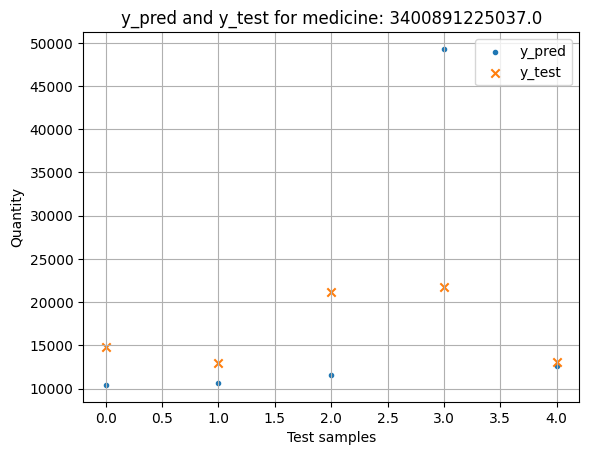



----------------------------------------------------------------------------------------------------
Medicine:3400891996128.0
Datapoints in test: 22
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 15}
Training Score: R^2 0.859
Test score: 
R^2 Score: -12.626
MAE: 41461.358
MAPE: 0.586
RMSE: 50964.235



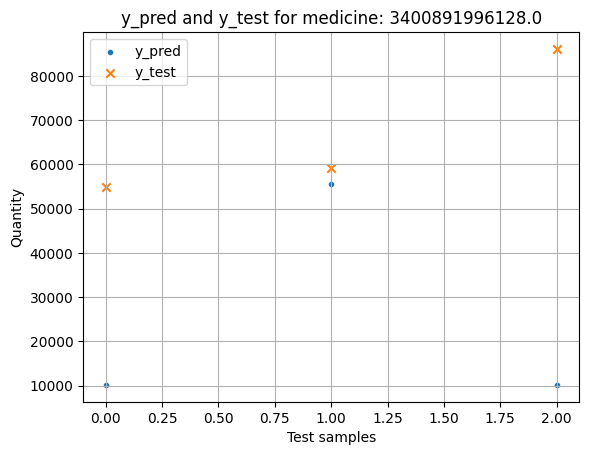



----------------------------------------------------------------------------------------------------
Medicine:3400893022634.0
Datapoints in test: 22
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 15}
Training Score: R^2 0.859
Test score: 
R^2 Score: nan
MAE: 3949.914
MAPE: 0.553
RMSE: 3949.914



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


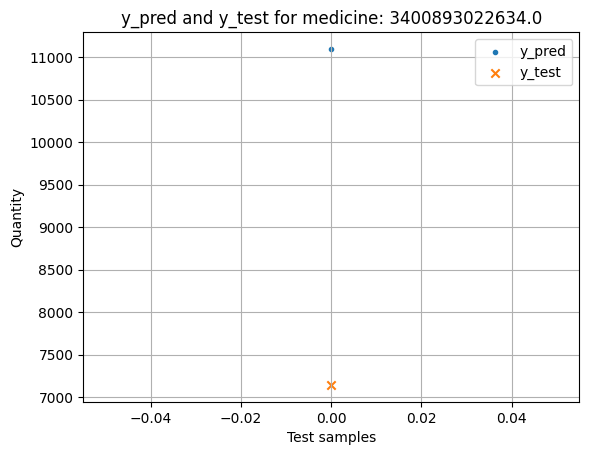



----------------------------------------------------------------------------------------------------
Medicine:3400893875490.0
Datapoints in test: 22
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 15}
Training Score: R^2 0.859
Test score: 
R^2 Score: nan
MAE: 1898.914
MAPE: 0.206
RMSE: 1898.914



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


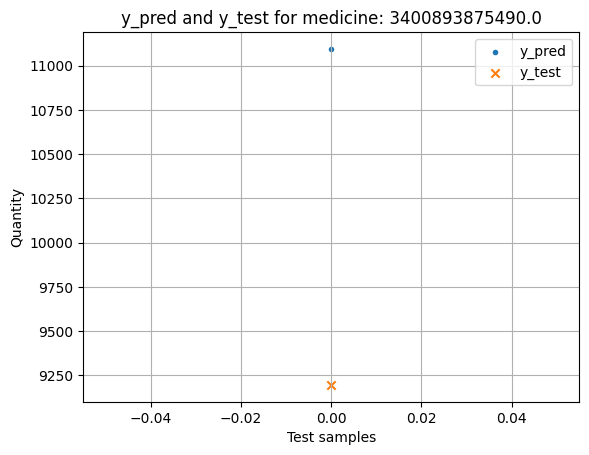

CLUSTER          HOSPI_CODE_UCD            R2          RMSE           MAE  \
0        1  CODE_UCD_3400891191226     -0.984404    535.301783    383.937523   
1        1  CODE_UCD_3400892075761     -8.481907    581.176902    520.271725   
2        1  CODE_UCD_3400893736135     -3.875776   1309.483135   1083.621349   
3        1  CODE_UCD_3400892729589     -3.313666   1852.844005   1789.686479   
4        1  CODE_UCD_3400892052120    -29.044420   1247.999499   1147.313950   
5        1  CODE_UCD_3400891235203    -36.112194   1636.736577   1576.053368   
6        1  CODE_UCD_3400892088310   -106.535532    834.779690    825.975146   
7        1  CODE_UCD_3400892697789   -125.630704   2177.861258   2137.019388   
8        1  CODE_UCD_3400890837149     -7.650268    770.330041    706.793939   
9        1  CODE_UCD_3400893022634   -509.836389   1681.291628   1533.439943   
10       1  CODE_UCD_3400892065366   -112.159400   2781.743051   2674.109636   
11       1  CODE_UCD_3400892203645    -63.887492    644.422181    641.397952   
12       1  CODE_UCD_3400893826706    -21.631203   1159.690410   1068.345778   
13       1  CODE_UCD_3400892508566 -36345.060125   2859.696405   2859.657065   
14       1  CODE_UCD_3400892745848           NaN   1095.342935   1095.342935   
15       0  CODE_UCD_3400892669236    -91.020458   3848.671750   3416.340739   
16       0  CODE_UCD_3400892761695    -36.329083   5856.924208   5019.777530   
17       0  CODE_UCD_3400892761527   -764.605144  22054.756831  11835.610588   
18       0  CODE_UCD_3400891225037    -10.457126  13234.270521   8866.494571   
19       0  CODE_UCD_3400891996128    -12.626135  50964.235200  41461.357641   
20       0  CODE_UCD_3400893022634           NaN   3949.913563   3949.913563   
21       0  CODE_UCD_3400893875490           NaN   1898.913563   1898.913563   

          MAPE  
0     0.152681  
1     0.215264  
2     0.282625  
3     0.399381  
4     0.709781  
5     1.343806  
6     0.318750  
7     3.558414  
8     0.307786  
9     0.354909  
10    0.488093  
11    0.183206  
12    0.631619  
13  100.312997  
14    0.274522  
15    0.411684  
16    0.332808  
17    0.899331  
18    0.446275  
19    0.586126  
20    0.552822  
21    0.206493

In [65]:
df_prediction_scores_h2_clustered = pd.DataFrame(columns=['CLUSTER', 'HOSPI_CODE_UCD', 'R2', 'RMSE', 'MAE', 'MAPE'])

df_prediction_scores_h2_clustered = test_2_clustering(df_h2[features_h2], df_prediction_scores_h2_clustered, medicines)

df_prediction_scores_h2_clustered


----------------------------------------------------------------------------------------------------
Cluster: 1
Size of data set: 670
Size of training set: 603
Size of test set: 67
Size of grid search: 354
Finished training

----------------------------------------------------------------------------------------------------
Medicine:3400892761695.0
Datapoints in test: 67
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}
Training Score: R^2 0.894
Test score: 
R^2 Score: -44.502
MAE: 14041.319
MAPE: 0.532
RMSE: 15625.776



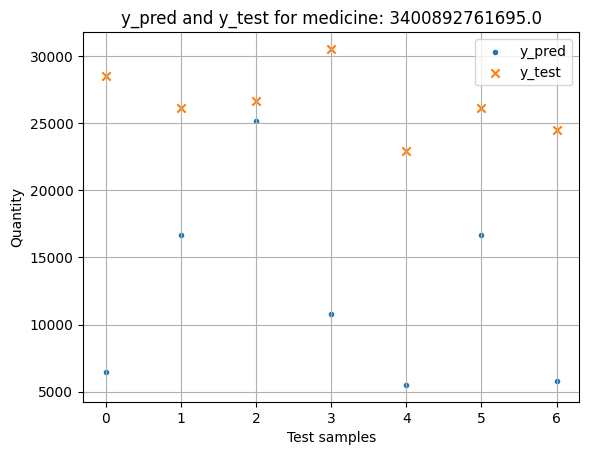



----------------------------------------------------------------------------------------------------
Medicine:3400893826706.0
Datapoints in test: 67
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}
Training Score: R^2 0.894
Test score: 
R^2 Score: -245.988
MAE: 8318.233
MAPE: 1.273
RMSE: 14494.673



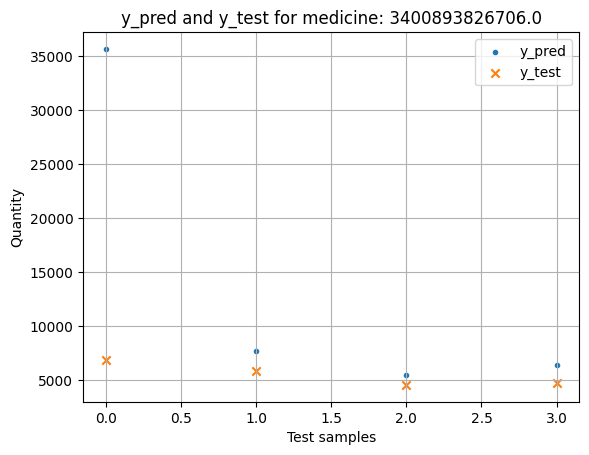



----------------------------------------------------------------------------------------------------
Medicine:3400892669236.0
Datapoints in test: 67
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}
Training Score: R^2 0.894
Test score: 
R^2 Score: -278.963
MAE: 3329.994
MAPE: 0.305
RMSE: 3664.24



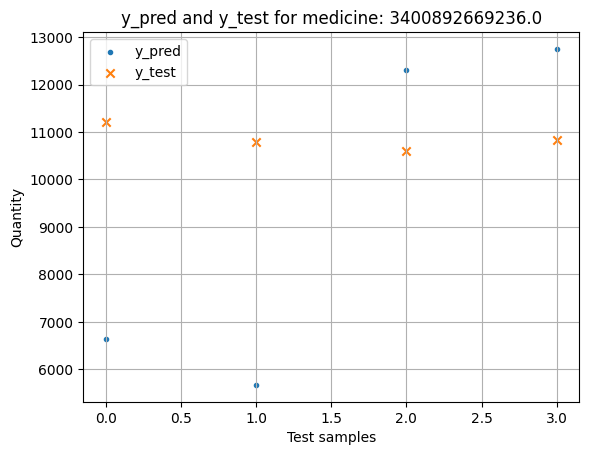



----------------------------------------------------------------------------------------------------
Medicine:3400892729589.0
Datapoints in test: 67
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}
Training Score: R^2 0.894
Test score: 
R^2 Score: nan
MAE: 599.177
MAPE: 0.099
RMSE: 599.177



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


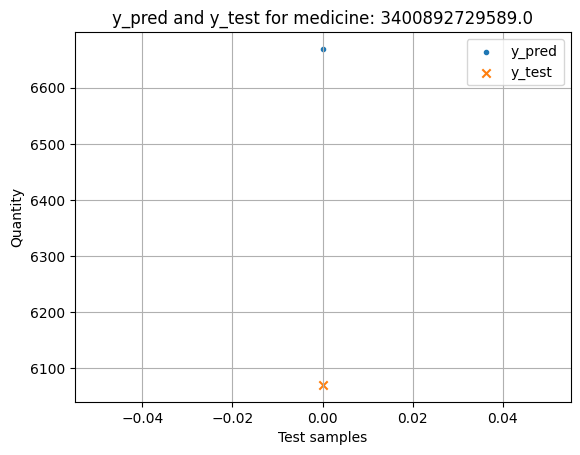



----------------------------------------------------------------------------------------------------
Medicine:3400892745848.0
Datapoints in test: 67
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}
Training Score: R^2 0.894
Test score: 
R^2 Score: -300220.508
MAE: 6125.978
MAPE: 11.455
RMSE: 6125.985



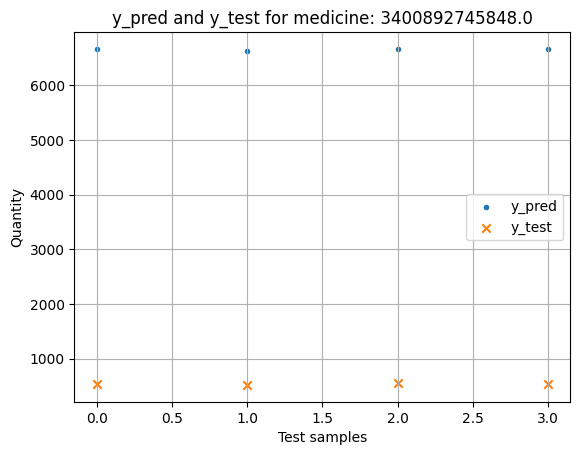



----------------------------------------------------------------------------------------------------
Medicine:3400893736135.0
Datapoints in test: 67
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}
Training Score: R^2 0.894
Test score: 
R^2 Score: -764.915
MAE: 2571.849
MAPE: 0.462
RMSE: 3182.645



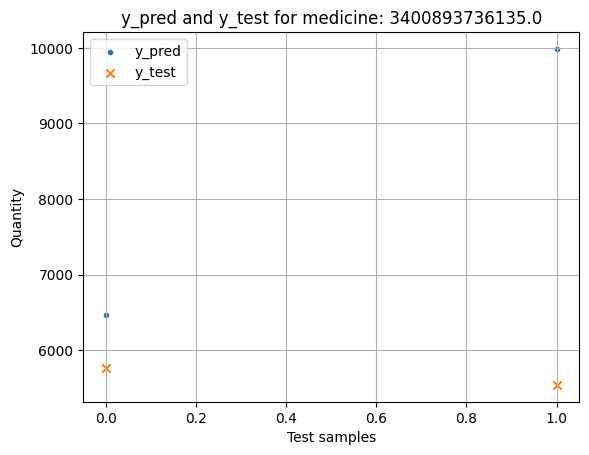



----------------------------------------------------------------------------------------------------
Medicine:3400892761527.0
Datapoints in test: 67
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}
Training Score: R^2 0.894
Test score: 
R^2 Score: -19.638
MAE: 20671.242
MAPE: 0.723
RMSE: 20863.467



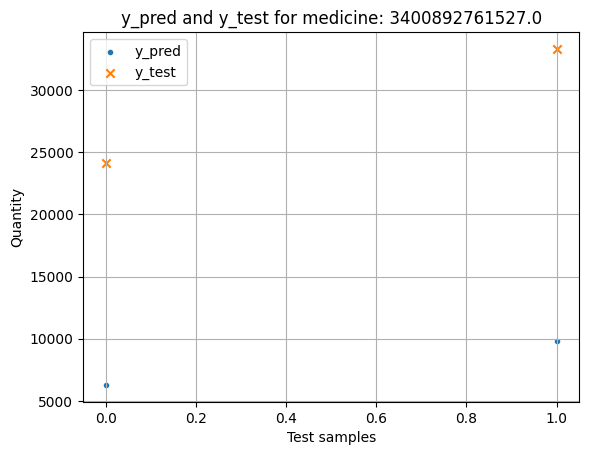



----------------------------------------------------------------------------------------------------
Medicine:3400892065366.0
Datapoints in test: 67
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}
Training Score: R^2 0.894
Test score: 
R^2 Score: -9.788
MAE: 2354.084
MAPE: 0.311
RMSE: 2873.694



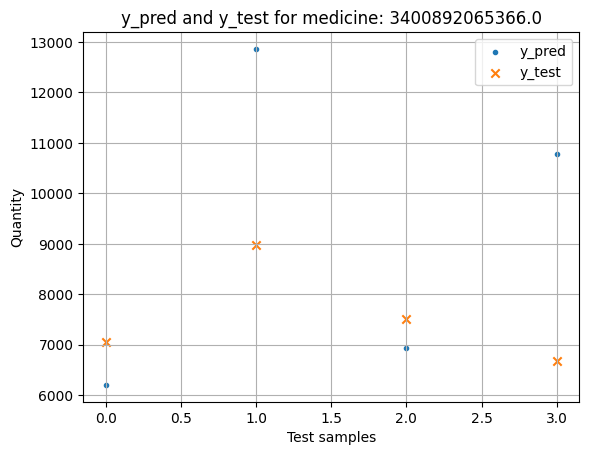



----------------------------------------------------------------------------------------------------
Medicine:3400891191226.0
Datapoints in test: 67
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}
Training Score: R^2 0.894
Test score: 
R^2 Score: -64.151
MAE: 2593.778
MAPE: 0.642
RMSE: 2663.626



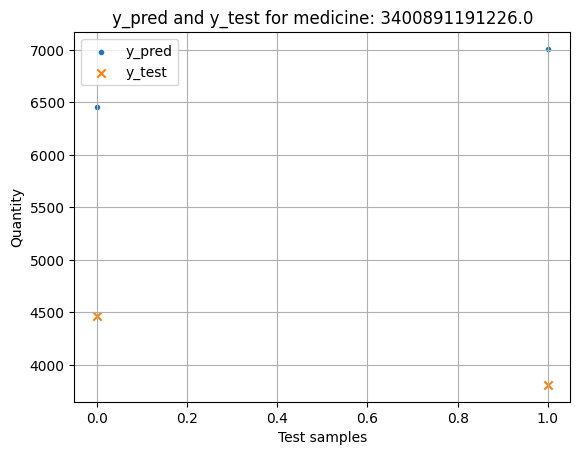



----------------------------------------------------------------------------------------------------
Medicine:3400893875490.0
Datapoints in test: 67
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}
Training Score: R^2 0.894
Test score: 
R^2 Score: -62.23
MAE: 9634.514
MAPE: 0.735
RMSE: 10765.92



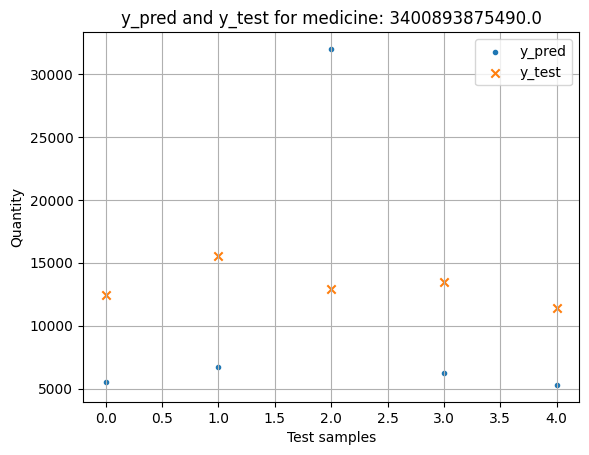



----------------------------------------------------------------------------------------------------
Medicine:3400892088310.0
Datapoints in test: 67
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}
Training Score: R^2 0.894
Test score: 
R^2 Score: -174.592
MAE: 3121.17
MAPE: 0.672
RMSE: 3996.548



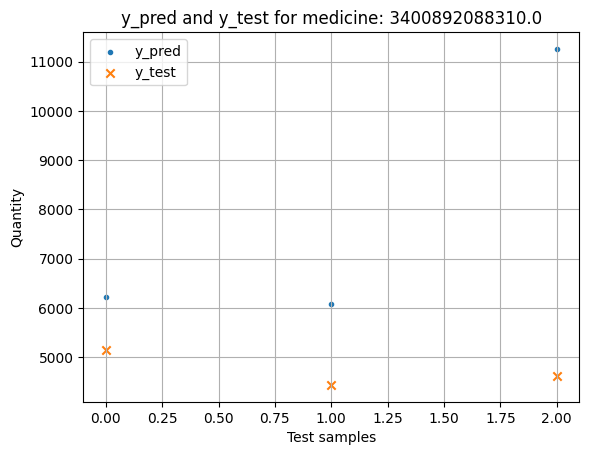



----------------------------------------------------------------------------------------------------
Medicine:3400892508566.0
Datapoints in test: 67
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}
Training Score: R^2 0.894
Test score: 
R^2 Score: -802.274
MAE: 9029.213
MAPE: 2.137
RMSE: 13407.455



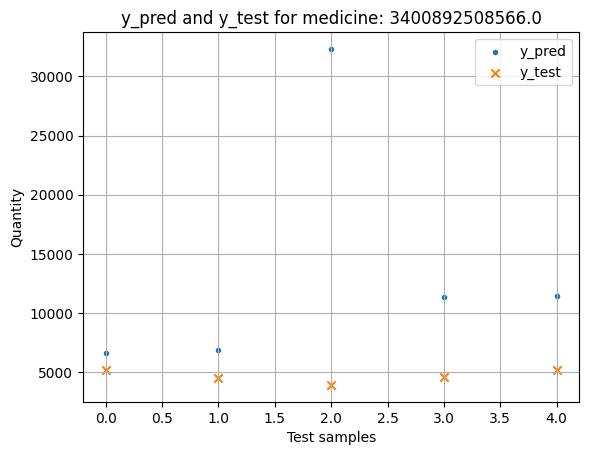



----------------------------------------------------------------------------------------------------
Medicine:3400892203645.0
Datapoints in test: 67
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}
Training Score: R^2 0.894
Test score: 
R^2 Score: -47.283
MAE: 4480.273
MAPE: 1.0
RMSE: 4814.926



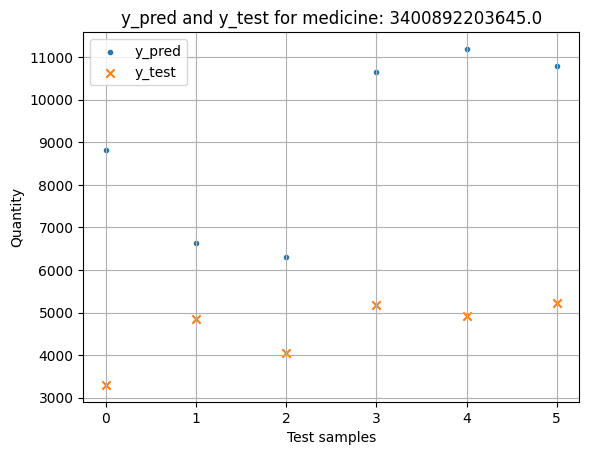



----------------------------------------------------------------------------------------------------
Medicine:3400892052120.0
Datapoints in test: 67
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}
Training Score: R^2 0.894
Test score: 
R^2 Score: -1645.833
MAE: 11679.299
MAPE: 6.585
RMSE: 15537.879



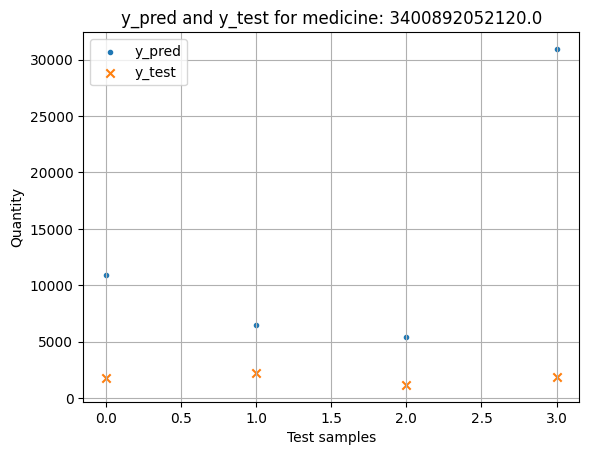



----------------------------------------------------------------------------------------------------
Medicine:3400891225037.0
Datapoints in test: 67
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}
Training Score: R^2 0.894
Test score: 
R^2 Score: -7.113
MAE: 1617.848
MAPE: 0.18
RMSE: 1623.585



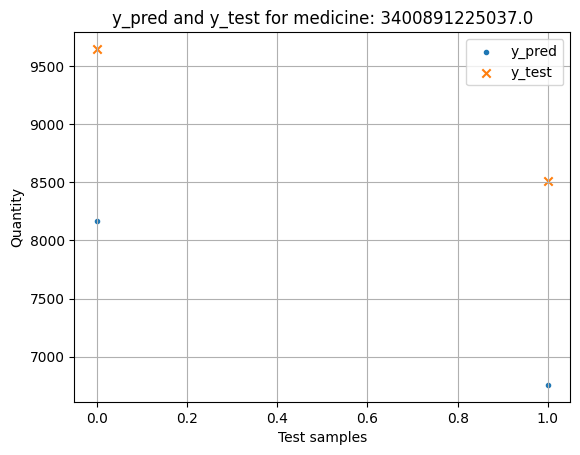



----------------------------------------------------------------------------------------------------
Medicine:3400891996128.0
Datapoints in test: 67
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}
Training Score: R^2 0.894
Test score: 
R^2 Score: -6769.564
MAE: 99541.892
MAPE: 0.919
RMSE: 99562.956



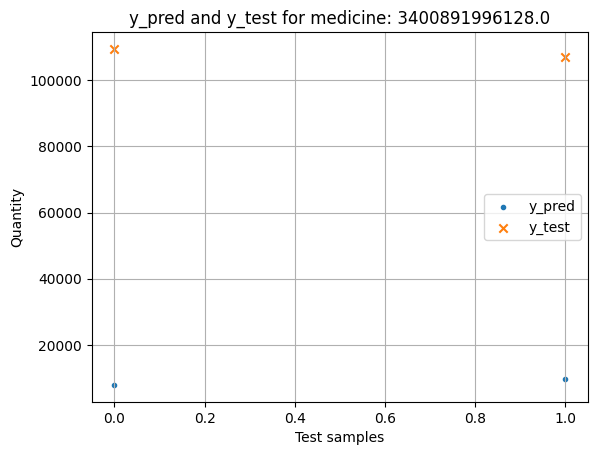



----------------------------------------------------------------------------------------------------
Medicine:3400892075761.0
Datapoints in test: 67
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}
Training Score: R^2 0.894
Test score: 
R^2 Score: -327.162
MAE: 6664.704
MAPE: 2.655
RMSE: 6981.945



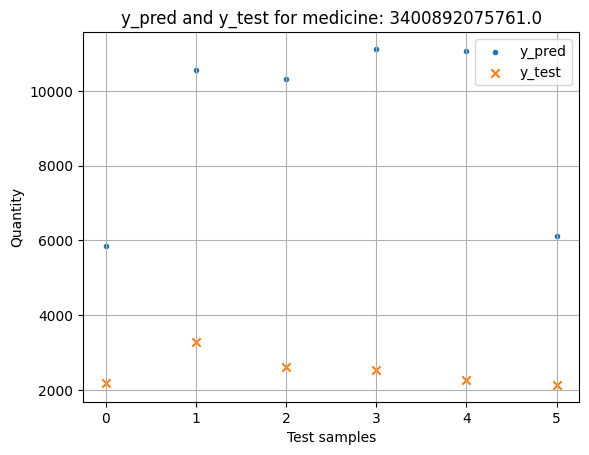



----------------------------------------------------------------------------------------------------
Medicine:3400891235203.0
Datapoints in test: 67
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}
Training Score: R^2 0.894
Test score: 
R^2 Score: nan
MAE: 1599.177
MAPE: 0.315
RMSE: 1599.177



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


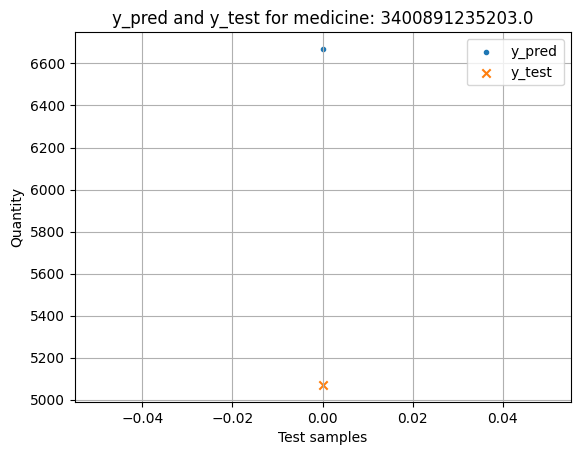



----------------------------------------------------------------------------------------------------
Medicine:3400893022634.0
Datapoints in test: 67
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}
Training Score: R^2 0.894
Test score: 
R^2 Score: -1313.798
MAE: 4576.258
MAPE: 1.303
RMSE: 4858.859



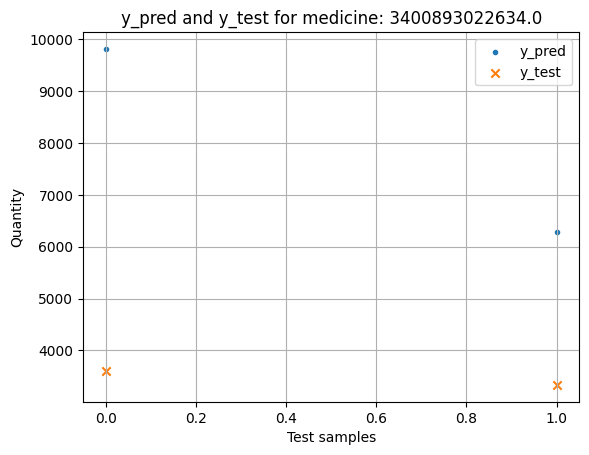



----------------------------------------------------------------------------------------------------
Medicine:3400890837149.0
Datapoints in test: 67
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}
Training Score: R^2 0.894
Test score: 
R^2 Score: nan
MAE: 3859.177
MAPE: 1.373
RMSE: 3859.177



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


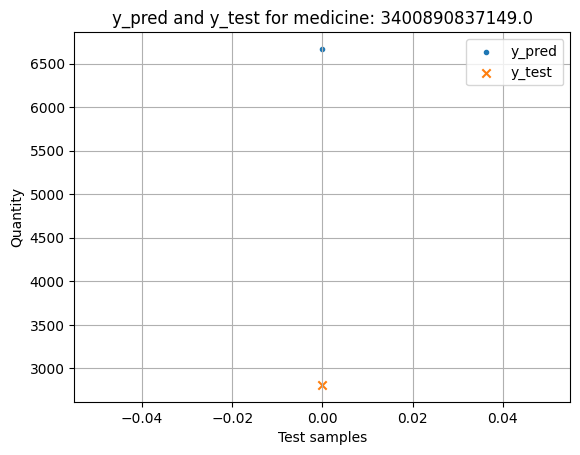



----------------------------------------------------------------------------------------------------
Cluster: 0
Size of data set: 727
Size of training set: 654
Size of test set: 73
Size of grid search: 384
Finished training

----------------------------------------------------------------------------------------------------
Medicine:3400892761527.0
Datapoints in test: 73
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 65}
Training Score: R^2 0.88
Test score: 
R^2 Score: -242.989
MAE: 22835.645
MAPE: 0.757
RMSE: 22938.611



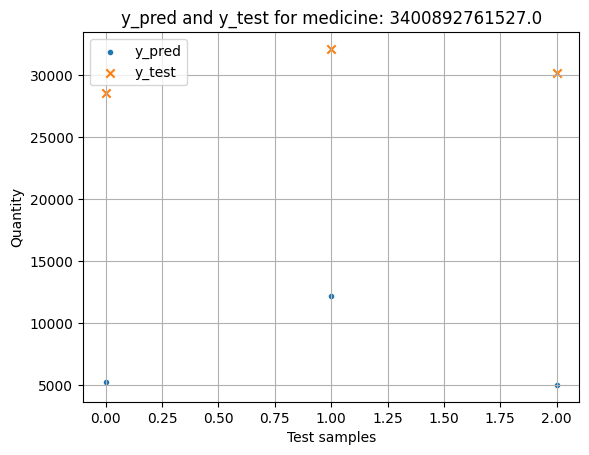



----------------------------------------------------------------------------------------------------
Medicine:3400892508566.0
Datapoints in test: 73
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 65}
Training Score: R^2 0.88
Test score: 
R^2 Score: -30.285
MAE: 2584.56
MAPE: 0.567
RMSE: 3867.338



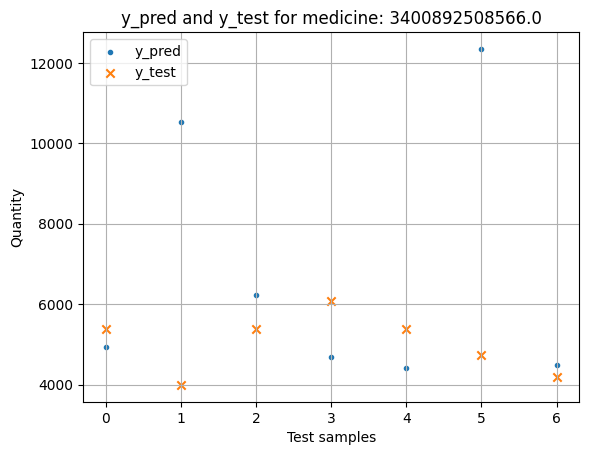



----------------------------------------------------------------------------------------------------
Medicine:3400892761695.0
Datapoints in test: 73
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 65}
Training Score: R^2 0.88
Test score: 
R^2 Score: -241.394
MAE: 20576.666
MAPE: 0.771
RMSE: 20628.924



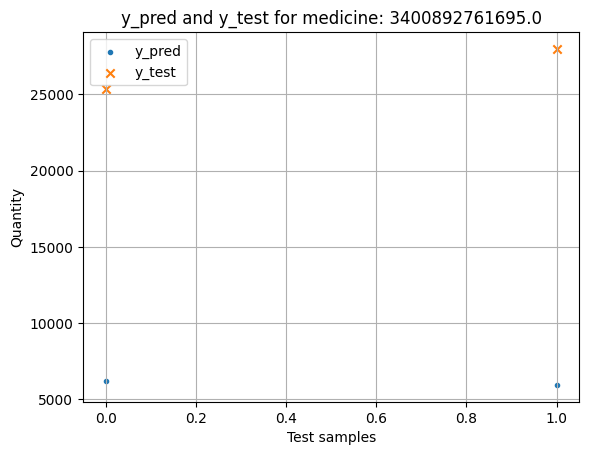



----------------------------------------------------------------------------------------------------
Medicine:3400890837149.0
Datapoints in test: 73
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 65}
Training Score: R^2 0.88
Test score: 
R^2 Score: -99.779
MAE: 4013.377
MAPE: 1.043
RMSE: 4740.169



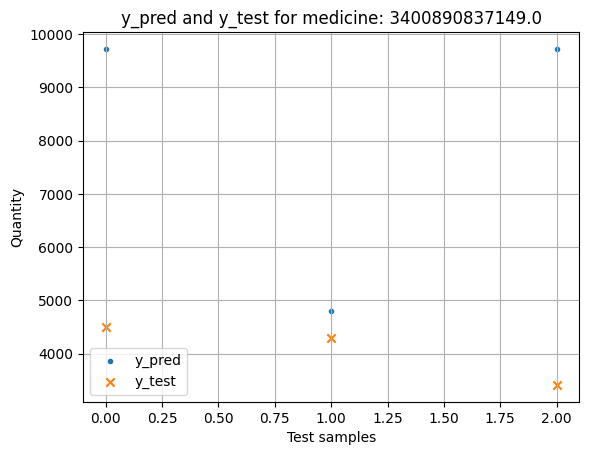



----------------------------------------------------------------------------------------------------
Medicine:3400893022634.0
Datapoints in test: 73
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 65}
Training Score: R^2 0.88
Test score: 
R^2 Score: nan
MAE: 1547.745
MAPE: 0.344
RMSE: 1547.745



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


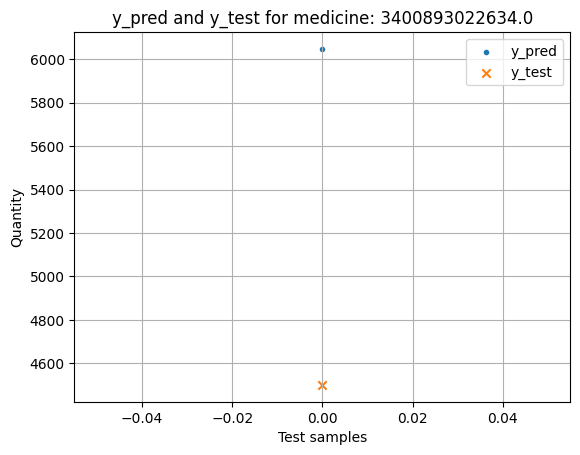



----------------------------------------------------------------------------------------------------
Medicine:3400891191226.0
Datapoints in test: 73
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 65}
Training Score: R^2 0.88
Test score: 
R^2 Score: -64.598
MAE: 2708.115
MAPE: 0.463
RMSE: 3158.684



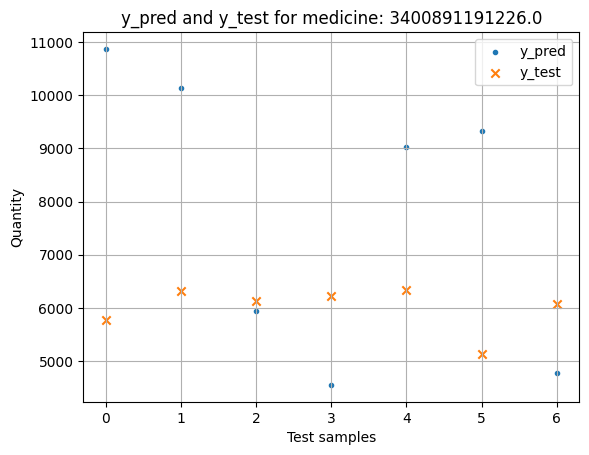



----------------------------------------------------------------------------------------------------
Medicine:3400891996128.0
Datapoints in test: 73
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 65}
Training Score: R^2 0.88
Test score: 
R^2 Score: -169.713
MAE: 96057.714
MAPE: 0.932
RMSE: 96193.648



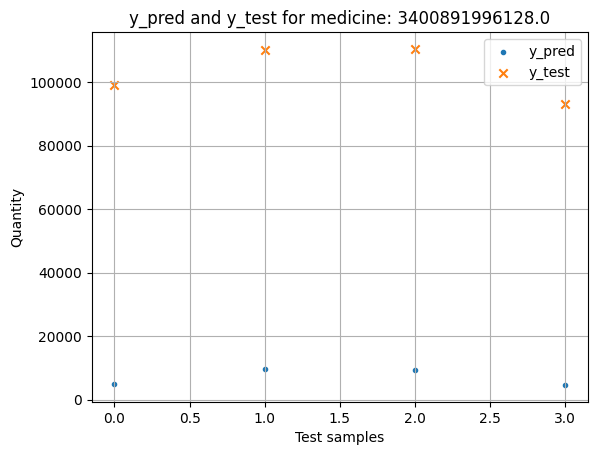



----------------------------------------------------------------------------------------------------
Medicine:3400892697789.0
Datapoints in test: 73
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 65}
Training Score: R^2 0.88
Test score: 
R^2 Score: -317.781
MAE: 5096.545
MAPE: 3.151
RMSE: 5783.355



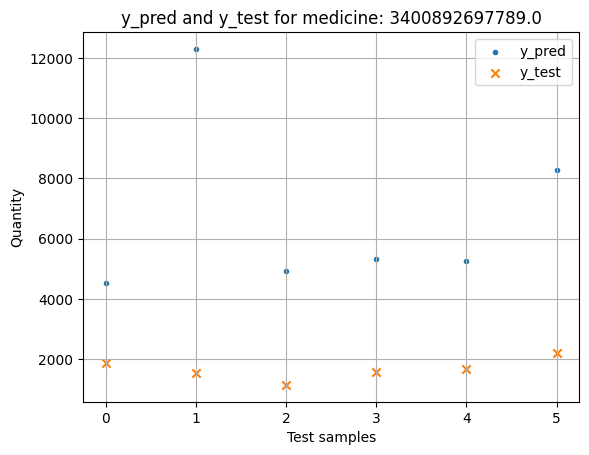



----------------------------------------------------------------------------------------------------
Medicine:3400892203645.0
Datapoints in test: 73
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 65}
Training Score: R^2 0.88
Test score: 
R^2 Score: -78.111
MAE: 2725.878
MAPE: 0.472
RMSE: 3835.499



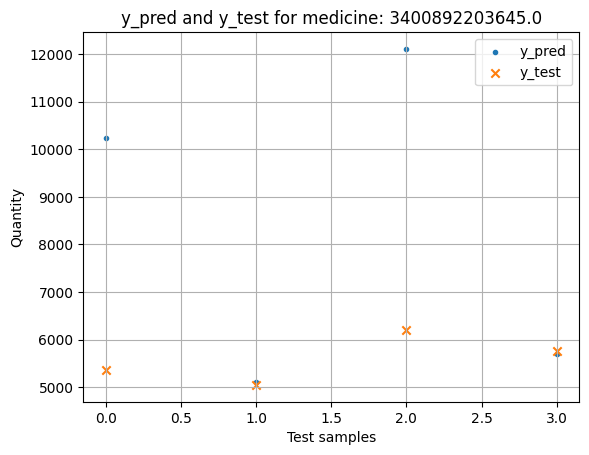



----------------------------------------------------------------------------------------------------
Medicine:3400893736135.0
Datapoints in test: 73
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 65}
Training Score: R^2 0.88
Test score: 
R^2 Score: -24.444
MAE: 1111.464
MAPE: 0.224
RMSE: 1153.22



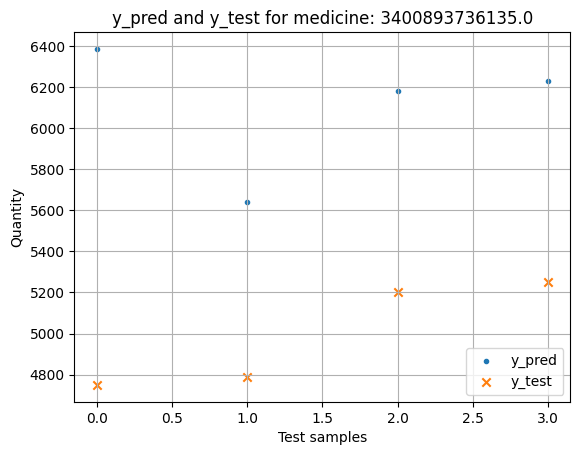



----------------------------------------------------------------------------------------------------
Medicine:3400892052120.0
Datapoints in test: 73
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 65}
Training Score: R^2 0.88
Test score: 
R^2 Score: -1243.035
MAE: 5374.659
MAPE: 3.322
RMSE: 5649.46



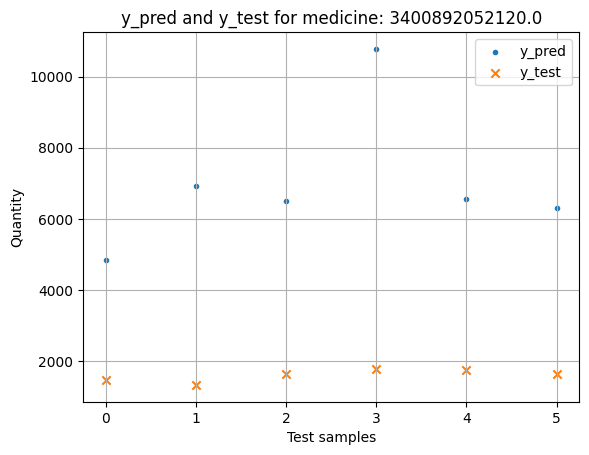



----------------------------------------------------------------------------------------------------
Medicine:3400892088310.0
Datapoints in test: 73
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 65}
Training Score: R^2 0.88
Test score: 
R^2 Score: -24.325
MAE: 3988.759
MAPE: 0.79
RMSE: 4688.483



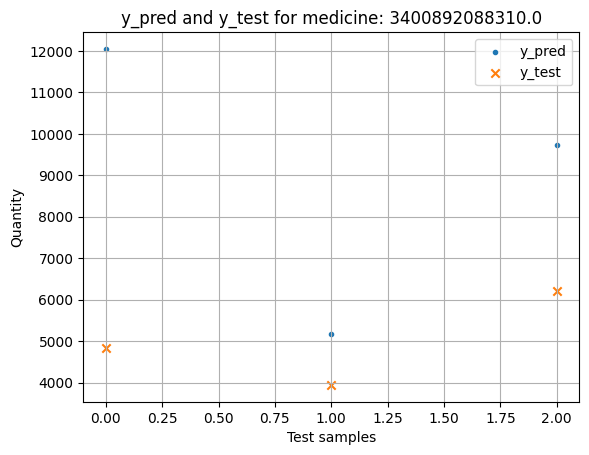



----------------------------------------------------------------------------------------------------
Medicine:3400892669236.0
Datapoints in test: 73
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 65}
Training Score: R^2 0.88
Test score: 
R^2 Score: -23.721
MAE: 2918.524
MAPE: 0.327
RMSE: 3124.409



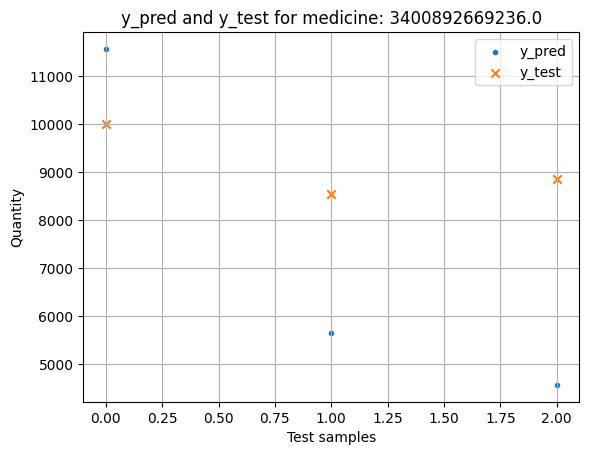



----------------------------------------------------------------------------------------------------
Medicine:3400891225037.0
Datapoints in test: 73
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 65}
Training Score: R^2 0.88
Test score: 
R^2 Score: -8.834
MAE: 3844.671
MAPE: 0.361
RMSE: 4131.407



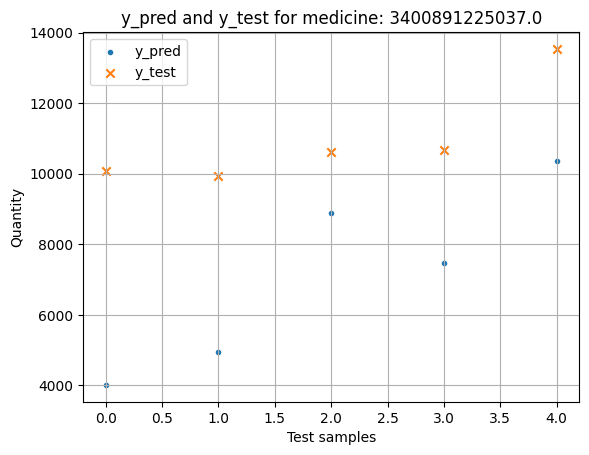



----------------------------------------------------------------------------------------------------
Medicine:3400892065366.0
Datapoints in test: 73
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 65}
Training Score: R^2 0.88
Test score: 
R^2 Score: -2617.112
MAE: 3691.616
MAPE: 0.472
RMSE: 3760.811



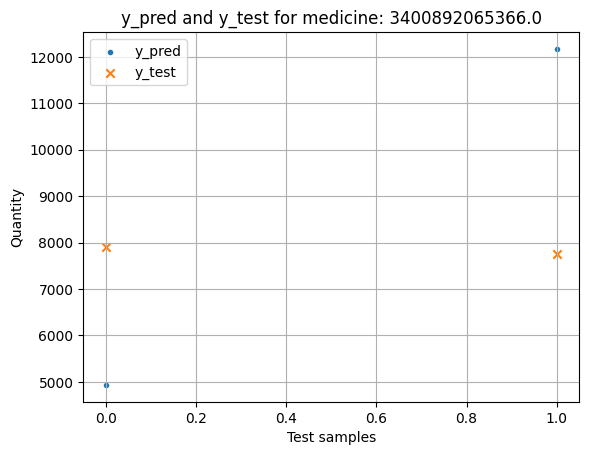



----------------------------------------------------------------------------------------------------
Medicine:3400893875490.0
Datapoints in test: 73
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 65}
Training Score: R^2 0.88
Test score: 
R^2 Score: -33.52
MAE: 5101.617
MAPE: 0.407
RMSE: 5523.969



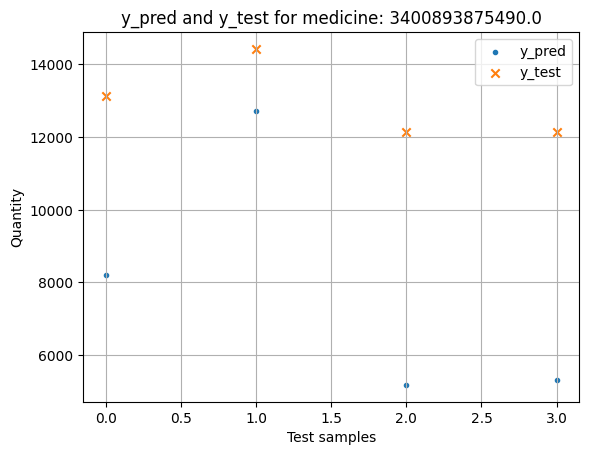



----------------------------------------------------------------------------------------------------
Medicine:3400892745848.0
Datapoints in test: 73
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 65}
Training Score: R^2 0.88
Test score: 
R^2 Score: -19017.534
MAE: 8246.966
MAPE: 19.472
RMSE: 8964.001



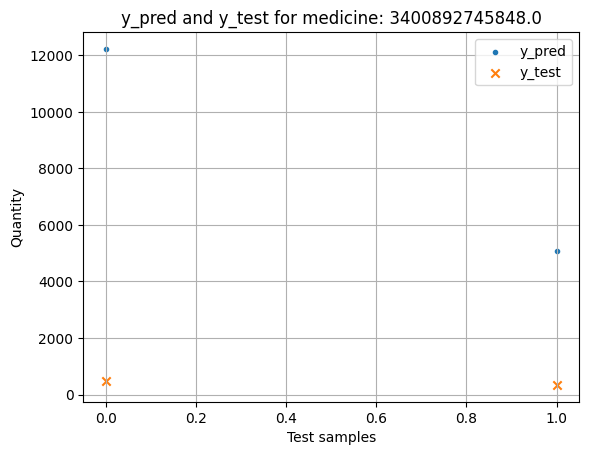



----------------------------------------------------------------------------------------------------
Medicine:3400892729589.0
Datapoints in test: 73
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 65}
Training Score: R^2 0.88
Test score: 
R^2 Score: -13.855
MAE: 2117.577
MAPE: 0.299
RMSE: 2306.731



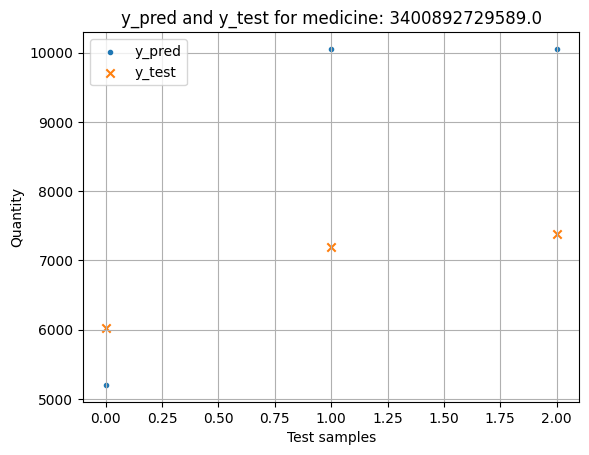



----------------------------------------------------------------------------------------------------
Medicine:3400892075761.0
Datapoints in test: 73
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 65}
Training Score: R^2 0.88
Test score: 
R^2 Score: -329.558
MAE: 5360.275
MAPE: 2.096
RMSE: 6140.551



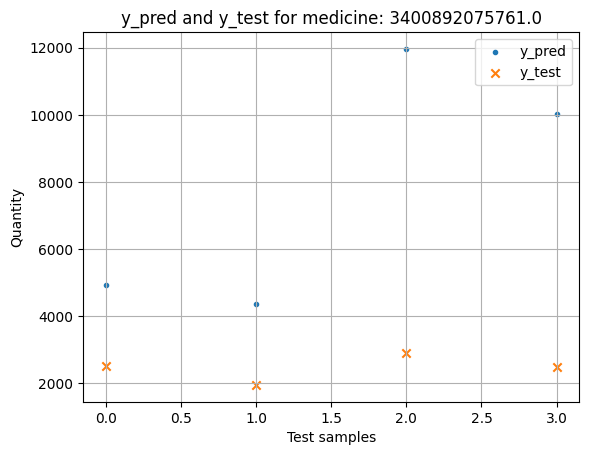

CLUSTER          HOSPI_CODE_UCD             R2          RMSE           MAE  \
0        1  CODE_UCD_3400892761695     -44.501891  15625.775540  14041.319457   
1        1  CODE_UCD_3400893826706    -245.988255  14494.672895   8318.233047   
2        1  CODE_UCD_3400892669236    -278.962619   3664.240340   3329.993888   
3        1  CODE_UCD_3400892729589            NaN    599.177264    599.177264   
4        1  CODE_UCD_3400892745848 -300220.507947   6125.984696   6125.978109   
5        1  CODE_UCD_3400893736135    -764.915389   3182.645286   2571.848945   
6        1  CODE_UCD_3400892761527     -19.638333  20863.466785  20671.242111   
7        1  CODE_UCD_3400892065366      -9.788316   2873.694236   2354.084393   
8        1  CODE_UCD_3400891191226     -64.150607   2663.625557   2593.778415   
9        1  CODE_UCD_3400893875490     -62.229634  10765.919757   9634.513883   
10       1  CODE_UCD_3400892088310    -174.592483   3996.548451   3121.169948   
11       1  CODE_UCD_3400892508566    -802.273871  13407.454642   9029.212830   
12       1  CODE_UCD_3400892203645     -47.282710   4814.926102   4480.272730   
13       1  CODE_UCD_3400892052120   -1645.832824  15537.879263  11679.298570   
14       1  CODE_UCD_3400891225037      -7.113353   1623.585021   1617.847767   
15       1  CODE_UCD_3400891996128   -6769.563610  99562.955870  99541.891603   
16       1  CODE_UCD_3400892075761    -327.162007   6981.944905   6664.704352   
17       1  CODE_UCD_3400891235203            NaN   1599.177264   1599.177264   
18       1  CODE_UCD_3400893022634   -1313.797836   4858.858913   4576.257889   
19       1  CODE_UCD_3400890837149            NaN   3859.177264   3859.177264   
20       0  CODE_UCD_3400892761527    -242.988996  22938.611382  22835.644906   
21       0  CODE_UCD_3400892508566     -30.284792   3867.337772   2584.559502   
22       0  CODE_UCD_3400892761695    -241.393746  20628.924382  20576.665957   
23       0  CODE_UCD_3400890837149     -99.778848   4740.169207   4013.377091   
24       0  CODE_UCD_3400893022634            NaN   1547.744740   1547.744740   
25       0  CODE_UCD_3400891191226     -64.597755   3158.684014   2708.114541   
26       0  CODE_UCD_3400891996128    -169.712632  96193.647819  96057.714365   
27       0  CODE_UCD_3400892697789    -317.780884   5783.355323   5096.544749   
28       0  CODE_UCD_3400892203645     -78.110949   3835.498892   2725.877506   
29       0  CODE_UCD_3400893736135     -24.443802   1153.219711   1111.463993   
30       0  CODE_UCD_3400892052120   -1243.034682   5649.460230   5374.658803   
31       0  CODE_UCD_3400892088310     -24.324796   4688.482986   3988.758958   
32       0  CODE_UCD_3400892669236     -23.721090   3124.408751   2918.524270   
33       0  CODE_UCD_3400891225037      -8.834049   4131.407225   3844.671258   
34       0  CODE_UCD_3400892065366   -2617.112045   3760.810524   3691.616139   
35       0  CODE_UCD_3400893875490     -33.520233   5523.969180   5101.616700   
36       0  CODE_UCD_3400892745848  -19017.534140   8964.000599   8246.965772   
37       0  CODE_UCD_3400892729589     -13.854858   2306.731471   2117.576574   
38       0  CODE_UCD_3400892075761    -329.558215   6140.550659   5360.274616   

         MAPE  
0    0.531660  
1    1.272911  
2    0.305190  
3    0.098711  
4   11.455432  
5    0.461725  
6    0.722557  
7    0.311377  
8    0.642265  
9    0.735074  
10   0.672099  
11   2.137045  
12   1.000287  
13   6.584733  
14   0.179829  
15   0.919374  
16   2.654728  
17   0.315420  
18   1.302577  
19   1.373373  
20   0.757301  
21   0.566653  
22   0.770987  
23   1.043182  
24   0.343943  
25   0.462883  
26   0.932261  
27   3.150829  
28   0.471554  
29   0.224236  
30   3.321631  
31   0.790202  
32   0.326614  
33   0.361344  
34   0.472162  
35   0.407038  
36  19.472334  
37   0.298528  
38   2.095564

In [66]:
df_prediction_scores_h3_clustered = pd.DataFrame(columns=['CLUSTER', 'HOSPI_CODE_UCD', 'R2', 'RMSE', 'MAE', 'MAPE'])

df_prediction_scores_h3_clustered = test_2_clustering(df_h3[features_h3], df_prediction_scores_h3_clustered, medicines)

df_prediction_scores_h3_clustered


----------------------------------------------------------------------------------------------------
Cluster: 0
Size of data set: 731
Size of training set: 657
Size of test set: 74
Size of grid search: 384
Finished training

----------------------------------------------------------------------------------------------------
Medicine:3400893826706.0
Datapoints in test: 74
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 17}
Training Score: R^2 0.276
Test score: 
R^2 Score: -52.318
MAE: 5997.157
MAPE: 0.945
RMSE: 6024.06



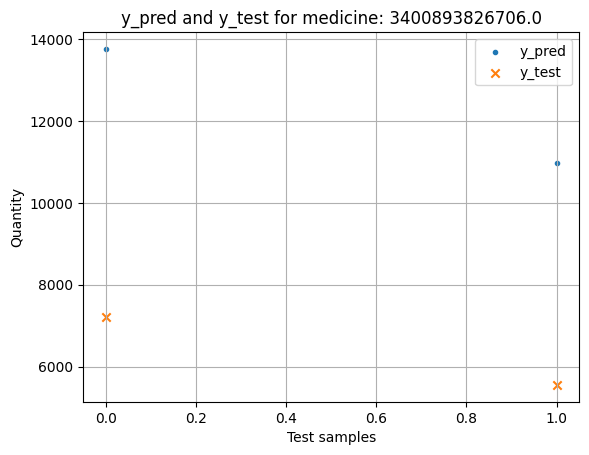



----------------------------------------------------------------------------------------------------
Medicine:3400892203645.0
Datapoints in test: 74
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 17}
Training Score: R^2 0.276
Test score: 
R^2 Score: -11.049
MAE: 2921.149
MAPE: 0.304
RMSE: 3499.477



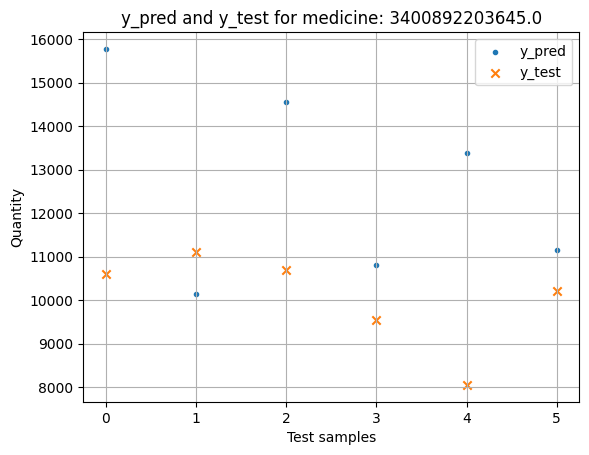



----------------------------------------------------------------------------------------------------
Medicine:3400892761695.0
Datapoints in test: 74
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 17}
Training Score: R^2 0.276
Test score: 
R^2 Score: -21.419
MAE: 3836.258
MAPE: 0.484
RMSE: 4358.973



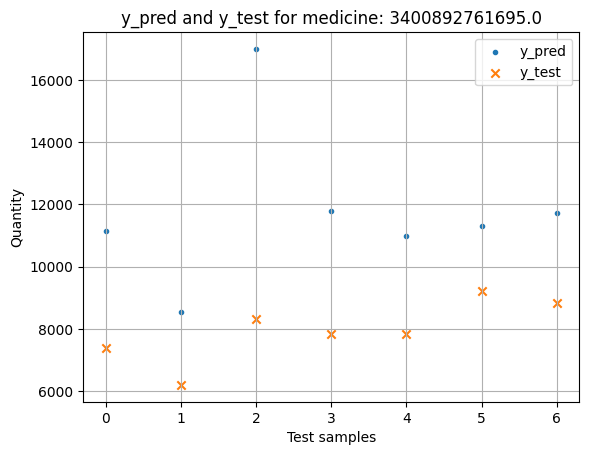



----------------------------------------------------------------------------------------------------
Medicine:3400892508566.0
Datapoints in test: 74
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 17}
Training Score: R^2 0.276
Test score: 
R^2 Score: -32.32
MAE: 5138.936
MAPE: 0.866
RMSE: 5250.054



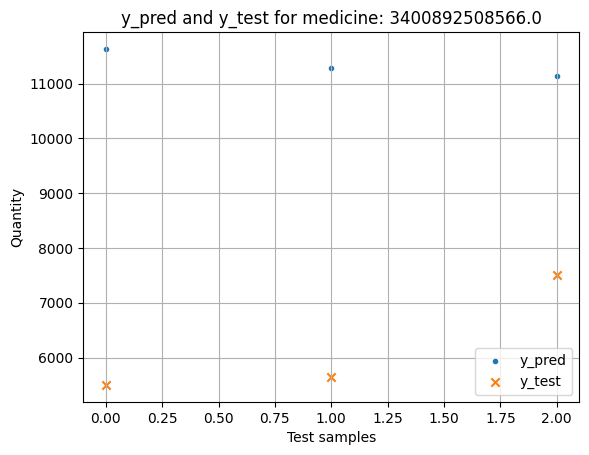



----------------------------------------------------------------------------------------------------
Medicine:3400892669236.0
Datapoints in test: 74
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 17}
Training Score: R^2 0.276
Test score: 
R^2 Score: -99.756
MAE: 6473.921
MAPE: 0.325
RMSE: 6565.2



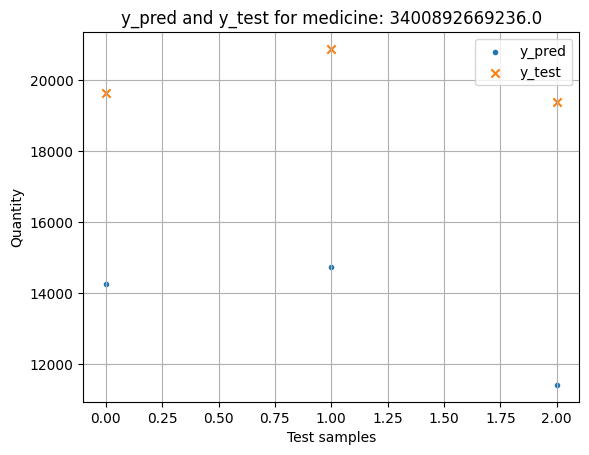



----------------------------------------------------------------------------------------------------
Medicine:3400893875490.0
Datapoints in test: 74
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 17}
Training Score: R^2 0.276
Test score: 
R^2 Score: -10.776
MAE: 6960.57
MAPE: 0.375
RMSE: 7345.936



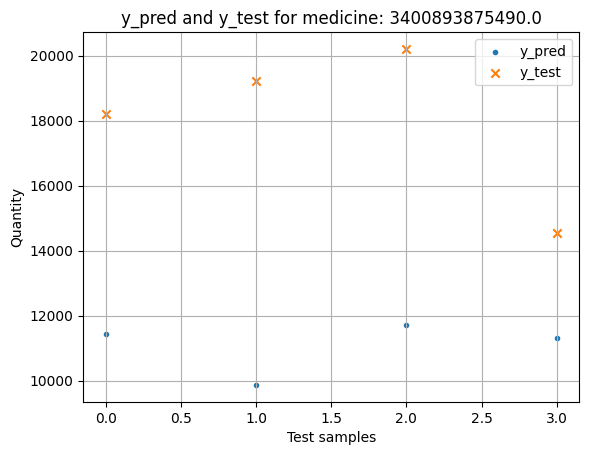



----------------------------------------------------------------------------------------------------
Medicine:3400893736135.0
Datapoints in test: 74
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 17}
Training Score: R^2 0.276
Test score: 
R^2 Score: -13.653
MAE: 3430.284
MAPE: 0.457
RMSE: 3540.809



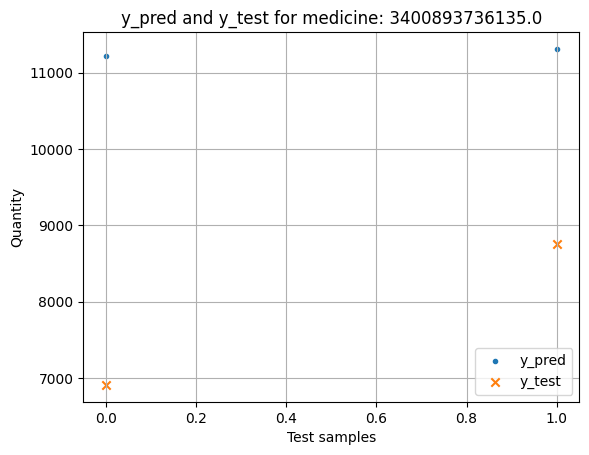



----------------------------------------------------------------------------------------------------
Medicine:3400892052120.0
Datapoints in test: 74
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 17}
Training Score: R^2 0.276
Test score: 
R^2 Score: -168.248
MAE: 2478.529
MAPE: 0.283
RMSE: 2488.868



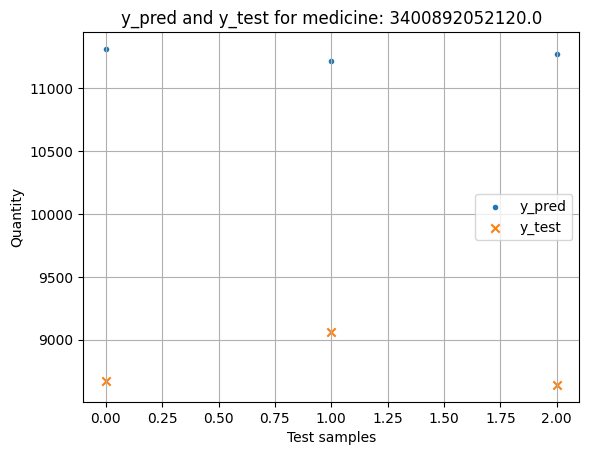



----------------------------------------------------------------------------------------------------
Medicine:3400892088310.0
Datapoints in test: 74
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 17}
Training Score: R^2 0.276
Test score: 
R^2 Score: -9.422
MAE: 4005.284
MAPE: 0.605
RMSE: 4228.991



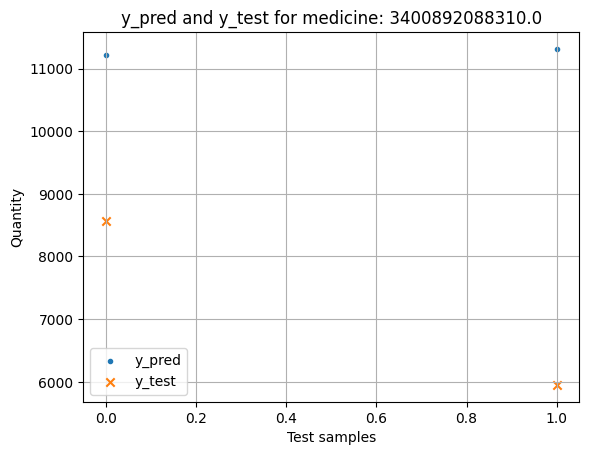



----------------------------------------------------------------------------------------------------
Medicine:3400892761527.0
Datapoints in test: 74
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 17}
Training Score: R^2 0.276
Test score: 
R^2 Score: -168.896
MAE: 6198.787
MAPE: 1.444
RMSE: 6291.303



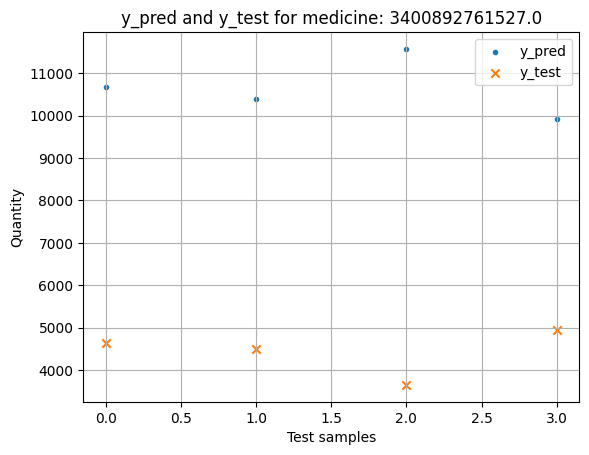



----------------------------------------------------------------------------------------------------
Medicine:3400892075761.0
Datapoints in test: 74
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 17}
Training Score: R^2 0.276
Test score: 
R^2 Score: -1.871
MAE: 2192.744
MAPE: 0.244
RMSE: 2412.647



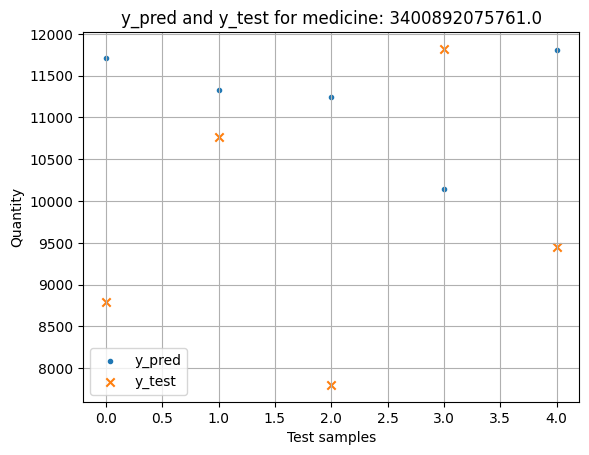



----------------------------------------------------------------------------------------------------
Medicine:3400892729589.0
Datapoints in test: 74
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 17}
Training Score: R^2 0.276
Test score: 
R^2 Score: -1.747
MAE: 4393.931
MAPE: 0.264
RMSE: 4949.475



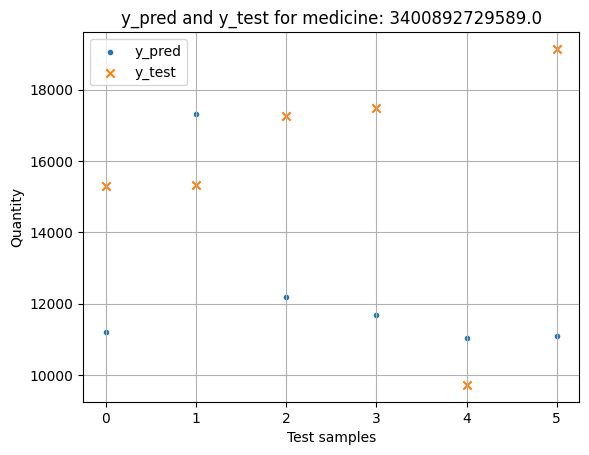



----------------------------------------------------------------------------------------------------
Medicine:3400892697789.0
Datapoints in test: 74
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 17}
Training Score: R^2 0.276
Test score: 
R^2 Score: -12.58
MAE: 2019.499
MAPE: 0.164
RMSE: 2086.43



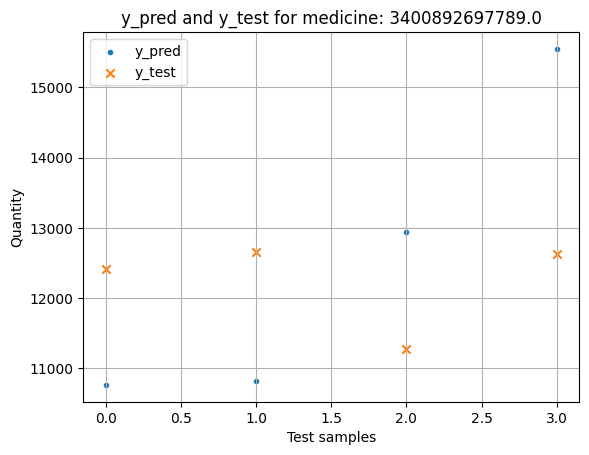



----------------------------------------------------------------------------------------------------
Medicine:3400891191226.0
Datapoints in test: 74
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 17}
Training Score: R^2 0.276
Test score: 
R^2 Score: -148.183
MAE: 2315.663
MAPE: 0.231
RMSE: 2687.094



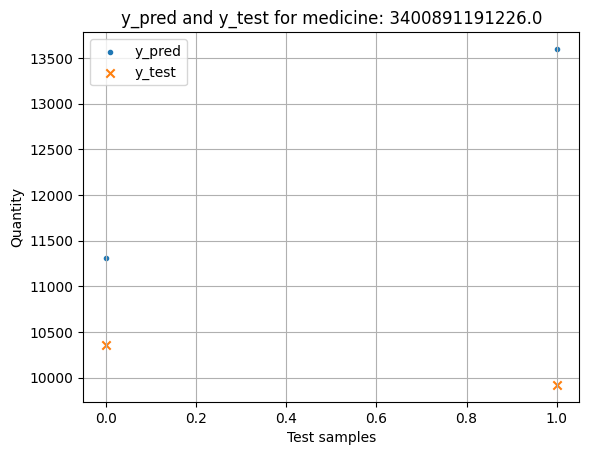



----------------------------------------------------------------------------------------------------
Medicine:3400892065366.0
Datapoints in test: 74
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 17}
Training Score: R^2 0.276
Test score: 
R^2 Score: -18.369
MAE: 6991.508
MAPE: 0.377
RMSE: 7125.447



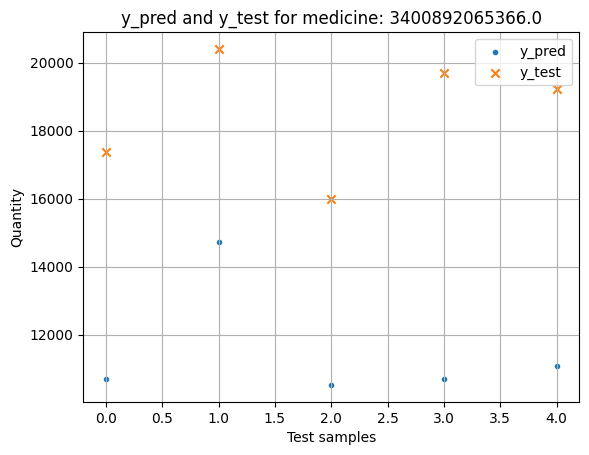



----------------------------------------------------------------------------------------------------
Medicine:3400893022634.0
Datapoints in test: 74
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 17}
Training Score: R^2 0.276
Test score: 
R^2 Score: -423.344
MAE: 9053.143
MAPE: 5.215
RMSE: 9063.829



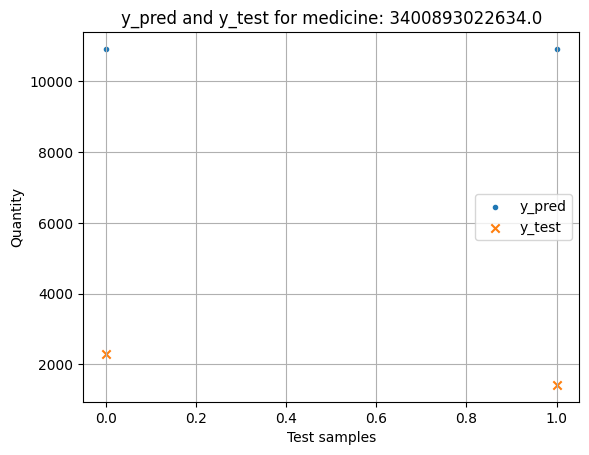



----------------------------------------------------------------------------------------------------
Medicine:3400890837149.0
Datapoints in test: 74
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 17}
Training Score: R^2 0.276
Test score: 
R^2 Score: -0.064
MAE: 2102.281
MAPE: 0.155
RMSE: 2925.644



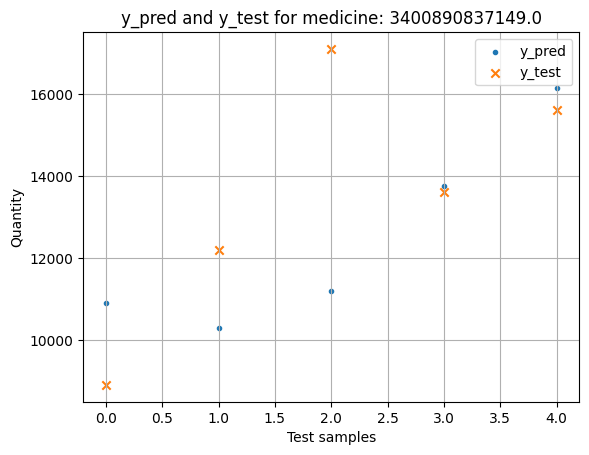



----------------------------------------------------------------------------------------------------
Medicine:3400892745848.0
Datapoints in test: 74
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 17}
Training Score: R^2 0.276
Test score: 
R^2 Score: -2.683
MAE: 2580.219
MAPE: 0.205
RMSE: 2582.272



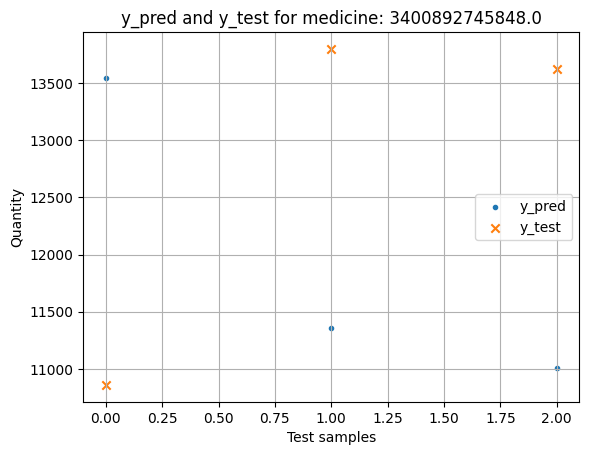



----------------------------------------------------------------------------------------------------
Medicine:3400891235203.0
Datapoints in test: 74
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 17}
Training Score: R^2 0.276
Test score: 
R^2 Score: -335.574
MAE: 5172.706
MAPE: 0.874
RMSE: 5189.021



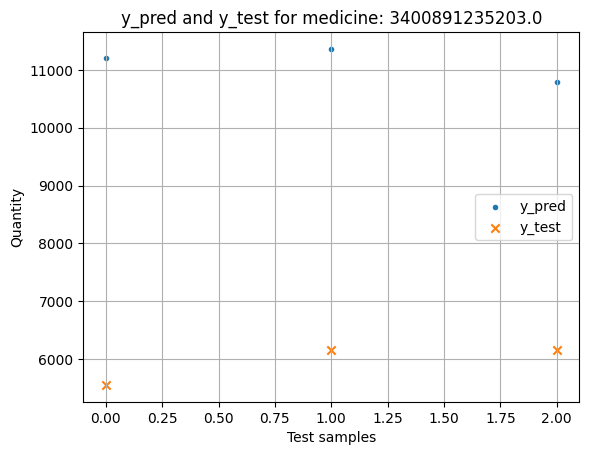



----------------------------------------------------------------------------------------------------
Medicine:3400891225037.0
Datapoints in test: 74
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 17}
Training Score: R^2 0.276
Test score: 
R^2 Score: -92.499
MAE: 10696.279
MAPE: 0.47
RMSE: 10904.783



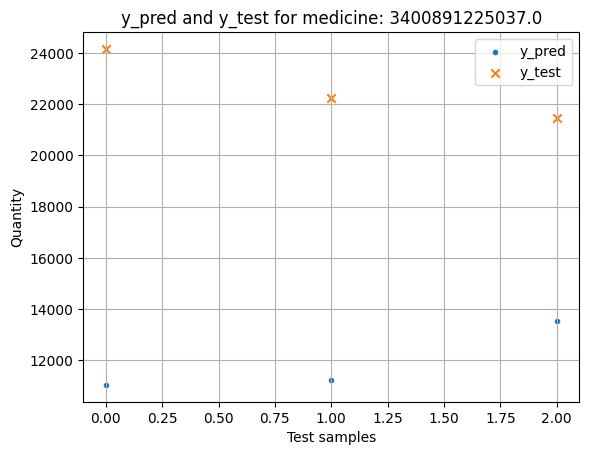



----------------------------------------------------------------------------------------------------
Cluster: 1
Size of data set: 39
Size of training set: 35
Size of test set: 4
Size of grid search: 12
Finished training

----------------------------------------------------------------------------------------------------
Medicine:3400891996128.0
Datapoints in test: 4
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 2}
Training Score: R^2 -0.711
Test score: 
R^2 Score: -0.205
MAE: 13053.125
MAPE: 0.066
RMSE: 14311.287



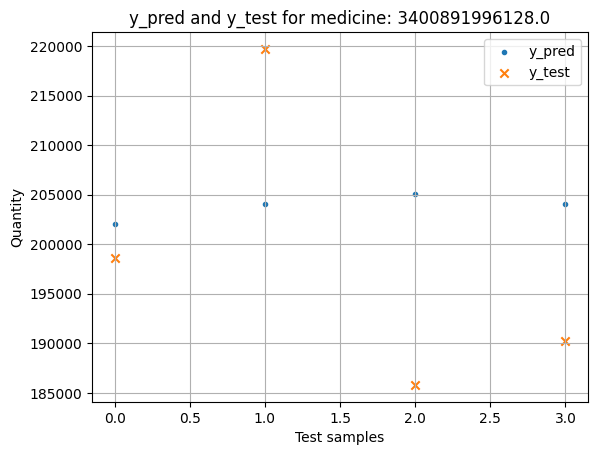

CLUSTER          HOSPI_CODE_UCD          R2          RMSE           MAE  \
0        0  CODE_UCD_3400893826706  -52.317618   6024.060428   5997.157367   
1        0  CODE_UCD_3400892203645  -11.048871   3499.476838   2921.149419   
2        0  CODE_UCD_3400892761695  -21.419481   4358.973160   3836.257759   
3        0  CODE_UCD_3400892508566  -32.320021   5250.053530   5138.936352   
4        0  CODE_UCD_3400892669236  -99.756106   6565.199938   6473.921486   
5        0  CODE_UCD_3400893875490  -10.775532   7345.935857   6960.570301   
6        0  CODE_UCD_3400893736135  -13.652833   3540.809273   3430.283866   
7        0  CODE_UCD_3400892052120 -168.247710   2488.868456   2478.528843   
8        0  CODE_UCD_3400892088310   -9.421519   4228.991357   4005.283866   
9        0  CODE_UCD_3400892761527 -168.896157   6291.303159   6198.787102   
10       0  CODE_UCD_3400892075761   -1.871236   2412.647380   2192.744162   
11       0  CODE_UCD_3400892729589   -1.747497   4949.474522   4393.930780   
12       0  CODE_UCD_3400892697789  -12.579589   2086.430398   2019.498948   
13       0  CODE_UCD_3400891191226 -148.183360   2687.094090   2315.662961   
14       0  CODE_UCD_3400892065366  -18.368981   7125.446552   6991.508298   
15       0  CODE_UCD_3400893022634 -423.343982   9063.828928   9053.142815   
16       0  CODE_UCD_3400890837149   -0.063860   2925.644249   2102.280657   
17       0  CODE_UCD_3400892745848   -2.683234   2582.271659   2580.219144   
18       0  CODE_UCD_3400891235203 -335.574231   5189.020957   5172.706303   
19       0  CODE_UCD_3400891225037  -92.499141  10904.782702  10696.278895   
20       1  CODE_UCD_3400891996128   -0.205478  14311.286794  13053.125000   

        MAPE  
0   0.945013  
1   0.303669  
2   0.484239  
3   0.866347  
4   0.325456  
5   0.375099  
6   0.457417  
7   0.282654  
8   0.605127  
9   1.444153  
10  0.243555  
11  0.263644  
12  0.164295  
13  0.231395  
14  0.377025  
15  5.215078  
16  0.154620  
17  0.205372  
18  0.874221  
19  0.469540  
20  0.066275

In [67]:
df_prediction_scores_h4_clustered = pd.DataFrame(columns=['CLUSTER', 'HOSPI_CODE_UCD', 'R2', 'RMSE', 'MAE', 'MAPE'])

df_prediction_scores_h4_clustered = test_2_clustering(df_h4[features_h4], df_prediction_scores_h4_clustered, medicines)

df_prediction_scores_h4_clustered